In [1]:
import pandas as pd

# Load the SNLI test data (including true labels)
snli_test_path = "/kaggle/input/stanford-natural-language-inference-corpus/snli_1.0_test.csv"
snli_test_df = pd.read_csv(snli_test_path)

# Define file paths for SNLI prediction files
snli_predictions_paths = {
    "deberta": "/kaggle/input/deberta-nli/deberta_snli_predictions.csv",
    "roberta": "/kaggle/input/roberta/roberta_snli_predictions.csv",
    "albert": "/kaggle/input/albert/albert_snli_predictions.csv",
}

# Specify where you want to save the combined predictions CSV file
output_csv_path_snli = "/kaggle/working/combined_snli_df"

# Define the column names, placing True_Label at the end
columns = [
    'Deberta_Entailment', 'Deberta_Neutral', 'Deberta_Contradiction',
    'Roberta_Entailment', 'Roberta_Neutral', 'Roberta_Contradiction',
    'Albert_Entailment', 'Albert_Neutral', 'Albert_Contradiction',
    'True_Label'  # Ensuring True_Label is the last column
]

# Initialize the DataFrame with specified columns
combined_snli_df = pd.DataFrame(columns=columns)

label_mapping = {'entailment': 0, 'neutral': 1, 'contradiction': 2}

# Load and merge the predictions
for model, path in snli_predictions_paths.items():
    predictions_df = pd.read_csv(path)
    for label in ['Entailment', 'Neutral', 'Contradiction']:
        combined_snli_df[f"{model.capitalize()}_{label}"] = predictions_df[label]

# Assign the true labels to the True_Label column, now positioned at the end
combined_snli_df['True_Label'] = snli_test_df['gold_label'].map(label_mapping)

# Convert True_Label to integer type
combined_snli_df['True_Label'] = combined_snli_df['True_Label'].astype('Int64')

# Save the combined DataFrame to CSV
combined_snli_df.to_csv(output_csv_path_snli, index=False)

print(f"Combined SNLI predictions with true labels saved to {output_csv_path_snli}")


Combined SNLI predictions with true labels saved to /kaggle/working/combined_snli_df


In [2]:
combined_snli_df.head()

Deberta_Entailment  Deberta_Neutral  Deberta_Contradiction  \
0            0.034767         0.962592               0.002641   
1            0.001921         0.319032               0.679047   
2            0.998783         0.000764               0.000453   
3            0.001001         0.997708               0.001291   
4            0.001080         0.301363               0.697557   

   Roberta_Entailment  Roberta_Neutral  Roberta_Contradiction  \
0            0.012451         0.927093               0.060457   
1            0.752766         0.242251               0.004983   
2            0.000254         0.004494               0.995253   
3            0.005844         0.990736               0.003419   
4            0.278348         0.718575               0.003076   

   Albert_Entailment  Albert_Neutral  Albert_Contradiction  True_Label  
0           0.008653        0.947434              0.043913           1  
1           0.740332        0.256434              0.003235           0  
2           0.004677        0.060481              0.934843           2  
3           0.034056        0.956687              0.009257           1  
4           0.498761        0.499270              0.001969           0

In [3]:
# Load the ANLI Round 1 test data (including true labels)
mnli_matched_test_path = "/kaggle/input/nli-dataset-for-sentence-understanding/mnli_validation_matched.csv"
mnli_matched_test_df = pd.read_csv(mnli_matched_test_path)

# Define file paths for ANLI Round 1 prediction files
mnli_matched_predictions_paths = {
    "deberta": "/kaggle/input/validation/deberta_mnli_matched_val_predictions.csv",
    "roberta": "/kaggle/input/validation/roberta_mnli_matched_val_predictions.csv",
    "albert": "/kaggle/input/validation/albert_mnli_matched_val_predictions.csv",
}

# Specify where you want to save the combined predictions CSV file
output_csv_path_mnli_matched = "/kaggle/working/combined_mnli_matched_df"

# Define the column names, placing True_Label at the end
columns = [
    'Deberta_Entailment', 'Deberta_Neutral', 'Deberta_Contradiction',
    'Roberta_Entailment', 'Roberta_Neutral', 'Roberta_Contradiction',
    'Albert_Entailment', 'Albert_Neutral', 'Albert_Contradiction',
    'True_Label'  # Ensuring True_Label is the last column
]

# Initialize the DataFrame with specified columns
combined_mnli_matched_df = pd.DataFrame(columns=columns)

# Load and merge the predictions
for model, path in mnli_matched_predictions_paths.items():
    predictions_df = pd.read_csv(path)
    for label in ['Entailment', 'Neutral', 'Contradiction']:
        combined_mnli_matched_df[f"{model.capitalize()}_{label}"] = predictions_df[label]

# Assign the true labels to the True_Label column, now positioned at the end
combined_mnli_matched_df['True_Label'] = mnli_matched_test_df['label']

# Save the combined DataFrame to CSV
combined_mnli_matched_df.to_csv(output_csv_path_mnli_matched, index=False)

print(f"Combined MNLI-matched predictions with true labels saved to {output_csv_path_mnli_matched}")


Combined MNLI-matched predictions with true labels saved to /kaggle/working/combined_mnli_matched_df


In [4]:
combined_mnli_matched_df.head()

Deberta_Entailment  Deberta_Neutral  Deberta_Contradiction  \
0            0.005164         0.993364               0.001472   
1            0.999153         0.000526               0.000321   
2            0.000989         0.044792               0.954219   
3            0.994965         0.004808               0.000228   
4            0.999657         0.000220               0.000123   

   Roberta_Entailment  Roberta_Neutral  Roberta_Contradiction  \
0            0.017844         0.950246               0.031909   
1            0.001413         0.002030               0.996557   
2            0.954781         0.042249               0.002970   
3            0.000343         0.003511               0.996146   
4            0.000079         0.000496               0.999425   

   Albert_Entailment  Albert_Neutral  Albert_Contradiction  True_Label  
0           0.010844        0.983012              0.006144           1  
1           0.005388        0.007536              0.987076           2  
2           0.853862        0.143483              0.002655           0  
3           0.004128        0.070757              0.925115           2  
4           0.003864        0.029262              0.966875           2

In [5]:
# Load the ANLI Round 1 test data (including true labels)
mnli_mismatched_test_path = "/kaggle/input/nli-dataset-for-sentence-understanding/mnli_validation_mismatched.csv"
mnli_mismatched_test_df = pd.read_csv(mnli_mismatched_test_path)

# Define file paths for ANLI Round 1 prediction files
mnli_mismatched_predictions_paths = {
    "deberta": "/kaggle/input/validation/deberta_mnli_mismatched_val_predictions.csv",
    "roberta": "/kaggle/input/validation/roberta_mnli_mismatched_val_predictions.csv",
    "albert": "/kaggle/input/validation/albert_mnli_mismatched_val_predictions.csv",
}

# Specify where you want to save the combined predictions CSV file
output_csv_path_mnli_mismatched = "/kaggle/working/combined_mnli_mismatched_df"

# Define the column names, placing True_Label at the end
columns = [
    'Deberta_Entailment', 'Deberta_Neutral', 'Deberta_Contradiction',
    'Roberta_Entailment', 'Roberta_Neutral', 'Roberta_Contradiction',
    'Albert_Entailment', 'Albert_Neutral', 'Albert_Contradiction',
    'True_Label'  # Ensuring True_Label is the last column
]

# Initialize the DataFrame with specified columns
combined_mnli_mismatched_df = pd.DataFrame(columns=columns)

# Load and merge the predictions
for model, path in mnli_mismatched_predictions_paths.items():
    predictions_df = pd.read_csv(path)
    for label in ['Entailment', 'Neutral', 'Contradiction']:
        combined_mnli_mismatched_df[f"{model.capitalize()}_{label}"] = predictions_df[label]

# Assign the true labels to the True_Label column, now positioned at the end
combined_mnli_mismatched_df['True_Label'] = mnli_mismatched_test_df['label']

# Save the combined DataFrame to CSV
combined_mnli_mismatched_df.to_csv(output_csv_path_mnli_mismatched, index=False)

print(f"Combined MNLI-mismatched predictions with true labels saved to {output_csv_path_mnli_mismatched}")


Combined MNLI-mismatched predictions with true labels saved to /kaggle/working/combined_mnli_mismatched_df


In [6]:
combined_mnli_mismatched_df.head()

Deberta_Entailment  Deberta_Neutral  Deberta_Contradiction  \
0            0.999667         0.000160               0.000173   
1            0.998119         0.000962               0.000919   
2            0.000552         0.004809               0.994639   
3            0.827653         0.171961               0.000386   
4            0.000292         0.002875               0.996833   

   Roberta_Entailment  Roberta_Neutral  Roberta_Contradiction  \
0            0.000068         0.000402               0.999529   
1            0.000183         0.001511               0.998306   
2            0.986062         0.012020               0.001918   
3            0.000478         0.270953               0.728569   
4            0.975167         0.021904               0.002929   

   Albert_Entailment  Albert_Neutral  Albert_Contradiction  True_Label  
0           0.000894        0.003787              0.995318           2  
1           0.006421        0.010224              0.983355           2  
2           0.975041        0.023354              0.001605           0  
3           0.001722        0.796122              0.202156           2  
4           0.965952        0.032748              0.001300           0

In [7]:
# Load the ANLI Round 1 test data (including true labels)
anli_r1_test_path = "/kaggle/input/anli-a-large-scale-nli-benchmark-dataset/test_r1.csv"
anli_r1_test_df = pd.read_csv(anli_r1_test_path)

# Define file paths for ANLI Round 1 prediction files
anli_r1_predictions_paths = {
    "deberta": "/kaggle/input/deberta-nli/deberta_anli_r1_predictions.csv",
    "roberta": "/kaggle/input/roberta/roberta_anli_r1_predictions.csv",
    "albert": "/kaggle/input/albert/albert_anli_r1_predictions.csv",
}

# Specify where you want to save the combined predictions CSV file
output_csv_path_anli_r1 = "/kaggle/working/combined_anli_r1_df"

# Define the column names, placing True_Label at the end
columns = [
    'Deberta_Entailment', 'Deberta_Neutral', 'Deberta_Contradiction',
    'Roberta_Entailment', 'Roberta_Neutral', 'Roberta_Contradiction',
    'Albert_Entailment', 'Albert_Neutral', 'Albert_Contradiction',
    'True_Label'  # Ensuring True_Label is the last column
]

# Initialize the DataFrame with specified columns
combined_anli_r1_df = pd.DataFrame(columns=columns)

# Load and merge the predictions
for model, path in anli_r1_predictions_paths.items():
    predictions_df = pd.read_csv(path)
    for label in ['Entailment', 'Neutral', 'Contradiction']:
        combined_anli_r1_df[f"{model.capitalize()}_{label}"] = predictions_df[label]

# Assign the true labels to the True_Label column, now positioned at the end
combined_anli_r1_df['True_Label'] = anli_r1_test_df['label']

# Save the combined DataFrame to CSV
combined_anli_r1_df.to_csv(output_csv_path_anli_r1, index=False)

print(f"Combined ANLI Round 1 predictions with true labels saved to {output_csv_path_anli_r1}")


Combined ANLI Round 1 predictions with true labels saved to /kaggle/working/combined_anli_r1_df


In [8]:
combined_anli_r1_df.head()

Deberta_Entailment  Deberta_Neutral  Deberta_Contradiction  \
0            0.015388         0.976305               0.008307   
1            0.224603         0.501549               0.273848   
2            0.006642         0.976690               0.016669   
3            0.966494         0.032235               0.001272   
4            0.880736         0.028293               0.090971   

   Roberta_Entailment  Roberta_Neutral  Roberta_Contradiction  \
0            0.996714         0.000376               0.002910   
1            0.875720         0.000724               0.123556   
2            0.999484         0.000330               0.000186   
3            0.000686         0.998181               0.001133   
4            0.000378         0.000197               0.999425   

   Albert_Entailment  Albert_Neutral  Albert_Contradiction  True_Label  
0           0.322974        0.667628              0.009398           0  
1           0.998526        0.000604              0.000869           0  
2           0.783352        0.212241              0.004407           0  
3           0.002134        0.989523              0.008343           1  
4           0.023283        0.013253              0.963464           2

In [9]:
# Load the ANLI Round 2 test data (including true labels)
anli_r2_test_path = "/kaggle/input/anli-a-large-scale-nli-benchmark-dataset/test_r2.csv"
anli_r2_test_df = pd.read_csv(anli_r2_test_path)

# Define file paths for ANLI Round 2 prediction files
anli_r2_predictions_paths = {
    "deberta": "/kaggle/input/deberta-nli/deberta_anli_r2_predictions.csv",
    "roberta": "/kaggle/input/roberta/roberta_anli_r2_predictions.csv",
    "albert": "/kaggle/input/albert/albert_anli_r2_predictions.csv",
}

# Specify where you want to save the combined predictions CSV file
output_csv_path_anli_r2 = "/kaggle/working/combined_anli_r2_df"

# Define the column names, placing True_Label at the end
columns = [
    'Deberta_Entailment', 'Deberta_Neutral', 'Deberta_Contradiction',
    'Roberta_Entailment', 'Roberta_Neutral', 'Roberta_Contradiction',
    'Albert_Entailment', 'Albert_Neutral', 'Albert_Contradiction',
    'True_Label'  # Ensuring True_Label is the last column
]

# Initialize the DataFrame with specified columns
combined_anli_r2_df = pd.DataFrame(columns=columns)

# Load and merge the predictions
for model, path in anli_r2_predictions_paths.items():
    predictions_df = pd.read_csv(path)
    for label in ['Entailment', 'Neutral', 'Contradiction']:
        combined_anli_r2_df[f"{model.capitalize()}_{label}"] = predictions_df[label]

# Assign the true labels to the True_Label column, now positioned at the end
combined_anli_r2_df['True_Label'] = anli_r2_test_df['label']

# Save the combined DataFrame to CSV
combined_anli_r2_df.to_csv(output_csv_path_anli_r2, index=False)

print(f"Combined ANLI Round 2 predictions with true labels saved to {output_csv_path_anli_r2}")


Combined ANLI Round 2 predictions with true labels saved to /kaggle/working/combined_anli_r2_df


In [10]:
combined_anli_r2_df.head()

Deberta_Entailment  Deberta_Neutral  Deberta_Contradiction  \
0            0.001309         0.029617               0.969075   
1            0.724144         0.273676               0.002180   
2            0.071604         0.917894               0.010503   
3            0.066162         0.929179               0.004659   
4            0.906199         0.089873               0.003928   

   Roberta_Entailment  Roberta_Neutral  Roberta_Contradiction  \
0            0.999506         0.000264               0.000230   
1            0.026951         0.054230               0.918819   
2            0.001282         0.998108               0.000610   
3            0.007091         0.992694               0.000215   
4            0.006259         0.989432               0.004309   

   Albert_Entailment  Albert_Neutral  Albert_Contradiction  True_Label  
0           0.863365        0.133388              0.003246           0  
1           0.072900        0.904344              0.022756           1  
2           0.027402        0.972218              0.000380           0  
3           0.632171        0.365194              0.002635           1  
4           0.064109        0.234642              0.701249           2

In [11]:
# Load the ANLI Round 3 test data (including true labels)
anli_r3_test_path = "/kaggle/input/anli-a-large-scale-nli-benchmark-dataset/test_r3.csv"
anli_r3_test_df = pd.read_csv(anli_r3_test_path)

# Define file paths for ANLI Round 2 prediction files
anli_r3_predictions_paths = {
    "deberta": "/kaggle/input/deberta-nli/deberta_anli_r3_predictions.csv",
    "roberta": "/kaggle/input/roberta/roberta_anli_r3_predictions.csv",
    "albert": "/kaggle/input/albert/albert_anli_r3_predictions.csv",
}

# Specify where you want to save the combined predictions CSV file
output_csv_path_anli_r3 = "/kaggle/working/combined_anli_r3_df"

# Define the column names, placing True_Label at the end
columns = [
    'Deberta_Entailment', 'Deberta_Neutral', 'Deberta_Contradiction',
    'Roberta_Entailment', 'Roberta_Neutral', 'Roberta_Contradiction',
    'Albert_Entailment', 'Albert_Neutral', 'Albert_Contradiction',
    'True_Label'  # Ensuring True_Label is the last column
]

# Initialize the DataFrame with specified columns
combined_anli_r3_df = pd.DataFrame(columns=columns)

# Load and merge the predictions
for model, path in anli_r3_predictions_paths.items():
    predictions_df = pd.read_csv(path)
    for label in ['Entailment', 'Neutral', 'Contradiction']:
        combined_anli_r3_df[f"{model.capitalize()}_{label}"] = predictions_df[label]

# Assign the true labels to the True_Label column, now positioned at the end
combined_anli_r3_df['True_Label'] = anli_r3_test_df['label']

# Save the combined DataFrame to CSV
combined_anli_r3_df.to_csv(output_csv_path_anli_r3, index=False)

print(f"Combined ANLI Round 3 predictions with true labels saved to {output_csv_path_anli_r3}")


Combined ANLI Round 3 predictions with true labels saved to /kaggle/working/combined_anli_r3_df


In [12]:
combined_anli_r3_df.head()

Deberta_Entailment  Deberta_Neutral  Deberta_Contradiction  \
0            0.005921         0.960529               0.033551   
1            0.009586         0.934714               0.055700   
2            0.003428         0.976393               0.020179   
3            0.004633         0.023985               0.971382   
4            0.017428         0.633695               0.348877   

   Roberta_Entailment  Roberta_Neutral  Roberta_Contradiction  \
0            0.022959         0.976533               0.000509   
1            0.999611         0.000205               0.000185   
2            0.002020         0.997897               0.000083   
3            0.974441         0.024459               0.001100   
4            0.984416         0.011166               0.004419   

   Albert_Entailment  Albert_Neutral  Albert_Contradiction  True_Label  
0           0.001848        0.998084              0.000067           0  
1           0.951772        0.048075              0.000153           0  
2           0.001014        0.998984              0.000002           0  
3           0.996749        0.000989              0.002262           0  
4           0.000518        0.128416              0.871066           0

In [13]:
# Check for missing values
missing_values_anli1 = combined_anli_r1_df.isnull().sum()

missing_values_anli2 = combined_anli_r2_df.isnull().sum()

missing_values_anli3 = combined_anli_r3_df.isnull().sum()

missing_values_snli = combined_snli_df.isnull().sum()

missing_values_mnli_matched = combined_mnli_matched_df.isnull().sum()

missing_values_mnli_mismatched = combined_mnli_mismatched_df.isnull().sum()

In [14]:
missing_values_anli1

Deberta_Entailment       0
Deberta_Neutral          0
Deberta_Contradiction    0
Roberta_Entailment       0
Roberta_Neutral          0
Roberta_Contradiction    0
Albert_Entailment        0
Albert_Neutral           0
Albert_Contradiction     0
True_Label               0
dtype: int64

In [15]:
missing_values_anli2

Deberta_Entailment       0
Deberta_Neutral          0
Deberta_Contradiction    0
Roberta_Entailment       0
Roberta_Neutral          0
Roberta_Contradiction    0
Albert_Entailment        0
Albert_Neutral           0
Albert_Contradiction     0
True_Label               0
dtype: int64

In [16]:
missing_values_anli3

Deberta_Entailment       0
Deberta_Neutral          0
Deberta_Contradiction    0
Roberta_Entailment       0
Roberta_Neutral          0
Roberta_Contradiction    0
Albert_Entailment        0
Albert_Neutral           0
Albert_Contradiction     0
True_Label               0
dtype: int64

In [17]:
missing_values_snli

Deberta_Entailment         0
Deberta_Neutral            0
Deberta_Contradiction      0
Roberta_Entailment         0
Roberta_Neutral            0
Roberta_Contradiction      0
Albert_Entailment          0
Albert_Neutral             0
Albert_Contradiction       0
True_Label               176
dtype: int64

In [18]:
missing_values_mnli_matched

Deberta_Entailment       0
Deberta_Neutral          0
Deberta_Contradiction    0
Roberta_Entailment       0
Roberta_Neutral          0
Roberta_Contradiction    0
Albert_Entailment        0
Albert_Neutral           0
Albert_Contradiction     0
True_Label               0
dtype: int64

In [19]:
missing_values_mnli_mismatched

Deberta_Entailment       0
Deberta_Neutral          0
Deberta_Contradiction    0
Roberta_Entailment       0
Roberta_Neutral          0
Roberta_Contradiction    0
Albert_Entailment        0
Albert_Neutral           0
Albert_Contradiction     0
True_Label               0
dtype: int64

In [20]:
combined_snli_df.dropna(subset=['True_Label'], inplace=True)


In [21]:
# Verify missing values again after removal
missing_values_snli_after_removal = combined_snli_df.isnull().sum()
print(missing_values_snli_after_removal)


Deberta_Entailment       0
Deberta_Neutral          0
Deberta_Contradiction    0
Roberta_Entailment       0
Roberta_Neutral          0
Roberta_Contradiction    0
Albert_Entailment        0
Albert_Neutral           0
Albert_Contradiction     0
True_Label               0
dtype: int64


In [22]:
combined_snli_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9824 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Deberta_Entailment     9824 non-null   float64
 1   Deberta_Neutral        9824 non-null   float64
 2   Deberta_Contradiction  9824 non-null   float64
 3   Roberta_Entailment     9824 non-null   float64
 4   Roberta_Neutral        9824 non-null   float64
 5   Roberta_Contradiction  9824 non-null   float64
 6   Albert_Entailment      9824 non-null   float64
 7   Albert_Neutral         9824 non-null   float64
 8   Albert_Contradiction   9824 non-null   float64
 9   True_Label             9824 non-null   Int64  
dtypes: Int64(1), float64(9)
memory usage: 853.8 KB


In [23]:
combined_snli_df

Deberta_Entailment  Deberta_Neutral  Deberta_Contradiction  \
0               0.034767         0.962592               0.002641   
1               0.001921         0.319032               0.679047   
2               0.998783         0.000764               0.000453   
3               0.001001         0.997708               0.001291   
4               0.001080         0.301363               0.697557   
...                  ...              ...                    ...   
9995            0.998825         0.001033               0.000142   
9996            0.000704         0.009793               0.989503   
9997            0.999171         0.000493               0.000336   
9998            0.000267         0.002178               0.997556   
9999            0.003641         0.995224               0.001135   

      Roberta_Entailment  Roberta_Neutral  Roberta_Contradiction  \
0               0.012451         0.927093               0.060457   
1               0.752766         0.242251               0.004983   
2               0.000254         0.004494               0.995253   
3               0.005844         0.990736               0.003419   
4               0.278348         0.718575               0.003076   
...                  ...              ...                    ...   
9995            0.001264         0.028942               0.969794   
9996            0.780946         0.217053               0.002001   
9997            0.000054         0.000765               0.999181   
9998            0.983402         0.015884               0.000714   
9999            0.000904         0.995495               0.003601   

      Albert_Entailment  Albert_Neutral  Albert_Contradiction  True_Label  
0              0.008653        0.947434              0.043913           1  
1              0.740332        0.256434              0.003235           0  
2              0.004677        0.060481              0.934843           2  
3              0.034056        0.956687              0.009257           1  
4              0.498761        0.499270              0.001969           0  
...                 ...             ...                   ...         ...  
9995           0.006420        0.057240              0.936340           2  
9996           0.894637        0.104095              0.001267           0  
9997           0.000838        0.002670              0.996493           2  
9998           0.984347        0.015223              0.000430           0  
9999           0.005047        0.990218              0.004735           1  

[9824 rows x 10 columns]

In [24]:
import numpy as np

def calculate_margin(row):
    # Assuming the row only contains the probabilities
    sorted_probs = np.sort(row)  # Sort probabilities in ascending order
    if len(sorted_probs) > 1:
        return sorted_probs[-1] - sorted_probs[-2]  # Difference between the highest and second highest
    else:
        return 0  # This handles the edge case where there is only one probability value



In [25]:
# Applying to a sample DataFrame with made-up column names
combined_snli_df['confidence_margin_entailment'] = combined_snli_df[['Deberta_Entailment', 'Roberta_Entailment', 'Albert_Entailment']].apply(calculate_margin, axis=1)
combined_snli_df['confidence_margin_neutral'] = combined_snli_df[['Deberta_Neutral', 'Roberta_Neutral', 'Albert_Neutral']].apply(calculate_margin, axis=1)
combined_snli_df['confidence_margin_contradiction'] = combined_snli_df[['Deberta_Contradiction', 'Roberta_Contradiction', 'Albert_Contradiction']].apply(calculate_margin, axis=1)


# Applying to a sample DataFrame with made-up column names
combined_mnli_matched_df['confidence_margin_entailment'] = combined_mnli_matched_df[['Deberta_Entailment', 'Roberta_Entailment', 'Albert_Entailment']].apply(calculate_margin, axis=1)
combined_mnli_matched_df['confidence_margin_neutral'] = combined_mnli_matched_df[['Deberta_Neutral', 'Roberta_Neutral', 'Albert_Neutral']].apply(calculate_margin, axis=1)
combined_mnli_matched_df['confidence_margin_contradiction'] = combined_mnli_matched_df[['Deberta_Contradiction', 'Roberta_Contradiction', 'Albert_Contradiction']].apply(calculate_margin, axis=1)

# Applying to a sample DataFrame with made-up column names
combined_mnli_mismatched_df['confidence_margin_entailment'] = combined_mnli_mismatched_df[['Deberta_Entailment', 'Roberta_Entailment', 'Albert_Entailment']].apply(calculate_margin, axis=1)
combined_mnli_mismatched_df['confidence_margin_neutral'] = combined_mnli_mismatched_df[['Deberta_Neutral', 'Roberta_Neutral', 'Albert_Neutral']].apply(calculate_margin, axis=1)
combined_mnli_mismatched_df['confidence_margin_contradiction'] = combined_mnli_mismatched_df[['Deberta_Contradiction', 'Roberta_Contradiction', 'Albert_Contradiction']].apply(calculate_margin, axis=1)

# Applying to a sample DataFrame with made-up column names
combined_anli_r1_df['confidence_margin_entailment'] = combined_anli_r1_df[['Deberta_Entailment', 'Roberta_Entailment', 'Albert_Entailment']].apply(calculate_margin, axis=1)
combined_anli_r1_df['confidence_margin_neutral'] = combined_anli_r1_df[['Deberta_Neutral', 'Roberta_Neutral', 'Albert_Neutral']].apply(calculate_margin, axis=1)
combined_anli_r1_df['confidence_margin_contradiction'] = combined_anli_r1_df[['Deberta_Contradiction', 'Roberta_Contradiction', 'Albert_Contradiction']].apply(calculate_margin, axis=1)


# Applying to a sample DataFrame with made-up column names
combined_anli_r2_df['confidence_margin_entailment'] = combined_anli_r2_df[['Deberta_Entailment', 'Roberta_Entailment', 'Albert_Entailment']].apply(calculate_margin, axis=1)
combined_anli_r2_df['confidence_margin_neutral'] = combined_anli_r2_df[['Deberta_Neutral', 'Roberta_Neutral', 'Albert_Neutral']].apply(calculate_margin, axis=1)
combined_anli_r2_df['confidence_margin_contradiction'] = combined_anli_r2_df[['Deberta_Contradiction', 'Roberta_Contradiction', 'Albert_Contradiction']].apply(calculate_margin, axis=1)


# Applying to a sample DataFrame with made-up column names
combined_anli_r3_df['confidence_margin_entailment'] = combined_anli_r3_df[['Deberta_Entailment', 'Roberta_Entailment', 'Albert_Entailment']].apply(calculate_margin, axis=1)
combined_anli_r3_df['confidence_margin_neutral'] = combined_anli_r3_df[['Deberta_Neutral', 'Roberta_Neutral', 'Albert_Neutral']].apply(calculate_margin, axis=1)
combined_anli_r3_df['confidence_margin_contradiction'] = combined_anli_r3_df[['Deberta_Contradiction', 'Roberta_Contradiction', 'Albert_Contradiction']].apply(calculate_margin, axis=1)


In [26]:
combined_anli_r3_df

Deberta_Entailment  Deberta_Neutral  Deberta_Contradiction  \
0               0.005921         0.960529               0.033551   
1               0.009586         0.934714               0.055700   
2               0.003428         0.976393               0.020179   
3               0.004633         0.023985               0.971382   
4               0.017428         0.633695               0.348877   
...                  ...              ...                    ...   
1195            0.150312         0.806051               0.043637   
1196            0.971834         0.026294               0.001872   
1197            0.973818         0.025074               0.001109   
1198            0.341781         0.226539               0.431681   
1199            0.472737         0.477215               0.050049   

      Roberta_Entailment  Roberta_Neutral  Roberta_Contradiction  \
0               0.022959         0.976533               0.000509   
1               0.999611         0.000205               0.000185   
2               0.002020         0.997897               0.000083   
3               0.974441         0.024459               0.001100   
4               0.984416         0.011166               0.004419   
...                  ...              ...                    ...   
1195            0.032452         0.068553               0.898994   
1196            0.009070         0.824654               0.166276   
1197            0.000352         0.000972               0.998677   
1198            0.006147         0.073669               0.920184   
1199            0.000420         0.991832               0.007748   

      Albert_Entailment  Albert_Neutral  Albert_Contradiction  True_Label  \
0              0.001848        0.998084              0.000067           0   
1              0.951772        0.048075              0.000153           0   
2              0.001014        0.998984              0.000002           0   
3              0.996749        0.000989              0.002262           0   
4              0.000518        0.128416              0.871066           0   
...                 ...             ...                   ...         ...   
1195           0.122045        0.254093              0.623862           2   
1196           0.001115        0.003229              0.995656           2   
1197           0.310862        0.618914              0.070225           2   
1198           0.054172        0.317935              0.627893           2   
1199           0.015091        0.121354              0.863554           2   

      confidence_margin_entailment  confidence_margin_neutral  \
0                         0.017038                   0.021552   
1                         0.047839                   0.886640   
2                         0.001408                   0.001087   
3                         0.022308                   0.000474   
4                         0.966988                   0.505279   
...                            ...                        ...   
1195                      0.028268                   0.551958   
1196                      0.962764                   0.798360   
1197                      0.662956                   0.593840   
1198                      0.287609                   0.091397   
1199                      0.457646                   0.514617   

      confidence_margin_contradiction  
0                            0.033042  
1                            0.055515  
2                            0.020096  
3                            0.969120  
4                            0.522189  
...                               ...  
1195                         0.275132  
1196                         0.829379  
1197                         0.928452  
1198                         0.292291  
1199                         0.813506  

[1200 rows x 13 columns]

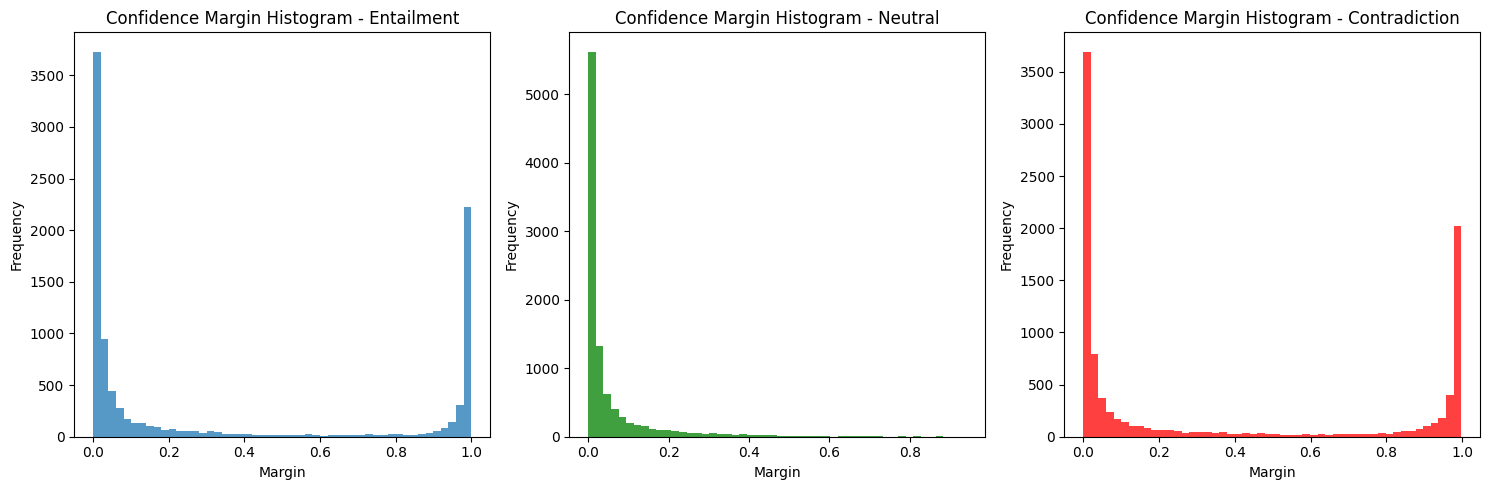

In [27]:
import matplotlib.pyplot as plt

# Plot histograms for the confidence margins
def plot_confidence_margins(df):
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.hist(df['confidence_margin_entailment'], bins=50, alpha=0.75, label='Entailment')
    plt.title('Confidence Margin Histogram - Entailment')
    plt.xlabel('Margin')
    plt.ylabel('Frequency')
    
    plt.subplot(1, 3, 2)
    plt.hist(df['confidence_margin_neutral'], bins=50, alpha=0.75, label='Neutral', color='green')
    plt.title('Confidence Margin Histogram - Neutral')
    plt.xlabel('Margin')
    plt.ylabel('Frequency')
    
    plt.subplot(1, 3, 3)
    plt.hist(df['confidence_margin_contradiction'], bins=50, alpha=0.75, label='Contradiction', color='red')
    plt.title('Confidence Margin Histogram - Contradiction')
    plt.xlabel('Margin')
    plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

plot_confidence_margins(combined_snli_df)


In [28]:
# Define thresholds based on the distribution
confidence_threshold = 0.8

# Apply threshold and create a new copy of the DataFrame
high_confidence_snli = combined_snli_df[
    (combined_snli_df['confidence_margin_entailment'] >= confidence_threshold) | 
    (combined_snli_df['confidence_margin_neutral'] >= confidence_threshold) |
    (combined_snli_df['confidence_margin_contradiction'] >= confidence_threshold)
].copy()


# Apply threshold and create a new copy of the DataFrame
high_confidence_mnli_matched = combined_mnli_matched_df[
    (combined_mnli_matched_df['confidence_margin_entailment'] >= confidence_threshold) | 
    (combined_mnli_matched_df['confidence_margin_neutral'] >= confidence_threshold) |
    (combined_mnli_matched_df['confidence_margin_contradiction'] >= confidence_threshold)
].copy()

# Apply threshold and create a new copy of the DataFrame
high_confidence_mnli_mismatched = combined_mnli_mismatched_df[
    (combined_mnli_mismatched_df['confidence_margin_entailment'] >= confidence_threshold) | 
    (combined_mnli_mismatched_df['confidence_margin_neutral'] >= confidence_threshold) |
    (combined_mnli_mismatched_df['confidence_margin_contradiction'] >= confidence_threshold)
].copy()

# Filter high confidence samples for ANLI round 1
high_confidence_anli_r1 = combined_anli_r1_df[
    (combined_anli_r1_df['confidence_margin_entailment'] >= confidence_threshold) | 
    (combined_anli_r1_df['confidence_margin_neutral'] >= confidence_threshold) |
    (combined_anli_r1_df['confidence_margin_contradiction'] >= confidence_threshold)
].copy()

# Filter high confidence samples for ANLI round 2
high_confidence_anli_r2 = combined_anli_r2_df[
    (combined_anli_r2_df['confidence_margin_entailment'] >= confidence_threshold) | 
    (combined_anli_r2_df['confidence_margin_neutral'] >= confidence_threshold) |
    (combined_anli_r2_df['confidence_margin_contradiction'] >= confidence_threshold)
].copy()

# Filter high confidence samples for ANLI round 3
high_confidence_anli_r3 = combined_anli_r3_df[
    (combined_anli_r3_df['confidence_margin_entailment'] >= confidence_threshold) | 
    (combined_anli_r3_df['confidence_margin_neutral'] >= confidence_threshold) |
    (combined_anli_r3_df['confidence_margin_contradiction'] >= confidence_threshold)
].copy()

In [29]:
# Majority vote logic with weights for numeric labels
def majority_vote_with_threshold(row):
    votes = [0, 0, 0]  # Index 0 for entailment, 1 for neutral, 2 for contradiction
    if row['confidence_margin_entailment'] >= confidence_threshold:
        votes[0] += row['confidence_margin_entailment']
    if row['confidence_margin_neutral'] >= confidence_threshold:
        votes[1] += row['confidence_margin_neutral']
    if row['confidence_margin_contradiction'] >= confidence_threshold:
        votes[2] += row['confidence_margin_contradiction']
    
    # Return the index of the highest vote
    return np.argmax(votes)

# Apply the majority vote logic using .loc
high_confidence_snli.loc[:, 'majority_vote'] = high_confidence_snli.apply(majority_vote_with_threshold, axis=1)
# Apply the majority vote logic using .loc
high_confidence_mnli_matched.loc[:, 'majority_vote'] = high_confidence_mnli_matched.apply(majority_vote_with_threshold, axis=1)
# Apply majority vote logic
high_confidence_mnli_mismatched.loc[:, 'majority_vote'] = high_confidence_mnli_mismatched.apply(majority_vote_with_threshold, axis=1)
# Apply majority vote logic
high_confidence_anli_r1.loc[:, 'majority_vote'] = high_confidence_anli_r1.apply(majority_vote_with_threshold, axis=1)
# Apply majority vote logic
high_confidence_anli_r2.loc[:, 'majority_vote'] = high_confidence_anli_r2.apply(majority_vote_with_threshold, axis=1)
# Apply majority vote logic
high_confidence_anli_r3.loc[:, 'majority_vote'] = high_confidence_anli_r3.apply(majority_vote_with_threshold, axis=1)


In [30]:
high_confidence_anli_r3

Deberta_Entailment  Deberta_Neutral  Deberta_Contradiction  \
1               0.009586         0.934714               0.055700   
3               0.004633         0.023985               0.971382   
4               0.017428         0.633695               0.348877   
5               0.002461         0.150678               0.846861   
8               0.131793         0.776056               0.092151   
...                  ...              ...                    ...   
1193            0.957103         0.040533               0.002363   
1194            0.945850         0.052813               0.001337   
1196            0.971834         0.026294               0.001872   
1197            0.973818         0.025074               0.001109   
1199            0.472737         0.477215               0.050049   

      Roberta_Entailment  Roberta_Neutral  Roberta_Contradiction  \
1               0.999611         0.000205               0.000185   
3               0.974441         0.024459               0.001100   
4               0.984416         0.011166               0.004419   
5               0.999220         0.000554               0.000227   
8               0.000384         0.002570               0.997046   
...                  ...              ...                    ...   
1193            0.000066         0.000316               0.999618   
1194            0.000607         0.000853               0.998540   
1196            0.009070         0.824654               0.166276   
1197            0.000352         0.000972               0.998677   
1199            0.000420         0.991832               0.007748   

      Albert_Entailment  Albert_Neutral  Albert_Contradiction  True_Label  \
1              0.951772        0.048075              0.000153           0   
3              0.996749        0.000989              0.002262           0   
4              0.000518        0.128416              0.871066           0   
5              0.985221        0.014745              0.000034           0   
8              0.049409        0.904356              0.046236           0   
...                 ...             ...                   ...         ...   
1193           0.009265        0.016116              0.974619           2   
1194           0.000205        0.000291              0.999504           2   
1196           0.001115        0.003229              0.995656           2   
1197           0.310862        0.618914              0.070225           2   
1199           0.015091        0.121354              0.863554           2   

      confidence_margin_entailment  confidence_margin_neutral  \
1                         0.047839                   0.886640   
3                         0.022308                   0.000474   
4                         0.966988                   0.505279   
5                         0.013998                   0.135933   
8                         0.082384                   0.128299   
...                            ...                        ...   
1193                      0.947838                   0.024417   
1194                      0.945243                   0.051960   
1196                      0.962764                   0.798360   
1197                      0.662956                   0.593840   
1199                      0.457646                   0.514617   

      confidence_margin_contradiction  majority_vote  
1                            0.055515              1  
3                            0.969120              2  
4                            0.522189              0  
5                            0.846635              2  
8                            0.904895              2  
...                               ...            ...  
1193                         0.024999              0  
1194                         0.000965              0  
1196                         0.829379              0  
1197                         0.928452              2  
1199                         0.813506              2  

[530 

In [31]:
high_confidence_mnli_mismatched

Deberta_Entailment  Deberta_Neutral  Deberta_Contradiction  \
0               0.999667         0.000160               0.000173   
1               0.998119         0.000962               0.000919   
2               0.000552         0.004809               0.994639   
3               0.827653         0.171961               0.000386   
4               0.000292         0.002875               0.996833   
...                  ...              ...                    ...   
9824            0.000760         0.013837               0.985402   
9825            0.000145         0.003906               0.995949   
9826            0.996226         0.003656               0.000118   
9828            0.997044         0.001226               0.001730   
9829            0.999685         0.000112               0.000202   

      Roberta_Entailment  Roberta_Neutral  Roberta_Contradiction  \
0               0.000068         0.000402               0.999529   
1               0.000183         0.001511               0.998306   
2               0.986062         0.012020               0.001918   
3               0.000478         0.270953               0.728569   
4               0.975167         0.021904               0.002929   
...                  ...              ...                    ...   
9824            0.972984         0.025382               0.001634   
9825            0.952827         0.045891               0.001281   
9826            0.000353         0.104717               0.894930   
9828            0.000364         0.000717               0.998919   
9829            0.000085         0.000289               0.999626   

      Albert_Entailment  Albert_Neutral  Albert_Contradiction  True_Label  \
0              0.000894        0.003787              0.995318           2   
1              0.006421        0.010224              0.983355           2   
2              0.975041        0.023354              0.001605           0   
3              0.001722        0.796122              0.202156           2   
4              0.965952        0.032748              0.001300           0   
...                 ...             ...                   ...         ...   
9824           0.925212        0.069991              0.004798           0   
9825           0.965645        0.032757              0.001598           0   
9826           0.004991        0.039946              0.955062           2   
9828           0.019078        0.039258              0.941663           2   
9829           0.000420        0.001810              0.997770           2   

      confidence_margin_entailment  confidence_margin_neutral  \
0                         0.998773                   0.003385   
1                         0.991698                   0.008714   
2                         0.011021                   0.011334   
3                         0.825931                   0.525168   
4                         0.009215                   0.010844   
...                            ...                        ...   
9824                      0.047772                   0.044608   
9825                      0.012818                   0.013134   
9826                      0.991234                   0.064771   
9828                      0.977966                   0.038033   
9829                      0.999265                   0.001521   

      confidence_margin_contradiction  majority_vote  
0                            0.004211              0  
1                            0.014951              0  
2                            0.992721              2  
3                            0.526413              0  
4                            0.993904              2  
...                               ...            ...  
9824                         0.980605              2  
9825                         0.994351              2  
9826                         0.060132              0  
9828                         0.057256              0  
9829                         0.001856              0  

[5910

In [32]:
!pip install  torch-geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.2/64.2 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 25.1 MB/s eta 0:00:0000:01


In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf



# Features and Labels
X_snli = high_confidence_snli.drop(['True_Label','majority_vote'], axis=1).values
y_snli = high_confidence_snli['True_Label'].values

# Features and Labels
X_mnli_matched = high_confidence_mnli_matched.drop(['True_Label','majority_vote'], axis=1).values
y_mnli_matched = high_confidence_mnli_matched['True_Label'].values

# Features and Labels
X_mnli_mismatched = high_confidence_mnli_mismatched.drop(['True_Label','majority_vote'], axis=1).values
y_mnli_mismatched = high_confidence_mnli_mismatched['True_Label'].values

# Features and Labels
X_anli_r1 = high_confidence_anli_r1.drop(['True_Label','majority_vote'], axis=1).values
y_anli_r1 = high_confidence_anli_r1['True_Label'].values

# Features and Labels
X_anli_r2 = high_confidence_anli_r2.drop(['True_Label','majority_vote'], axis=1).values
y_anli_r2 = high_confidence_anli_r2['True_Label'].values

# Features and Labels
X_anli_r3 = high_confidence_anli_r3.drop(['True_Label','majority_vote'], axis=1).values
y_anli_r3 = high_confidence_anli_r3['True_Label'].values


2024-04-22 16:49:12.385279: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-22 16:49:12.385384: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-22 16:49:12.511831: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [34]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GATConv
from torch_geometric.data import Data
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


# Function to create graph data
def create_graph(data, labels):
    num_nodes = data.shape[0]
    edge_index = torch.tensor([range(num_nodes), range(num_nodes)], dtype=torch.long)  # Self-loops as edges
    graph_data = Data(x=torch.tensor(data, dtype=torch.float), edge_index=edge_index, y=torch.tensor(labels, dtype=torch.long))
    return graph_data


# Define the enhanced GAT model with residual connections and multi-head attention
class EnhancedGAT(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim=32, heads=4, output_heads=1, dropout=0.3):
        super(EnhancedGAT, self).__init__()
        # First GAT layer with multi-head attention
        self.conv1 = GATConv(input_dim, hidden_dim, heads=heads, dropout=dropout, concat=True)
        # Second GAT layer with single attention head
        self.conv2 = GATConv(hidden_dim * heads, 3, heads=output_heads, dropout=dropout, concat=False)
        self.dropout = dropout
        self.residual = input_dim == 3  # Residual connection if input dimension matches output dimension

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        # Apply first GAT layer with attention dropout
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=self.dropout, training=self.training)  # Dropout for regularization
        # Apply second GAT layer and residual connection if needed
        x = self.conv2(x, edge_index)
        if self.residual:
            x += data.x  # Add residual connection
        return F.log_softmax(x, dim=1)  # Log-softmax for classification

# Define the early stopping class
class EarlyStopping:
    def __init__(self, patience=10, min_delta=0.001):
        self.patience = patience
        self.min_delta = min_delta
        self.best_loss = None
        self.wait = 0
        self.stop_training = False

    def __call__(self, loss):
        if self.best_loss is None or loss < self.best_loss - self.min_delta:
            self.best_loss = loss
            self.wait = 0
        else:
            self.wait += 1
            if self.wait >= self.patience:
                self.stop_training = True



In [36]:
# Function to plot training and validation metrics
def plot_training_and_validation(train_accuracies, val_accuracies, train_losses, val_losses, title):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(range(1, len(train_accuracies) + 1), train_accuracies, label='Train Accuracy')
    plt.plot(range(1, len(val_accuracies) + 1), val_accuracies, label='Val Accuracy', linestyle='--')
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title(f"{title} - Training and Validation Accuracy")
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(range(1, len(train_losses) + 1), train_losses, label='Train Loss')
    plt.plot(range(1, len(val_losses) + 1), val_losses, label='Val Loss', linestyle='--')
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title(f"{title} - Training and Validation Loss")
    plt.legend()
    plt.tight_layout()
    plt.show()

# Function to train and evaluate the enhanced GAT
def train_and_evaluate_enhanced_gat(train_data, test_data, name, num_epochs=100, patience=10, learning_rate=0.005, weight_decay=5e-4):
    input_dim = train_data.x.shape[1]  # Determine the input dimension
    model = EnhancedGAT(input_dim)  # Instantiate Enhanced GAT model with the correct input dimension
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
    criterion = torch.nn.CrossEntropyLoss()

    # Initialize early stopping
    early_stopping = EarlyStopping(patience=patience)

    # Variables for tracking metrics
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    # Training with validation and early stopping
    for epoch in range(num_epochs):
        model.train()  # Set to training mode
        optimizer.zero_grad()  # Reset gradients
        out = model(train_data)  # Forward pass
        loss = criterion(out, train_data.y)  # Calculate loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update weights
        train_losses.append(loss.item())  # Store training loss

        # Calculate training accuracy
        train_pred = out.argmax(dim=1)  # Get predicted labels
        train_correct = (train_pred == train_data.y).sum().item()  # Correct predictions
        train_accuracy = train_correct / train_data.num_nodes
        train_accuracies.append(train_accuracy)

        # Validation loop
        model.eval()  # Set to evaluation mode
        with torch.no_grad():
            val_out = model(test_data)  # Forward pass for validation
            val_loss = criterion(val_out, test_data.y)  # Validation loss
            val_losses.append(val_loss.item())
            val_pred = val_out.argmax(dim=1)  # Get predicted labels
            val_correct = (val_pred == test_data.y).sum().item()
            val_accuracy = val_correct / test_data.num_nodes  # Validation accuracy
            val_accuracies.append(val_accuracy)

        # Check for early stopping
        early_stopping(val_loss.item())
        if early_stopping.stop_training:
            print("Early stopping triggered")
            break

        print(f"Epoch {epoch + 1}/{num_epochs}, Train Loss: {loss:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}")

    # Final validation loss and accuracy
    final_val_loss = val_losses[-1]
    final_val_accuracy = val_accuracies[-1]

    print(f"Final Validation Loss on {name}: {final_val_loss:.4f}")
    print(f"Final Validation Accuracy on {name}: {final_val_accuracy:.4f}")

    # Plot training and validation curves
    plot_training_and_validation(train_accuracies, val_accuracies, train_losses, val_losses, name)

    return model, final_val_loss, final_val_accuracy




Epoch 1/100, Train Loss: 1.0636, Val Loss: 0.8875, Val Accuracy: 0.5808
Epoch 2/100, Train Loss: 0.9227, Val Loss: 0.7605, Val Accuracy: 0.9437
Epoch 3/100, Train Loss: 0.8048, Val Loss: 0.6523, Val Accuracy: 0.9437
Epoch 4/100, Train Loss: 0.7188, Val Loss: 0.5603, Val Accuracy: 0.9445
Epoch 5/100, Train Loss: 0.6607, Val Loss: 0.4828, Val Accuracy: 0.9445
Epoch 6/100, Train Loss: 0.6077, Val Loss: 0.4184, Val Accuracy: 0.9445
Epoch 7/100, Train Loss: 0.5767, Val Loss: 0.3667, Val Accuracy: 0.9445
Epoch 8/100, Train Loss: 0.5341, Val Loss: 0.3256, Val Accuracy: 0.9445
Epoch 9/100, Train Loss: 0.5227, Val Loss: 0.2937, Val Accuracy: 0.9445
Epoch 10/100, Train Loss: 0.5006, Val Loss: 0.2690, Val Accuracy: 0.9445
Epoch 11/100, Train Loss: 0.4991, Val Loss: 0.2502, Val Accuracy: 0.9445
Epoch 12/100, Train Loss: 0.4964, Val Loss: 0.2359, Val Accuracy: 0.9445
Epoch 13/100, Train Loss: 0.4936, Val Loss: 0.2249, Val Accuracy: 0.9445
Epoch 14/100, Train Loss: 0.4679, Val Loss: 0.2163, Val Accu

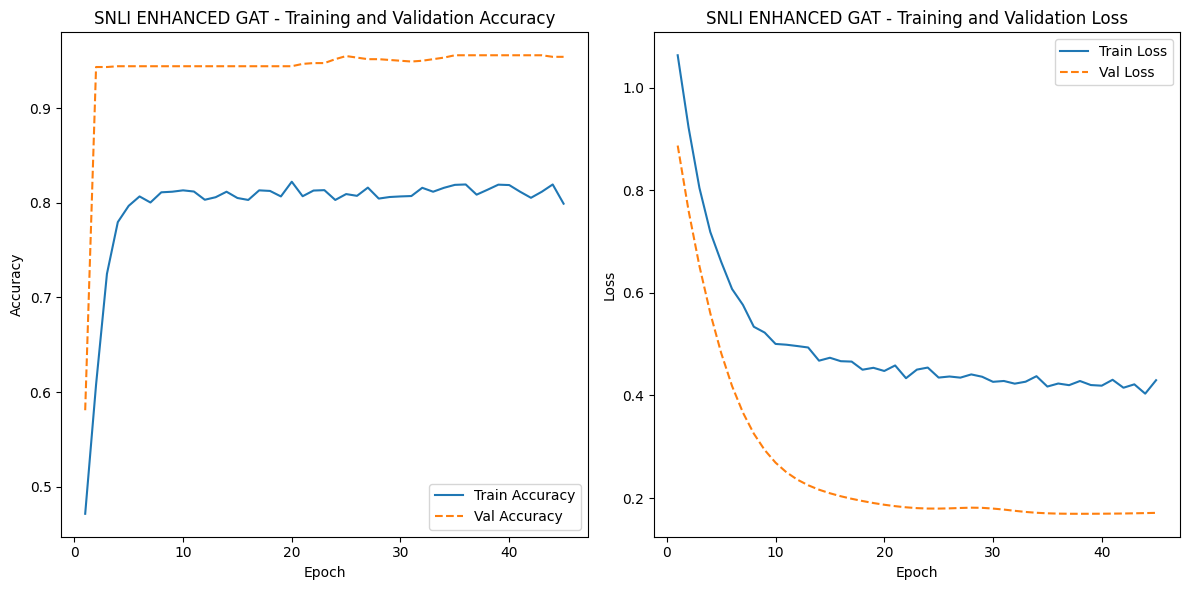

In [38]:
X_train_snli, X_test_snli, y_train_snli, y_test_snli = train_test_split(X_snli, y_snli, test_size=0.2, random_state=42)

# Create graph data for SNLI
train_graph_snli = create_graph(X_train_snli, y_train_snli)
test_graph_snli = create_graph(X_test_snli, y_test_snli)

# Call the function to train and evaluate for SNLI
model_snli, val_loss_snli, val_accuracy_snli = train_and_evaluate_enhanced_gat(
    train_graph_snli, test_graph_snli, 'SNLI ENHANCED GAT'
)


Epoch 1/100, Train Loss: 1.1021, Val Loss: 0.9014, Val Accuracy: 0.7713
Epoch 2/100, Train Loss: 0.9405, Val Loss: 0.7586, Val Accuracy: 0.9582
Epoch 3/100, Train Loss: 0.8116, Val Loss: 0.6375, Val Accuracy: 0.9616
Epoch 4/100, Train Loss: 0.7084, Val Loss: 0.5359, Val Accuracy: 0.9616
Epoch 5/100, Train Loss: 0.6482, Val Loss: 0.4527, Val Accuracy: 0.9616
Epoch 6/100, Train Loss: 0.5856, Val Loss: 0.3856, Val Accuracy: 0.9616
Epoch 7/100, Train Loss: 0.5408, Val Loss: 0.3324, Val Accuracy: 0.9608
Epoch 8/100, Train Loss: 0.5213, Val Loss: 0.2905, Val Accuracy: 0.9608
Epoch 9/100, Train Loss: 0.5166, Val Loss: 0.2582, Val Accuracy: 0.9608
Epoch 10/100, Train Loss: 0.4898, Val Loss: 0.2335, Val Accuracy: 0.9608
Epoch 11/100, Train Loss: 0.4677, Val Loss: 0.2149, Val Accuracy: 0.9608
Epoch 12/100, Train Loss: 0.4511, Val Loss: 0.2010, Val Accuracy: 0.9608
Epoch 13/100, Train Loss: 0.4607, Val Loss: 0.1908, Val Accuracy: 0.9608
Epoch 14/100, Train Loss: 0.4556, Val Loss: 0.1833, Val Accu

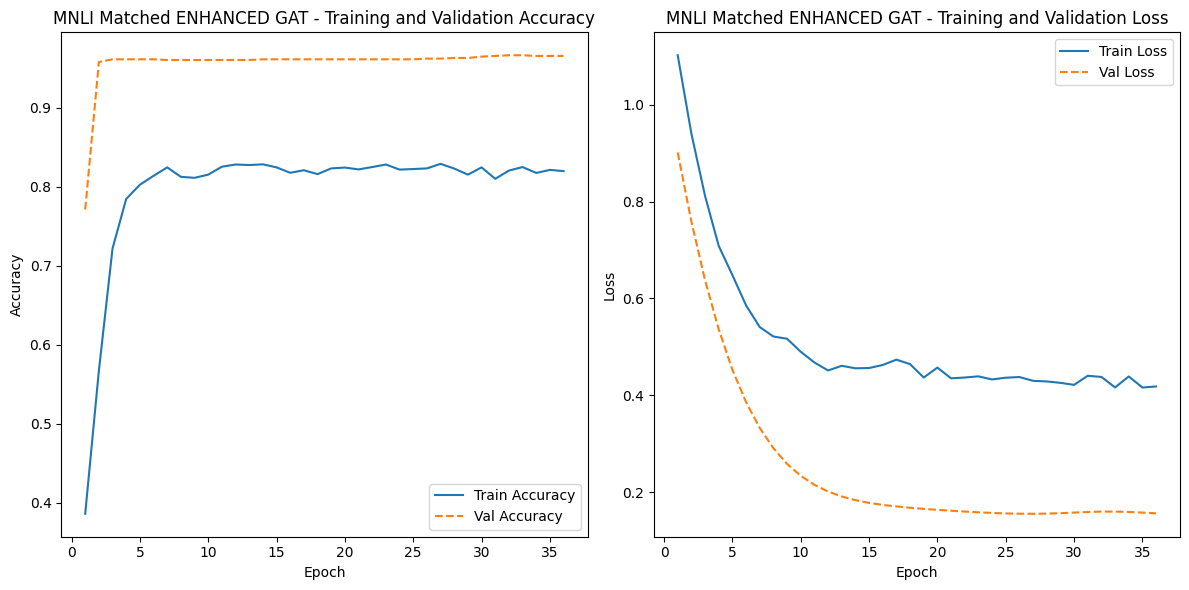

In [39]:
X_train_mnli_matched, X_test_mnli_matched, y_train_mnli_matched, y_test_mnli_matched = train_test_split(X_mnli_matched, y_mnli_matched, test_size=0.2, random_state=42)

# Create graph data for MNLI Matched
train_graph_mnli_matched = create_graph(X_train_mnli_matched, y_train_mnli_matched)
test_graph_mnli_matched = create_graph(X_test_mnli_matched, y_test_mnli_matched)

# Call the function to train and evaluate for MNLI Matched
model_mnli_matched, val_loss_mnli_matched, val_accuracy_mnli_matched = train_and_evaluate_enhanced_gat(
    train_graph_mnli_matched, test_graph_mnli_matched, 'MNLI Matched ENHANCED GAT'
)

Epoch 1/100, Train Loss: 1.2640, Val Loss: 1.0521, Val Accuracy: 0.0508
Epoch 2/100, Train Loss: 1.0811, Val Loss: 0.8971, Val Accuracy: 0.9585
Epoch 3/100, Train Loss: 0.9376, Val Loss: 0.7612, Val Accuracy: 0.9670
Epoch 4/100, Train Loss: 0.8259, Val Loss: 0.6450, Val Accuracy: 0.9679
Epoch 5/100, Train Loss: 0.7291, Val Loss: 0.5476, Val Accuracy: 0.9670
Epoch 6/100, Train Loss: 0.6497, Val Loss: 0.4665, Val Accuracy: 0.9670
Epoch 7/100, Train Loss: 0.5918, Val Loss: 0.3994, Val Accuracy: 0.9670
Epoch 8/100, Train Loss: 0.5524, Val Loss: 0.3444, Val Accuracy: 0.9670
Epoch 9/100, Train Loss: 0.5402, Val Loss: 0.2999, Val Accuracy: 0.9670
Epoch 10/100, Train Loss: 0.5154, Val Loss: 0.2643, Val Accuracy: 0.9670
Epoch 11/100, Train Loss: 0.4929, Val Loss: 0.2362, Val Accuracy: 0.9670
Epoch 12/100, Train Loss: 0.4923, Val Loss: 0.2146, Val Accuracy: 0.9670
Epoch 13/100, Train Loss: 0.4794, Val Loss: 0.1981, Val Accuracy: 0.9670
Epoch 14/100, Train Loss: 0.4647, Val Loss: 0.1854, Val Accu

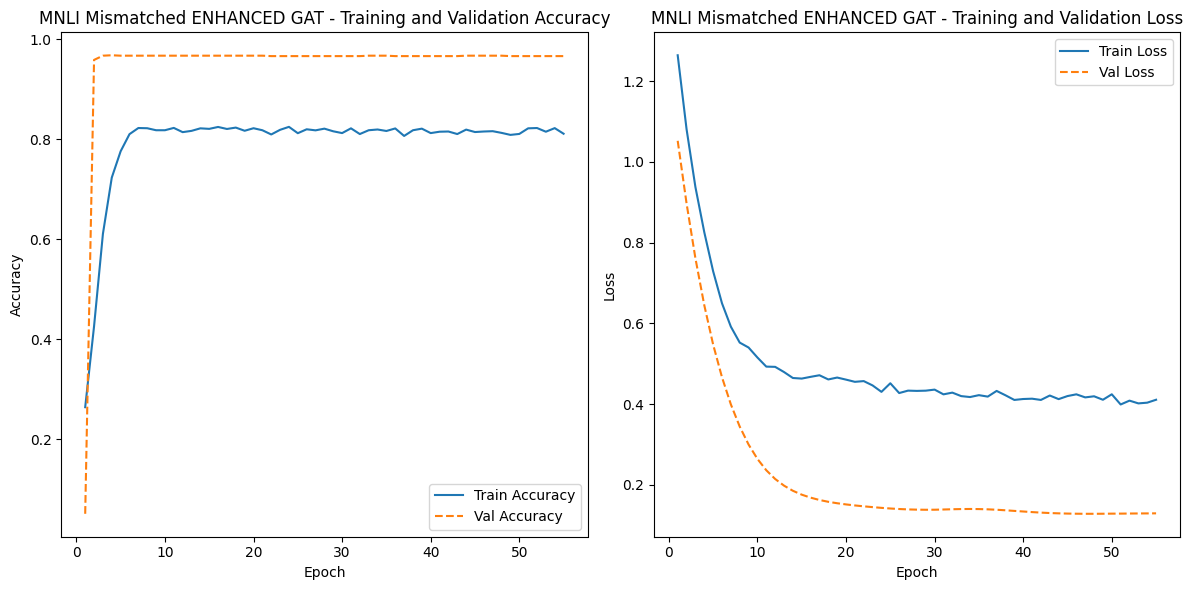

In [40]:
X_train_mnli_mismatched, X_test_mnli_mismatched, y_train_mnli_mismatched, y_test_mnli_mismatched = train_test_split(X_mnli_mismatched, y_mnli_mismatched, test_size=0.2, random_state=42)

# Create graph data for MNLI mismatched
train_graph_mnli_mismatched = create_graph(X_train_mnli_mismatched, y_train_mnli_mismatched)
test_graph_mnli_mismatched = create_graph(X_test_mnli_mismatched, y_test_mnli_mismatched)

# Call the function to train and evaluate for MNLI Matched
model_mnli_mismatched, val_loss_mnli_mismatched, val_accuracy_mnli_mismatched = train_and_evaluate_enhanced_gat(
    train_graph_mnli_mismatched, test_graph_mnli_mismatched, 'MNLI Mismatched ENHANCED GAT'
)

Epoch 1/100, Train Loss: 1.1159, Val Loss: 1.0064, Val Accuracy: 0.6395
Epoch 2/100, Train Loss: 1.0311, Val Loss: 0.9260, Val Accuracy: 0.6744
Epoch 3/100, Train Loss: 0.9818, Val Loss: 0.8535, Val Accuracy: 0.8256
Epoch 4/100, Train Loss: 0.9330, Val Loss: 0.7898, Val Accuracy: 0.8605
Epoch 5/100, Train Loss: 0.8796, Val Loss: 0.7341, Val Accuracy: 0.8605
Epoch 6/100, Train Loss: 0.8649, Val Loss: 0.6866, Val Accuracy: 0.8605
Epoch 7/100, Train Loss: 0.8351, Val Loss: 0.6456, Val Accuracy: 0.8488
Epoch 8/100, Train Loss: 0.8103, Val Loss: 0.6111, Val Accuracy: 0.8488
Epoch 9/100, Train Loss: 0.8008, Val Loss: 0.5820, Val Accuracy: 0.8372
Epoch 10/100, Train Loss: 0.7478, Val Loss: 0.5568, Val Accuracy: 0.8256
Epoch 11/100, Train Loss: 0.7653, Val Loss: 0.5358, Val Accuracy: 0.8140
Epoch 12/100, Train Loss: 0.7191, Val Loss: 0.5167, Val Accuracy: 0.8140
Epoch 13/100, Train Loss: 0.7724, Val Loss: 0.5017, Val Accuracy: 0.7907
Epoch 14/100, Train Loss: 0.7593, Val Loss: 0.4890, Val Accu

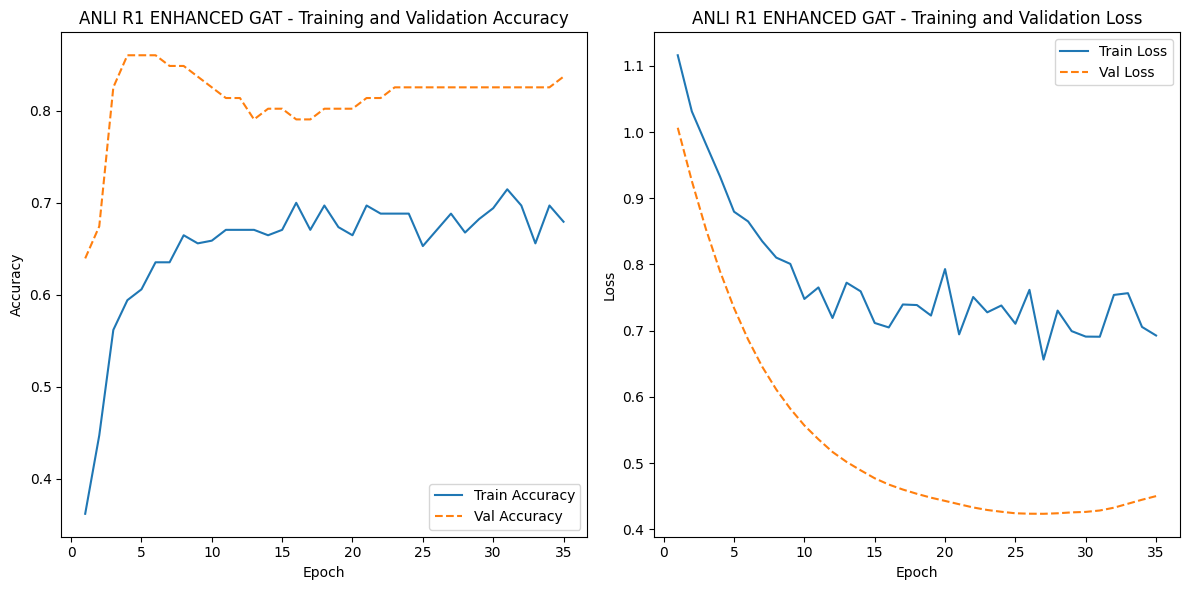

In [41]:
X_train_anli_r1, X_test_anli_r1, y_train_anli_r1, y_test_anli_r1 = train_test_split(X_anli_r1, y_anli_r1, test_size=0.2, random_state=42)

# Create graph data for ANLI r1
train_graph_anli_r1 = create_graph(X_train_anli_r1, y_train_anli_r1)
test_graph_anli_r1 = create_graph(X_test_anli_r1, y_test_anli_r1)

# Call the function to train and evaluate for ANLI r1
model_anli_r1, val_loss_anli_r1, val_accuracy_anli_r1 = train_and_evaluate_enhanced_gat(
    train_graph_anli_r1, test_graph_anli_r1, 'ANLI R1 ENHANCED GAT'
)

Epoch 1/100, Train Loss: 1.0610, Val Loss: 0.9864, Val Accuracy: 0.6292
Epoch 2/100, Train Loss: 1.0166, Val Loss: 0.9262, Val Accuracy: 0.6517
Epoch 3/100, Train Loss: 0.9853, Val Loss: 0.8779, Val Accuracy: 0.6629
Epoch 4/100, Train Loss: 0.9414, Val Loss: 0.8362, Val Accuracy: 0.6629
Epoch 5/100, Train Loss: 0.9222, Val Loss: 0.8024, Val Accuracy: 0.7191
Epoch 6/100, Train Loss: 0.8837, Val Loss: 0.7734, Val Accuracy: 0.7079
Epoch 7/100, Train Loss: 0.8636, Val Loss: 0.7492, Val Accuracy: 0.7079
Epoch 8/100, Train Loss: 0.8844, Val Loss: 0.7319, Val Accuracy: 0.7079
Epoch 9/100, Train Loss: 0.9022, Val Loss: 0.7198, Val Accuracy: 0.7191
Epoch 10/100, Train Loss: 0.8266, Val Loss: 0.7083, Val Accuracy: 0.7303
Epoch 11/100, Train Loss: 0.8860, Val Loss: 0.6999, Val Accuracy: 0.7303
Epoch 12/100, Train Loss: 0.8090, Val Loss: 0.6940, Val Accuracy: 0.7303
Epoch 13/100, Train Loss: 0.8506, Val Loss: 0.6903, Val Accuracy: 0.7303
Epoch 14/100, Train Loss: 0.8290, Val Loss: 0.6880, Val Accu

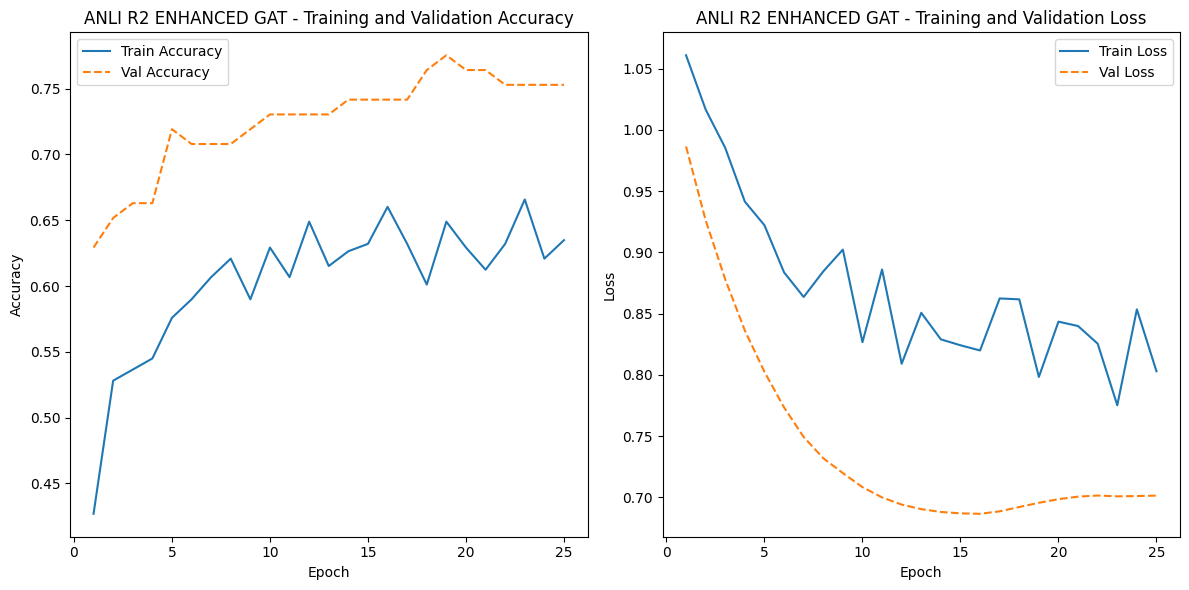

In [42]:
X_train_anli_r2, X_test_anli_r2, y_train_anli_r2, y_test_anli_r2 = train_test_split(X_anli_r2, y_anli_r2, test_size=0.2, random_state=42)

# Create graph data for ANLI r2
train_graph_anli_r2 = create_graph(X_train_anli_r2, y_train_anli_r2)
test_graph_anli_r2 = create_graph(X_test_anli_r2, y_test_anli_r2)

# Call the function to train and evaluate for ANLI r2
model_anli_r2, val_loss_anli_r2, val_accuracy_anli_r2 = train_and_evaluate_enhanced_gat(
    train_graph_anli_r2, test_graph_anli_r2, 'ANLI R2 ENHANCED GAT'
)

Epoch 1/100, Train Loss: 1.2571, Val Loss: 1.1259, Val Accuracy: 0.2264
Epoch 2/100, Train Loss: 1.1530, Val Loss: 1.0531, Val Accuracy: 0.5566
Epoch 3/100, Train Loss: 1.0616, Val Loss: 0.9935, Val Accuracy: 0.6415
Epoch 4/100, Train Loss: 1.0096, Val Loss: 0.9444, Val Accuracy: 0.5943
Epoch 5/100, Train Loss: 0.9724, Val Loss: 0.9025, Val Accuracy: 0.6038
Epoch 6/100, Train Loss: 0.9272, Val Loss: 0.8665, Val Accuracy: 0.6038
Epoch 7/100, Train Loss: 0.8991, Val Loss: 0.8349, Val Accuracy: 0.6509
Epoch 8/100, Train Loss: 0.8999, Val Loss: 0.8075, Val Accuracy: 0.6887
Epoch 9/100, Train Loss: 0.8842, Val Loss: 0.7828, Val Accuracy: 0.7264
Epoch 10/100, Train Loss: 0.8536, Val Loss: 0.7607, Val Accuracy: 0.7264
Epoch 11/100, Train Loss: 0.8952, Val Loss: 0.7420, Val Accuracy: 0.7453
Epoch 12/100, Train Loss: 0.8294, Val Loss: 0.7251, Val Accuracy: 0.7453
Epoch 13/100, Train Loss: 0.8171, Val Loss: 0.7104, Val Accuracy: 0.7453
Epoch 14/100, Train Loss: 0.8358, Val Loss: 0.6972, Val Accu

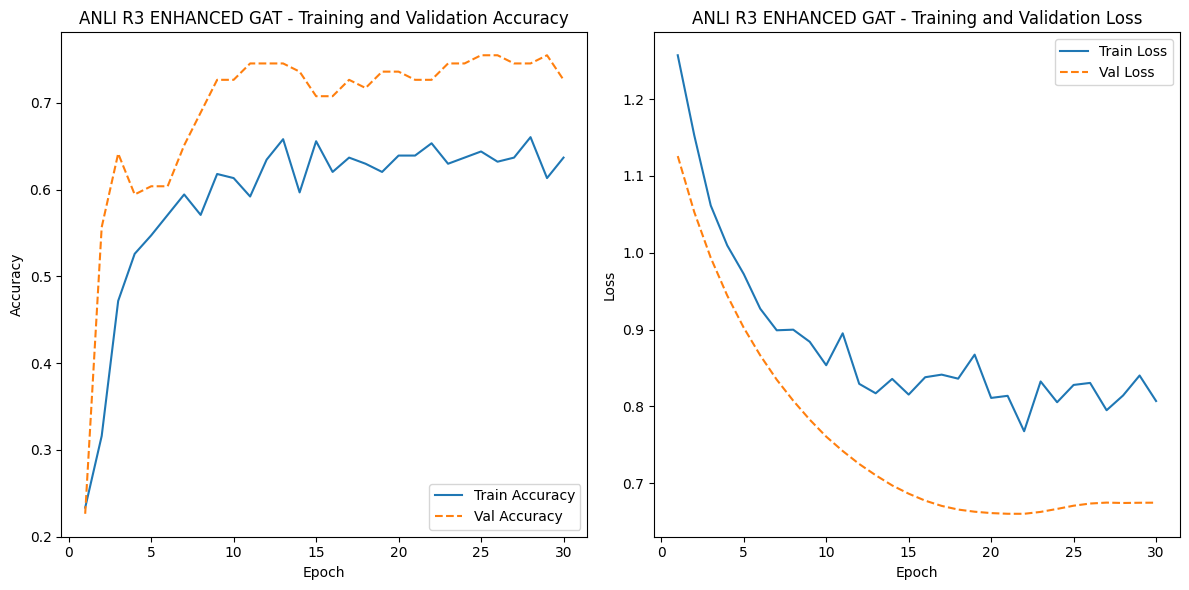

In [43]:
X_train_anli_r3, X_test_anli_r3, y_train_anli_r3, y_test_anli_r3 = train_test_split(X_anli_r3, y_anli_r3, test_size=0.2, random_state=42)

# Create graph data for ANLI r3
train_graph_anli_r3 = create_graph(X_train_anli_r3, y_train_anli_r3)
test_graph_anli_r3 = create_graph(X_test_anli_r3, y_test_anli_r3)

# Call the function to train and evaluate for ANLI r3
model_anli_r3, val_loss_anli_r3, val_accuracy_anli_r3 = train_and_evaluate_enhanced_gat(
    train_graph_anli_r3, test_graph_anli_r3, 'ANLI R3 ENHANCED GAT'
)

/tmp/ipykernel_34/1454212303.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  graph_data = Data(x=torch.tensor(data, dtype=torch.float), edge_index=edge_index, y=torch.tensor(labels, dtype=torch.long))


Epoch 1/100, Train Loss: 1.2699, Val Loss: 1.0718, Val Accuracy: 0.4828
Epoch 2/100, Train Loss: 1.1013, Val Loss: 0.9242, Val Accuracy: 0.9245
Epoch 3/100, Train Loss: 0.9604, Val Loss: 0.7972, Val Accuracy: 0.9357
Epoch 4/100, Train Loss: 0.8452, Val Loss: 0.6890, Val Accuracy: 0.9362
Epoch 5/100, Train Loss: 0.7601, Val Loss: 0.5993, Val Accuracy: 0.9370
Epoch 6/100, Train Loss: 0.6874, Val Loss: 0.5245, Val Accuracy: 0.9381
Epoch 7/100, Train Loss: 0.6422, Val Loss: 0.4618, Val Accuracy: 0.9378
Epoch 8/100, Train Loss: 0.5996, Val Loss: 0.4097, Val Accuracy: 0.9381
Epoch 9/100, Train Loss: 0.5711, Val Loss: 0.3671, Val Accuracy: 0.9378
Epoch 10/100, Train Loss: 0.5617, Val Loss: 0.3328, Val Accuracy: 0.9378
Epoch 11/100, Train Loss: 0.5388, Val Loss: 0.3052, Val Accuracy: 0.9378
Epoch 12/100, Train Loss: 0.5217, Val Loss: 0.2832, Val Accuracy: 0.9378
Epoch 13/100, Train Loss: 0.5195, Val Loss: 0.2654, Val Accuracy: 0.9378
Epoch 14/100, Train Loss: 0.5099, Val Loss: 0.2511, Val Accu

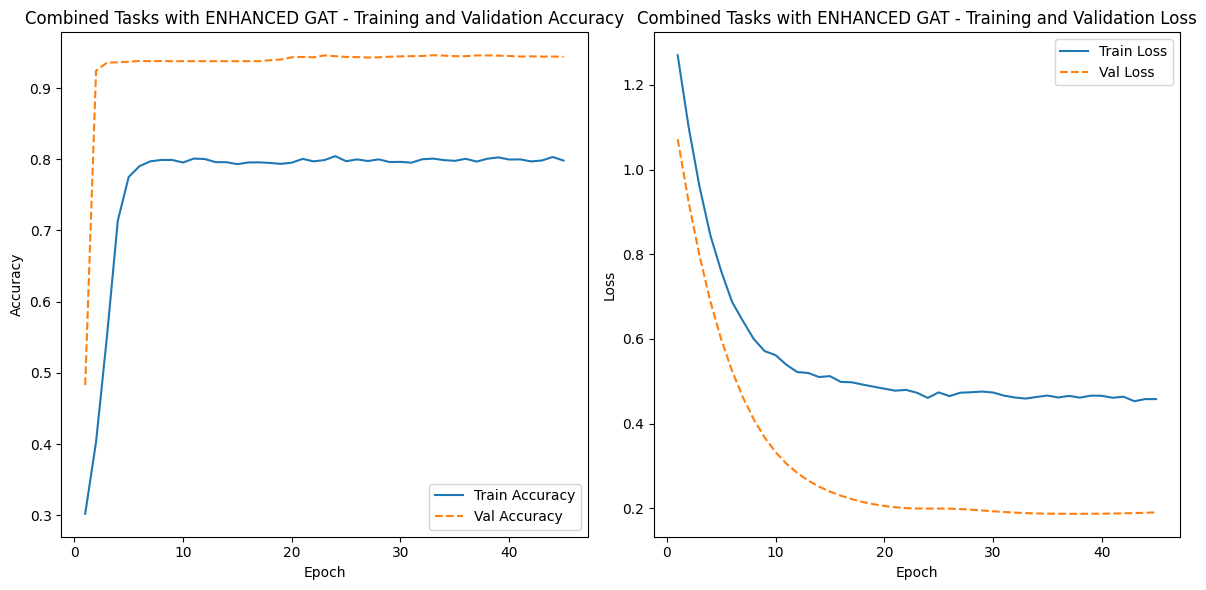

In [44]:
import torch

# Convert NumPy arrays to PyTorch tensors
X_train_snli_tensor = torch.tensor(X_train_snli)
X_train_mnli_matched_tensor = torch.tensor(X_train_mnli_matched)
X_train_mnli_mismatched_tensor = torch.tensor(X_train_mnli_mismatched)
X_train_anli_r1_tensor = torch.tensor(X_train_anli_r1)
X_train_anli_r2_tensor = torch.tensor(X_train_anli_r2)
X_train_anli_r3_tensor = torch.tensor(X_train_anli_r3)

y_train_snli_tensor = torch.tensor(y_train_snli)
y_train_mnli_matched_tensor = torch.tensor(y_train_mnli_matched)
y_train_mnli_mismatched_tensor = torch.tensor(y_train_mnli_mismatched)
y_train_anli_r1_tensor = torch.tensor(y_train_anli_r1)
y_train_anli_r2_tensor = torch.tensor(y_train_anli_r2)
y_train_anli_r3_tensor = torch.tensor(y_train_anli_r3)

# Concatenate X_train and y_train for all tasks
X_train_all = torch.cat([X_train_snli_tensor, X_train_mnli_matched_tensor, X_train_mnli_mismatched_tensor, X_train_anli_r1_tensor, X_train_anli_r2_tensor, X_train_anli_r3_tensor], dim=0)
y_train_all = torch.cat([y_train_snli_tensor, y_train_mnli_matched_tensor, y_train_mnli_mismatched_tensor, y_train_anli_r1_tensor, y_train_anli_r2_tensor, y_train_anli_r3_tensor], dim=0)

# Convert NumPy arrays to PyTorch tensors for test data
X_test_snli_tensor = torch.tensor(X_test_snli)
X_test_mnli_matched_tensor = torch.tensor(X_test_mnli_matched)
X_test_mnli_mismatched_tensor = torch.tensor(X_test_mnli_mismatched)
X_test_anli_r1_tensor = torch.tensor(X_test_anli_r1)
X_test_anli_r2_tensor = torch.tensor(X_test_anli_r2)
X_test_anli_r3_tensor = torch.tensor(X_test_anli_r3)

y_test_snli_tensor = torch.tensor(y_test_snli)
y_test_mnli_matched_tensor = torch.tensor(y_test_mnli_matched)
y_test_mnli_mismatched_tensor = torch.tensor(y_test_mnli_mismatched)
y_test_anli_r1_tensor = torch.tensor(y_test_anli_r1)
y_test_anli_r2_tensor = torch.tensor(y_test_anli_r2)
y_test_anli_r3_tensor = torch.tensor(y_test_anli_r3)

# Concatenate X_test and y_test for all tasks
X_test_all = torch.cat([X_test_snli_tensor, X_test_mnli_matched_tensor, X_test_mnli_mismatched_tensor, X_test_anli_r1_tensor, X_test_anli_r2_tensor, X_test_anli_r3_tensor], dim=0)
y_test_all = torch.cat([y_test_snli_tensor, y_test_mnli_matched_tensor, y_test_mnli_mismatched_tensor, y_test_anli_r1_tensor, y_test_anli_r2_tensor, y_test_anli_r3_tensor], dim=0)

# Create graph data for ALL combined data
train_graph_all = create_graph(X_train_all, y_train_all)
test_graph_all = create_graph(X_test_all, y_test_all)

# Train and evaluate the model on the combined dataset
model_all, final_val_loss_all, final_val_accuracy_all = train_and_evaluate_enhanced_gat(
    train_graph_all, test_graph_all, 'Combined Tasks with ENHANCED GAT'
)


In [45]:
# Specify the file path where you want to save the model
model_save_path = "/kaggle/working/EGAT_feature_ensemble.h5"

# Save the model
torch.save(model_all.state_dict(), model_save_path)

print(f"Model saved successfully at: {model_save_path}")


Model saved successfully at: /kaggle/working/EGAT_feature_ensemble.h5


In [46]:
from sklearn.model_selection import KFold
import numpy as np

# Cross-Validation for Enhanced GAT
def cross_validate_egat(task_name, X_train, y_train, num_epochs=100, patience=10, learning_rate=0.005, weight_decay=5e-4):
    k = 5  # Number of folds
    kf = KFold(n_splits=k, shuffle=True)  # Initialize K-Fold
    val_losses, val_accuracies = [], []

    # Iterate through each fold
    for fold_idx, (train_indices, val_indices) in enumerate(kf.split(X_train)):
        # Create training and validation data for this fold
        X_train_fold = X_train[train_indices]
        y_train_fold = y_train[train_indices]
        X_val_fold = X_train[val_indices]
        y_val_fold = y_train[val_indices]

        # Create graph data for this fold
        train_graph_fold = create_graph(X_train_fold, y_train_fold)
        val_graph_fold = create_graph(X_val_fold, y_val_fold)

        # Train and evaluate the Enhanced GAT on this fold
        _, val_loss_fold, val_accuracy_fold = train_and_evaluate_enhanced_gat(
            train_graph_fold, val_graph_fold, f'{task_name} Fold {fold_idx + 1}', 
            num_epochs=num_epochs, patience=patience, learning_rate=learning_rate, weight_decay=weight_decay
        )

        # Record metrics for this fold
        val_losses.append(val_loss_fold)
        val_accuracies.append(val_accuracy_fold)

    # Calculate average validation loss and accuracy across all folds
    avg_val_loss = np.mean(val_losses)
    avg_val_accuracy = np.mean(val_accuracies)

    # Output results and plot
    print(f"Average Validation Loss for {task_name} across {k} folds: {avg_val_loss:.4f}")
    print(f"Average Validation Accuracy for {task_name} across {k} folds: {avg_val_accuracy:.4f}")

    # Plot training and validation accuracy and loss across all folds
    plt.figure(figsize=(12, 6))

    # Validation accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(range(1, k + 1), val_accuracies, label='Val Accuracy', linestyle='--')
    plt.xlabel("Fold")
    plt.ylabel("Accuracy")
    plt.title("Validation Accuracy Across Folds")
    plt.legend()

    # Validation loss plot
    plt.subplot(1, 2, 2)
    plt.plot(range(1, k + 1), val_losses, label='Val Loss', linestyle='--')
    plt.xlabel("Fold")
    plt.ylabel("Loss")
    plt.title("Validation Loss Across Folds")
    plt.legend()

    plt.tight_layout()
    plt.show()

    return avg_val_loss, avg_val_accuracy

Epoch 1/100, Train Loss: 0.9978, Val Loss: 0.8125, Val Accuracy: 0.9617
Epoch 2/100, Train Loss: 0.8686, Val Loss: 0.6919, Val Accuracy: 0.9627
Epoch 3/100, Train Loss: 0.7636, Val Loss: 0.5876, Val Accuracy: 0.9627
Epoch 4/100, Train Loss: 0.6925, Val Loss: 0.4995, Val Accuracy: 0.9627
Epoch 5/100, Train Loss: 0.6323, Val Loss: 0.4257, Val Accuracy: 0.9627
Epoch 6/100, Train Loss: 0.5855, Val Loss: 0.3645, Val Accuracy: 0.9627
Epoch 7/100, Train Loss: 0.5615, Val Loss: 0.3148, Val Accuracy: 0.9627
Epoch 8/100, Train Loss: 0.5244, Val Loss: 0.2754, Val Accuracy: 0.9627
Epoch 9/100, Train Loss: 0.5142, Val Loss: 0.2440, Val Accuracy: 0.9627
Epoch 10/100, Train Loss: 0.5172, Val Loss: 0.2191, Val Accuracy: 0.9627
Epoch 11/100, Train Loss: 0.4984, Val Loss: 0.1994, Val Accuracy: 0.9627
Epoch 12/100, Train Loss: 0.4970, Val Loss: 0.1840, Val Accuracy: 0.9627
Epoch 13/100, Train Loss: 0.4785, Val Loss: 0.1717, Val Accuracy: 0.9627
Epoch 14/100, Train Loss: 0.4568, Val Loss: 0.1618, Val Accu

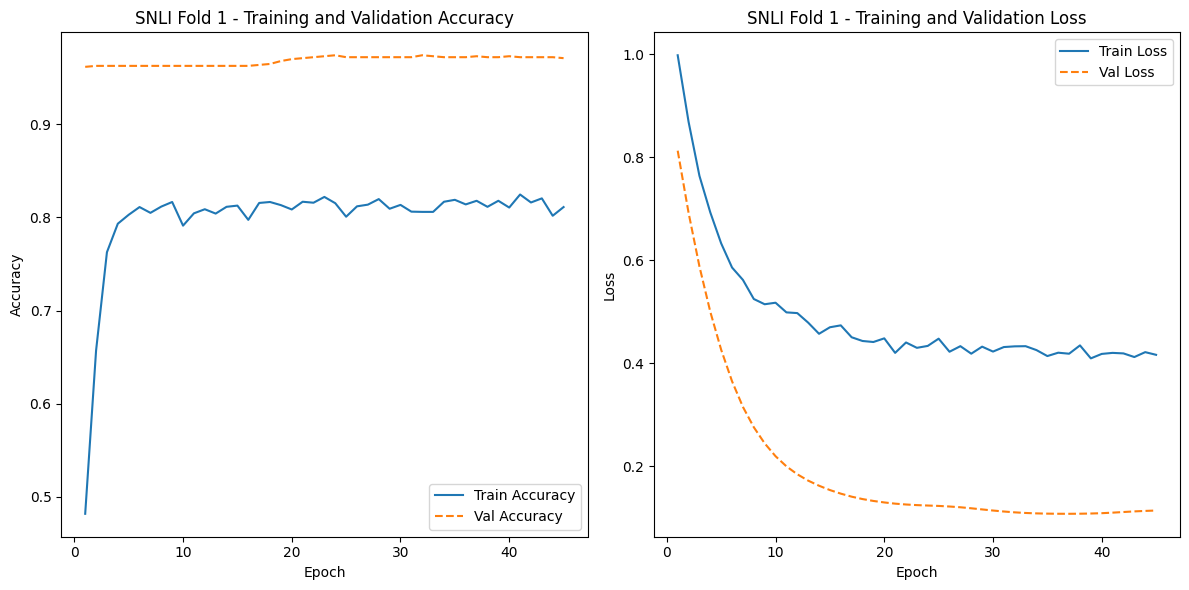

Epoch 1/100, Train Loss: 0.9928, Val Loss: 0.8100, Val Accuracy: 0.9534
Epoch 2/100, Train Loss: 0.8599, Val Loss: 0.6814, Val Accuracy: 0.9565
Epoch 3/100, Train Loss: 0.7527, Val Loss: 0.5739, Val Accuracy: 0.9565
Epoch 4/100, Train Loss: 0.6605, Val Loss: 0.4856, Val Accuracy: 0.9565
Epoch 5/100, Train Loss: 0.6049, Val Loss: 0.4135, Val Accuracy: 0.9565
Epoch 6/100, Train Loss: 0.5708, Val Loss: 0.3558, Val Accuracy: 0.9565
Epoch 7/100, Train Loss: 0.5303, Val Loss: 0.3095, Val Accuracy: 0.9565
Epoch 8/100, Train Loss: 0.5241, Val Loss: 0.2728, Val Accuracy: 0.9565
Epoch 9/100, Train Loss: 0.5108, Val Loss: 0.2439, Val Accuracy: 0.9565
Epoch 10/100, Train Loss: 0.4855, Val Loss: 0.2209, Val Accuracy: 0.9565
Epoch 11/100, Train Loss: 0.4959, Val Loss: 0.2031, Val Accuracy: 0.9565
Epoch 12/100, Train Loss: 0.4652, Val Loss: 0.1890, Val Accuracy: 0.9565
Epoch 13/100, Train Loss: 0.4726, Val Loss: 0.1778, Val Accuracy: 0.9565
Epoch 14/100, Train Loss: 0.4724, Val Loss: 0.1688, Val Accu

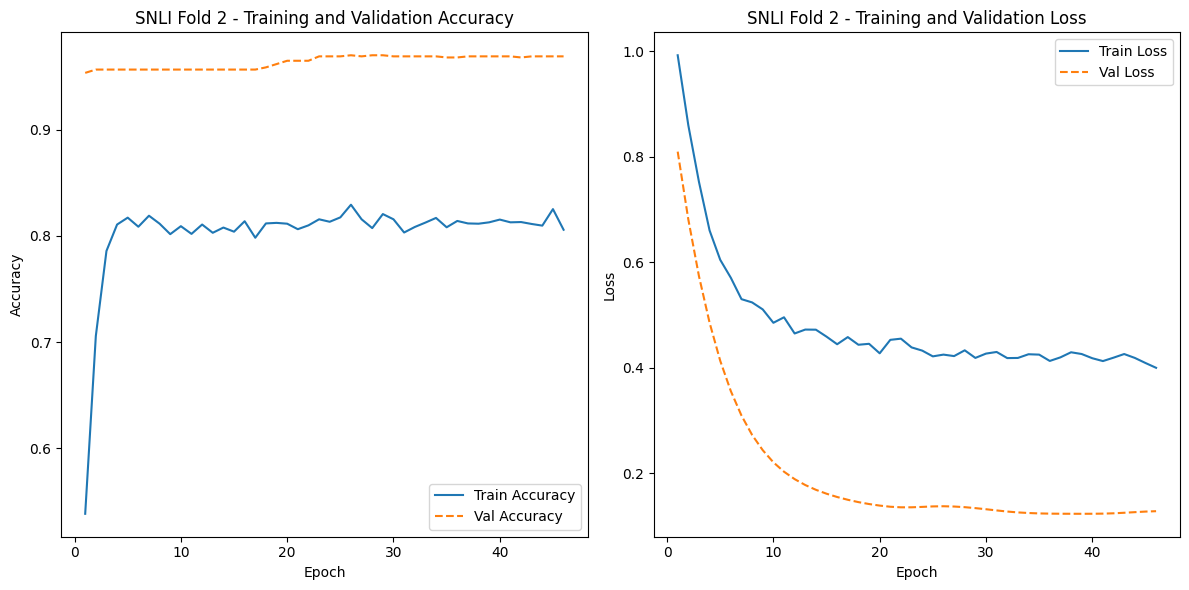

Epoch 1/100, Train Loss: 1.0644, Val Loss: 0.8741, Val Accuracy: 0.9554
Epoch 2/100, Train Loss: 0.9189, Val Loss: 0.7332, Val Accuracy: 0.9565
Epoch 3/100, Train Loss: 0.7965, Val Loss: 0.6136, Val Accuracy: 0.9565
Epoch 4/100, Train Loss: 0.6931, Val Loss: 0.5165, Val Accuracy: 0.9565
Epoch 5/100, Train Loss: 0.6340, Val Loss: 0.4375, Val Accuracy: 0.9565
Epoch 6/100, Train Loss: 0.5840, Val Loss: 0.3740, Val Accuracy: 0.9565
Epoch 7/100, Train Loss: 0.5441, Val Loss: 0.3233, Val Accuracy: 0.9565
Epoch 8/100, Train Loss: 0.5371, Val Loss: 0.2833, Val Accuracy: 0.9565
Epoch 9/100, Train Loss: 0.5060, Val Loss: 0.2526, Val Accuracy: 0.9565
Epoch 10/100, Train Loss: 0.4915, Val Loss: 0.2293, Val Accuracy: 0.9565
Epoch 11/100, Train Loss: 0.4918, Val Loss: 0.2113, Val Accuracy: 0.9565
Epoch 12/100, Train Loss: 0.4778, Val Loss: 0.1977, Val Accuracy: 0.9565
Epoch 13/100, Train Loss: 0.4688, Val Loss: 0.1872, Val Accuracy: 0.9565
Epoch 14/100, Train Loss: 0.4715, Val Loss: 0.1791, Val Accu

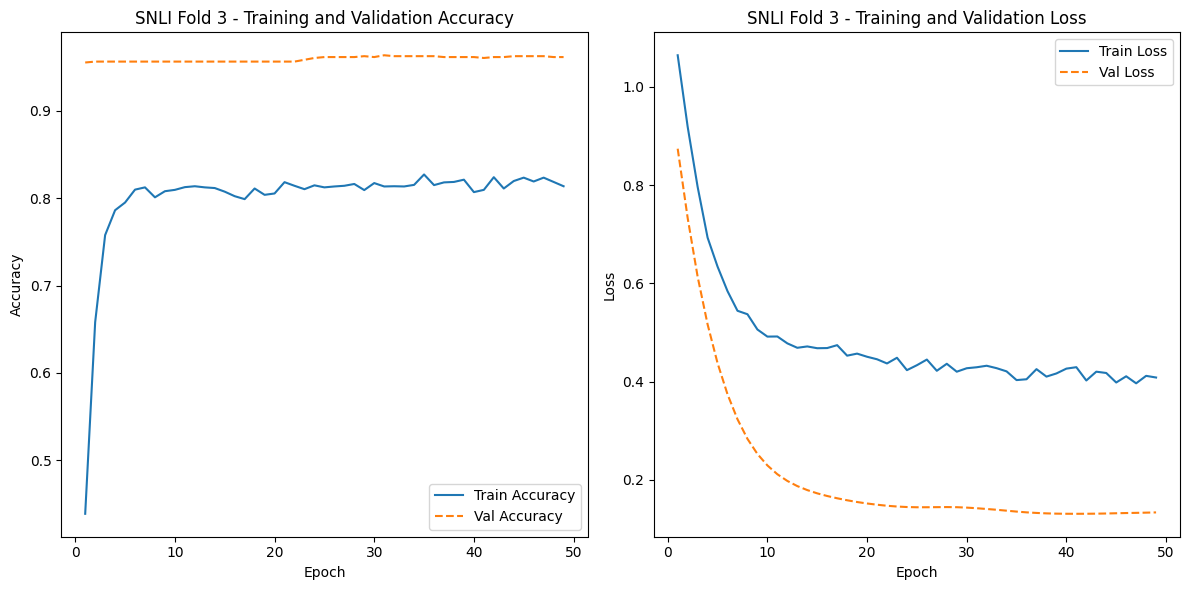

Epoch 1/100, Train Loss: 1.0202, Val Loss: 0.8599, Val Accuracy: 0.9554
Epoch 2/100, Train Loss: 0.8880, Val Loss: 0.7352, Val Accuracy: 0.9503
Epoch 3/100, Train Loss: 0.7879, Val Loss: 0.6279, Val Accuracy: 0.9482
Epoch 4/100, Train Loss: 0.6967, Val Loss: 0.5366, Val Accuracy: 0.9482
Epoch 5/100, Train Loss: 0.6257, Val Loss: 0.4607, Val Accuracy: 0.9482
Epoch 6/100, Train Loss: 0.5900, Val Loss: 0.3973, Val Accuracy: 0.9482
Epoch 7/100, Train Loss: 0.5394, Val Loss: 0.3454, Val Accuracy: 0.9482
Epoch 8/100, Train Loss: 0.5340, Val Loss: 0.3037, Val Accuracy: 0.9482
Epoch 9/100, Train Loss: 0.5027, Val Loss: 0.2707, Val Accuracy: 0.9482
Epoch 10/100, Train Loss: 0.4917, Val Loss: 0.2453, Val Accuracy: 0.9482
Epoch 11/100, Train Loss: 0.4834, Val Loss: 0.2258, Val Accuracy: 0.9482
Epoch 12/100, Train Loss: 0.4637, Val Loss: 0.2107, Val Accuracy: 0.9482
Epoch 13/100, Train Loss: 0.4558, Val Loss: 0.1989, Val Accuracy: 0.9482
Epoch 14/100, Train Loss: 0.4664, Val Loss: 0.1896, Val Accu

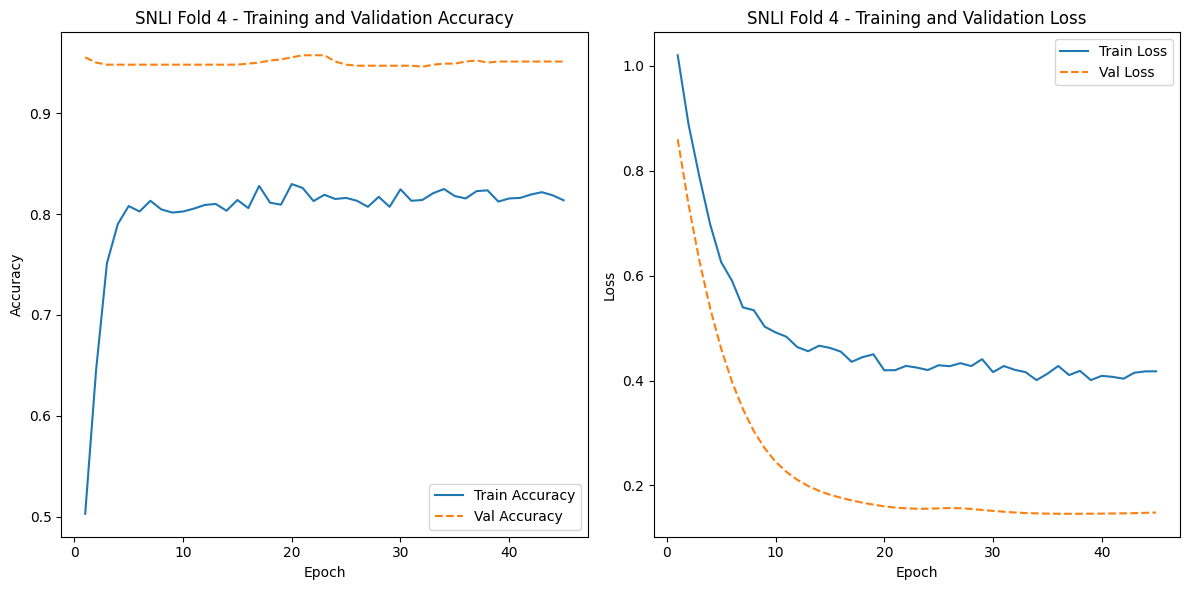

Epoch 1/100, Train Loss: 1.2061, Val Loss: 0.9796, Val Accuracy: 0.4891
Epoch 2/100, Train Loss: 1.0289, Val Loss: 0.8219, Val Accuracy: 0.9544
Epoch 3/100, Train Loss: 0.8633, Val Loss: 0.6900, Val Accuracy: 0.9544
Epoch 4/100, Train Loss: 0.7505, Val Loss: 0.5799, Val Accuracy: 0.9544
Epoch 5/100, Train Loss: 0.6734, Val Loss: 0.4901, Val Accuracy: 0.9544
Epoch 6/100, Train Loss: 0.6166, Val Loss: 0.4184, Val Accuracy: 0.9544
Epoch 7/100, Train Loss: 0.5711, Val Loss: 0.3618, Val Accuracy: 0.9544
Epoch 8/100, Train Loss: 0.5461, Val Loss: 0.3170, Val Accuracy: 0.9544
Epoch 9/100, Train Loss: 0.5218, Val Loss: 0.2820, Val Accuracy: 0.9544
Epoch 10/100, Train Loss: 0.5134, Val Loss: 0.2548, Val Accuracy: 0.9544
Epoch 11/100, Train Loss: 0.5015, Val Loss: 0.2340, Val Accuracy: 0.9544
Epoch 12/100, Train Loss: 0.4855, Val Loss: 0.2177, Val Accuracy: 0.9544
Epoch 13/100, Train Loss: 0.4788, Val Loss: 0.2051, Val Accuracy: 0.9544
Epoch 14/100, Train Loss: 0.4697, Val Loss: 0.1952, Val Accu

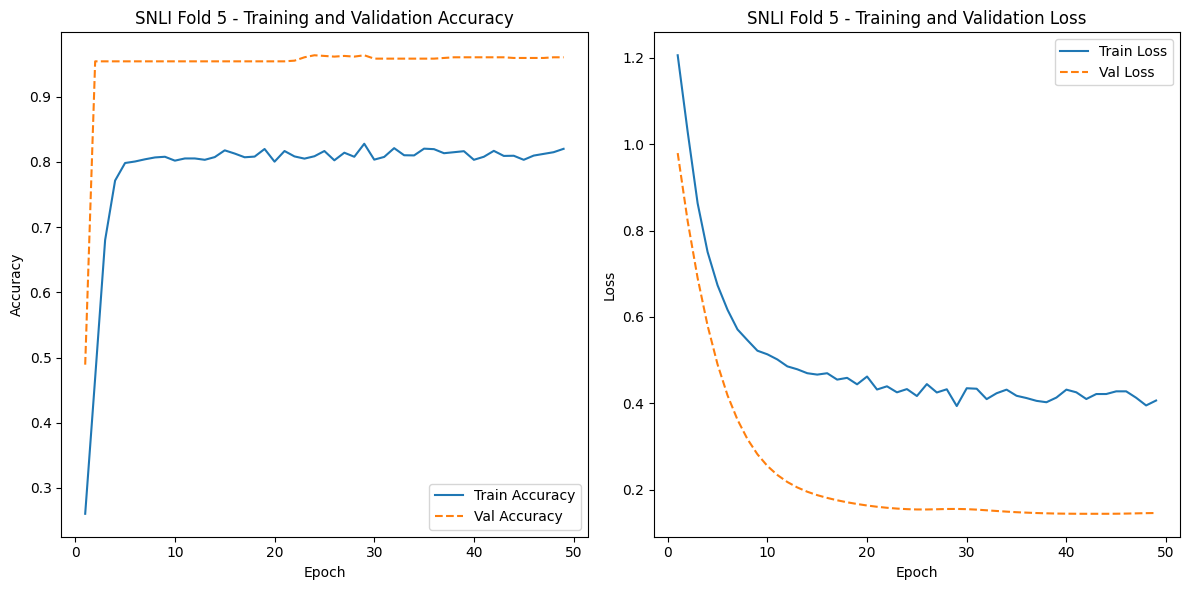

Average Validation Loss for SNLI across 5 folds: 0.1339
Average Validation Accuracy for SNLI across 5 folds: 0.9627


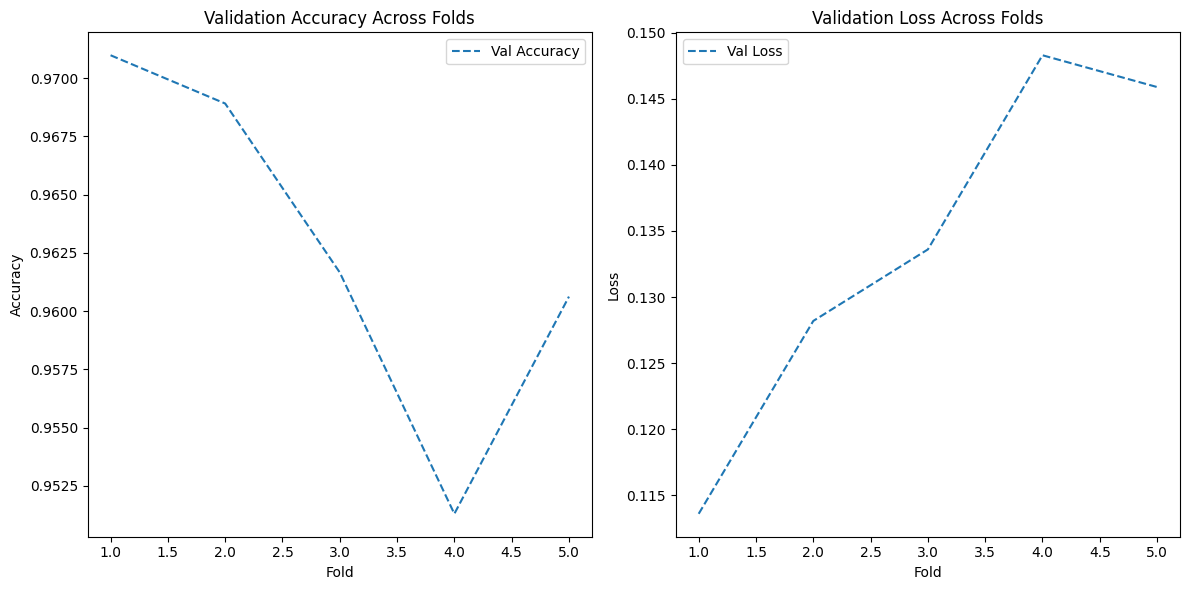

In [48]:
task_name = 'SNLI'
X_train = X_train_snli
y_train = y_train_snli
avg_val_loss_snli, avg_val_accuracy_snli = cross_validate_egat(task_name, X_train, y_train)


Epoch 1/100, Train Loss: 0.9964, Val Loss: 0.8036, Val Accuracy: 0.9691
Epoch 2/100, Train Loss: 0.8617, Val Loss: 0.6771, Val Accuracy: 0.9691
Epoch 3/100, Train Loss: 0.7685, Val Loss: 0.5688, Val Accuracy: 0.9691
Epoch 4/100, Train Loss: 0.6759, Val Loss: 0.4783, Val Accuracy: 0.9691
Epoch 5/100, Train Loss: 0.6289, Val Loss: 0.4047, Val Accuracy: 0.9691
Epoch 6/100, Train Loss: 0.5732, Val Loss: 0.3458, Val Accuracy: 0.9691
Epoch 7/100, Train Loss: 0.5379, Val Loss: 0.2987, Val Accuracy: 0.9691
Epoch 8/100, Train Loss: 0.5148, Val Loss: 0.2613, Val Accuracy: 0.9701
Epoch 9/100, Train Loss: 0.4897, Val Loss: 0.2318, Val Accuracy: 0.9712
Epoch 10/100, Train Loss: 0.4905, Val Loss: 0.2087, Val Accuracy: 0.9712
Epoch 11/100, Train Loss: 0.4783, Val Loss: 0.1906, Val Accuracy: 0.9712
Epoch 12/100, Train Loss: 0.4721, Val Loss: 0.1767, Val Accuracy: 0.9712
Epoch 13/100, Train Loss: 0.4789, Val Loss: 0.1661, Val Accuracy: 0.9712
Epoch 14/100, Train Loss: 0.4812, Val Loss: 0.1580, Val Accu

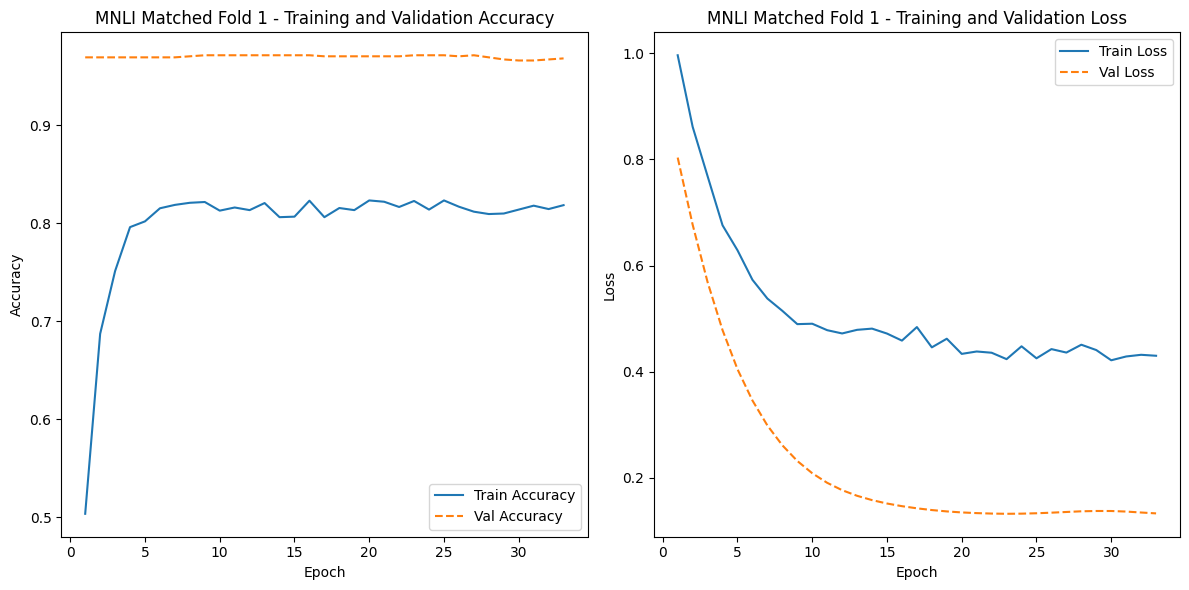

Epoch 1/100, Train Loss: 1.2750, Val Loss: 1.0505, Val Accuracy: 0.5176
Epoch 2/100, Train Loss: 1.0786, Val Loss: 0.8878, Val Accuracy: 0.9626
Epoch 3/100, Train Loss: 0.9194, Val Loss: 0.7497, Val Accuracy: 0.9626
Epoch 4/100, Train Loss: 0.7978, Val Loss: 0.6332, Val Accuracy: 0.9626
Epoch 5/100, Train Loss: 0.7052, Val Loss: 0.5367, Val Accuracy: 0.9626
Epoch 6/100, Train Loss: 0.6388, Val Loss: 0.4582, Val Accuracy: 0.9626
Epoch 7/100, Train Loss: 0.5922, Val Loss: 0.3945, Val Accuracy: 0.9626
Epoch 8/100, Train Loss: 0.5600, Val Loss: 0.3443, Val Accuracy: 0.9626
Epoch 9/100, Train Loss: 0.5287, Val Loss: 0.3050, Val Accuracy: 0.9626
Epoch 10/100, Train Loss: 0.5065, Val Loss: 0.2745, Val Accuracy: 0.9626
Epoch 11/100, Train Loss: 0.5057, Val Loss: 0.2509, Val Accuracy: 0.9626
Epoch 12/100, Train Loss: 0.5027, Val Loss: 0.2326, Val Accuracy: 0.9626
Epoch 13/100, Train Loss: 0.4855, Val Loss: 0.2183, Val Accuracy: 0.9626
Epoch 14/100, Train Loss: 0.4943, Val Loss: 0.2072, Val Accu

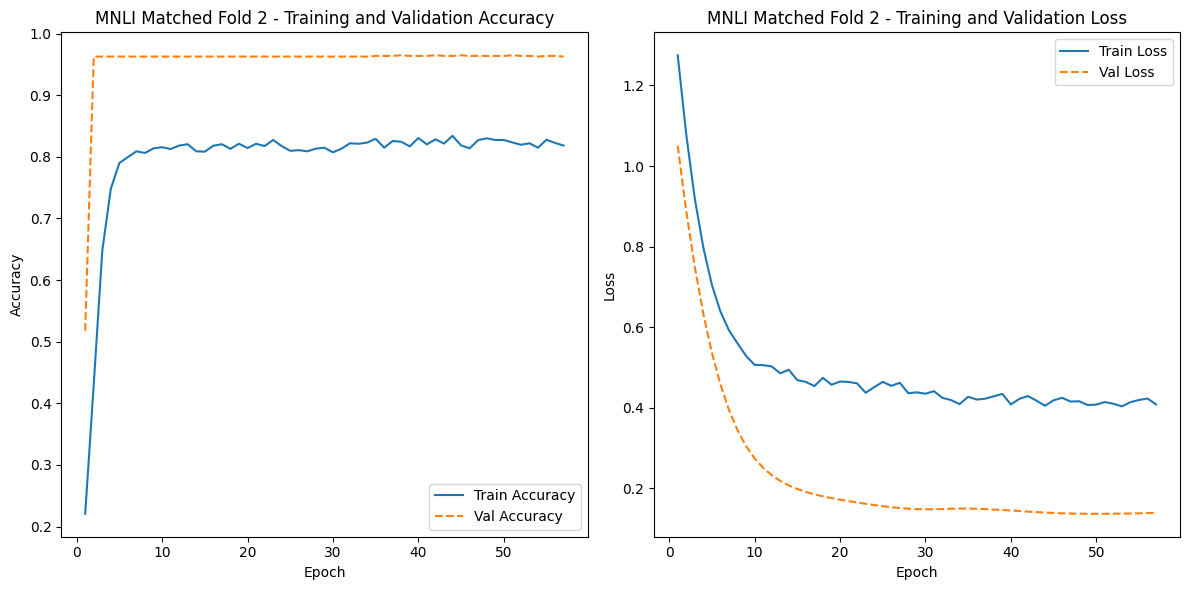

Epoch 1/100, Train Loss: 1.1857, Val Loss: 0.9766, Val Accuracy: 0.9680
Epoch 2/100, Train Loss: 1.0065, Val Loss: 0.8205, Val Accuracy: 0.9733
Epoch 3/100, Train Loss: 0.8695, Val Loss: 0.6885, Val Accuracy: 0.9723
Epoch 4/100, Train Loss: 0.7599, Val Loss: 0.5778, Val Accuracy: 0.9723
Epoch 5/100, Train Loss: 0.6880, Val Loss: 0.4851, Val Accuracy: 0.9723
Epoch 6/100, Train Loss: 0.6160, Val Loss: 0.4094, Val Accuracy: 0.9723
Epoch 7/100, Train Loss: 0.5702, Val Loss: 0.3485, Val Accuracy: 0.9723
Epoch 8/100, Train Loss: 0.5386, Val Loss: 0.2998, Val Accuracy: 0.9723
Epoch 9/100, Train Loss: 0.5111, Val Loss: 0.2614, Val Accuracy: 0.9723
Epoch 10/100, Train Loss: 0.4891, Val Loss: 0.2313, Val Accuracy: 0.9723
Epoch 11/100, Train Loss: 0.4945, Val Loss: 0.2080, Val Accuracy: 0.9723
Epoch 12/100, Train Loss: 0.4790, Val Loss: 0.1898, Val Accuracy: 0.9723
Epoch 13/100, Train Loss: 0.4901, Val Loss: 0.1756, Val Accuracy: 0.9723
Epoch 14/100, Train Loss: 0.4732, Val Loss: 0.1646, Val Accu

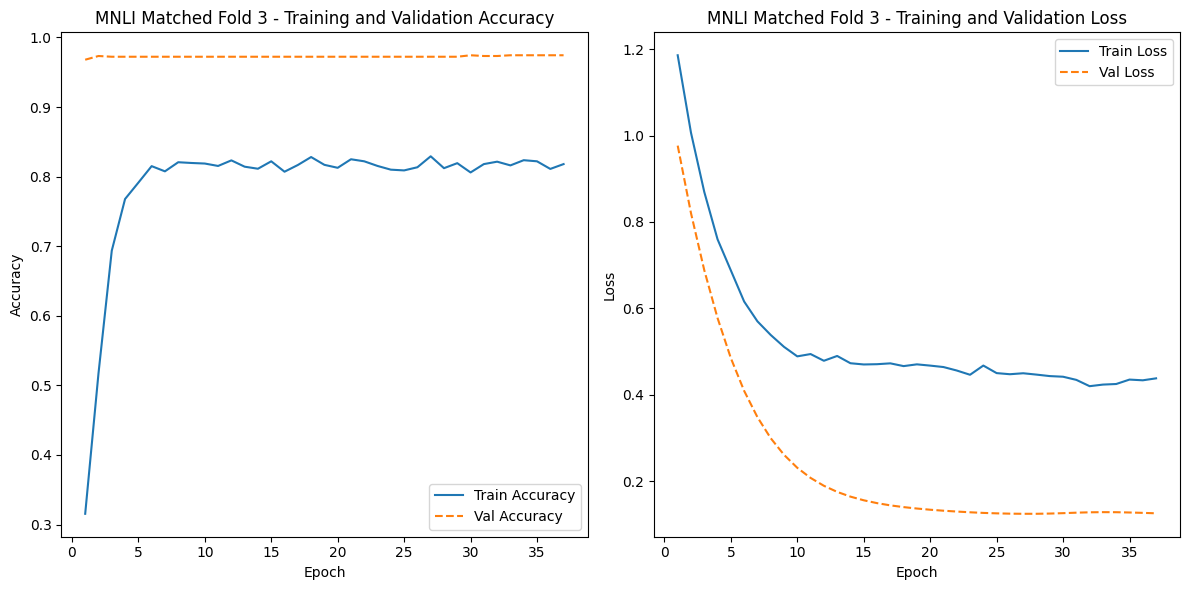

Epoch 1/100, Train Loss: 1.1975, Val Loss: 0.9601, Val Accuracy: 0.4867
Epoch 2/100, Train Loss: 0.9987, Val Loss: 0.7894, Val Accuracy: 0.9552
Epoch 3/100, Train Loss: 0.8491, Val Loss: 0.6490, Val Accuracy: 0.9562
Epoch 4/100, Train Loss: 0.7156, Val Loss: 0.5370, Val Accuracy: 0.9573
Epoch 5/100, Train Loss: 0.6388, Val Loss: 0.4482, Val Accuracy: 0.9573
Epoch 6/100, Train Loss: 0.5707, Val Loss: 0.3796, Val Accuracy: 0.9573
Epoch 7/100, Train Loss: 0.5452, Val Loss: 0.3278, Val Accuracy: 0.9573
Epoch 8/100, Train Loss: 0.4973, Val Loss: 0.2892, Val Accuracy: 0.9573
Epoch 9/100, Train Loss: 0.4803, Val Loss: 0.2612, Val Accuracy: 0.9573
Epoch 10/100, Train Loss: 0.4635, Val Loss: 0.2410, Val Accuracy: 0.9573
Epoch 11/100, Train Loss: 0.4654, Val Loss: 0.2265, Val Accuracy: 0.9573
Epoch 12/100, Train Loss: 0.4573, Val Loss: 0.2164, Val Accuracy: 0.9573
Epoch 13/100, Train Loss: 0.4684, Val Loss: 0.2093, Val Accuracy: 0.9573
Epoch 14/100, Train Loss: 0.4418, Val Loss: 0.2043, Val Accu

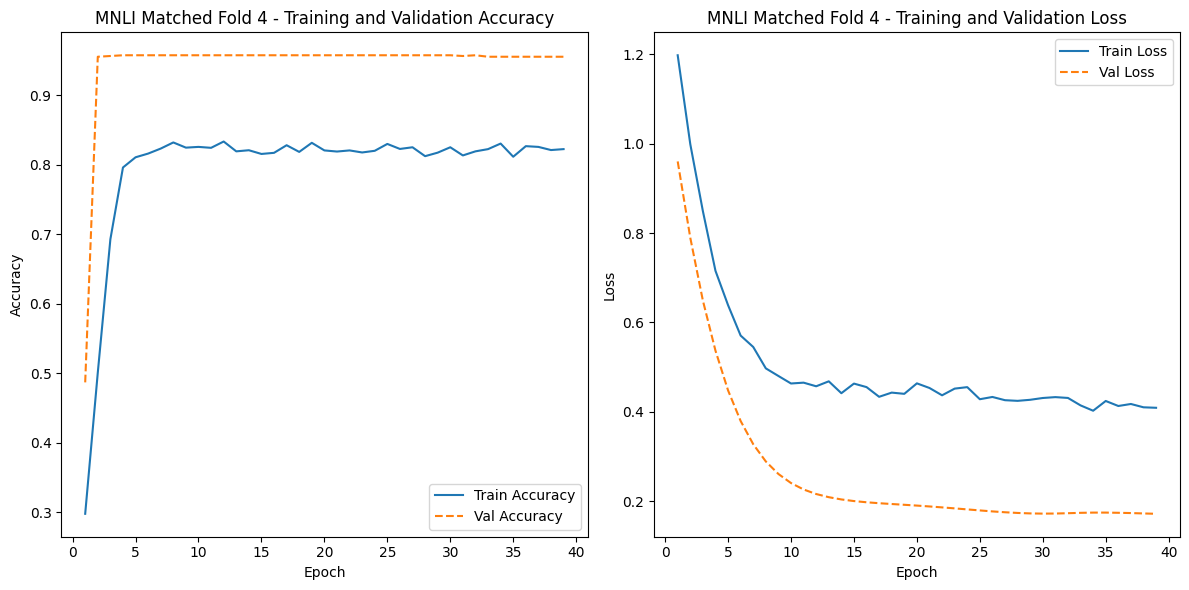

Epoch 1/100, Train Loss: 1.0412, Val Loss: 0.8626, Val Accuracy: 0.9647
Epoch 2/100, Train Loss: 0.9070, Val Loss: 0.7296, Val Accuracy: 0.9679
Epoch 3/100, Train Loss: 0.7948, Val Loss: 0.6145, Val Accuracy: 0.9679
Epoch 4/100, Train Loss: 0.6966, Val Loss: 0.5162, Val Accuracy: 0.9669
Epoch 5/100, Train Loss: 0.6308, Val Loss: 0.4353, Val Accuracy: 0.9690
Epoch 6/100, Train Loss: 0.5679, Val Loss: 0.3691, Val Accuracy: 0.9690
Epoch 7/100, Train Loss: 0.5594, Val Loss: 0.3158, Val Accuracy: 0.9690
Epoch 8/100, Train Loss: 0.5346, Val Loss: 0.2731, Val Accuracy: 0.9690
Epoch 9/100, Train Loss: 0.5053, Val Loss: 0.2393, Val Accuracy: 0.9690
Epoch 10/100, Train Loss: 0.4774, Val Loss: 0.2132, Val Accuracy: 0.9690
Epoch 11/100, Train Loss: 0.5021, Val Loss: 0.1930, Val Accuracy: 0.9690
Epoch 12/100, Train Loss: 0.4758, Val Loss: 0.1775, Val Accuracy: 0.9690
Epoch 13/100, Train Loss: 0.4584, Val Loss: 0.1654, Val Accuracy: 0.9690
Epoch 14/100, Train Loss: 0.4535, Val Loss: 0.1561, Val Accu

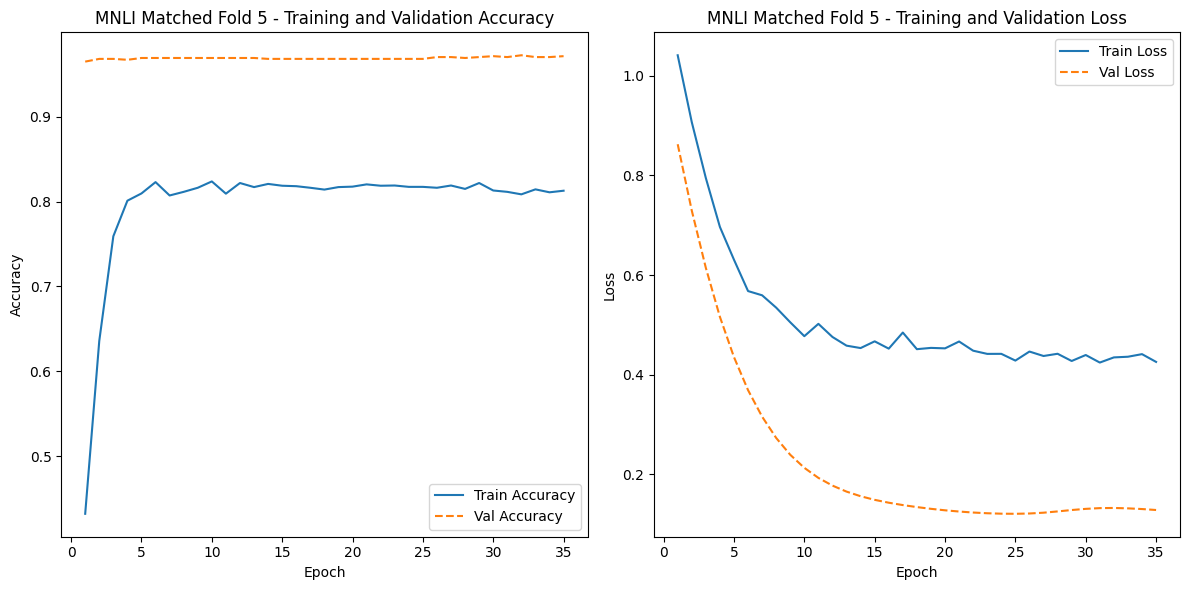

Average Validation Loss for MNLI Matched across 5 folds: 0.1398
Average Validation Accuracy for MNLI Matched across 5 folds: 0.9663


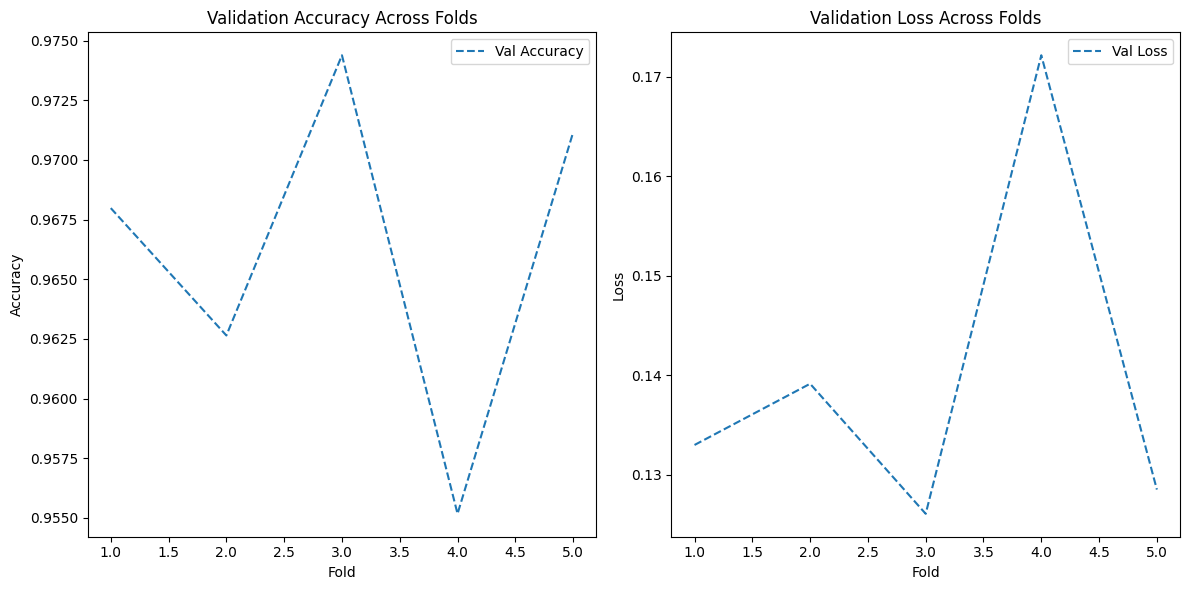

In [49]:
# Task: MNLI Matched
task_name = 'MNLI Matched'
X_train = X_train_mnli_matched
y_train = y_train_mnli_matched
avg_val_loss_mnli_matched, avg_val_accuracy_mnli_matched = cross_validate_egat(task_name, X_train, y_train)


Epoch 1/100, Train Loss: 1.3305, Val Loss: 1.1277, Val Accuracy: 0.0296
Epoch 2/100, Train Loss: 1.1622, Val Loss: 0.9746, Val Accuracy: 0.9345
Epoch 3/100, Train Loss: 1.0048, Val Loss: 0.8406, Val Accuracy: 0.9588
Epoch 4/100, Train Loss: 0.8781, Val Loss: 0.7246, Val Accuracy: 0.9651
Epoch 5/100, Train Loss: 0.7776, Val Loss: 0.6254, Val Accuracy: 0.9651
Epoch 6/100, Train Loss: 0.7023, Val Loss: 0.5393, Val Accuracy: 0.9651
Epoch 7/100, Train Loss: 0.6246, Val Loss: 0.4652, Val Accuracy: 0.9651
Epoch 8/100, Train Loss: 0.5874, Val Loss: 0.4025, Val Accuracy: 0.9651
Epoch 9/100, Train Loss: 0.5467, Val Loss: 0.3506, Val Accuracy: 0.9651
Epoch 10/100, Train Loss: 0.5242, Val Loss: 0.3083, Val Accuracy: 0.9651
Epoch 11/100, Train Loss: 0.4944, Val Loss: 0.2741, Val Accuracy: 0.9651
Epoch 12/100, Train Loss: 0.4845, Val Loss: 0.2471, Val Accuracy: 0.9651
Epoch 13/100, Train Loss: 0.4884, Val Loss: 0.2258, Val Accuracy: 0.9651
Epoch 14/100, Train Loss: 0.4757, Val Loss: 0.2092, Val Accu

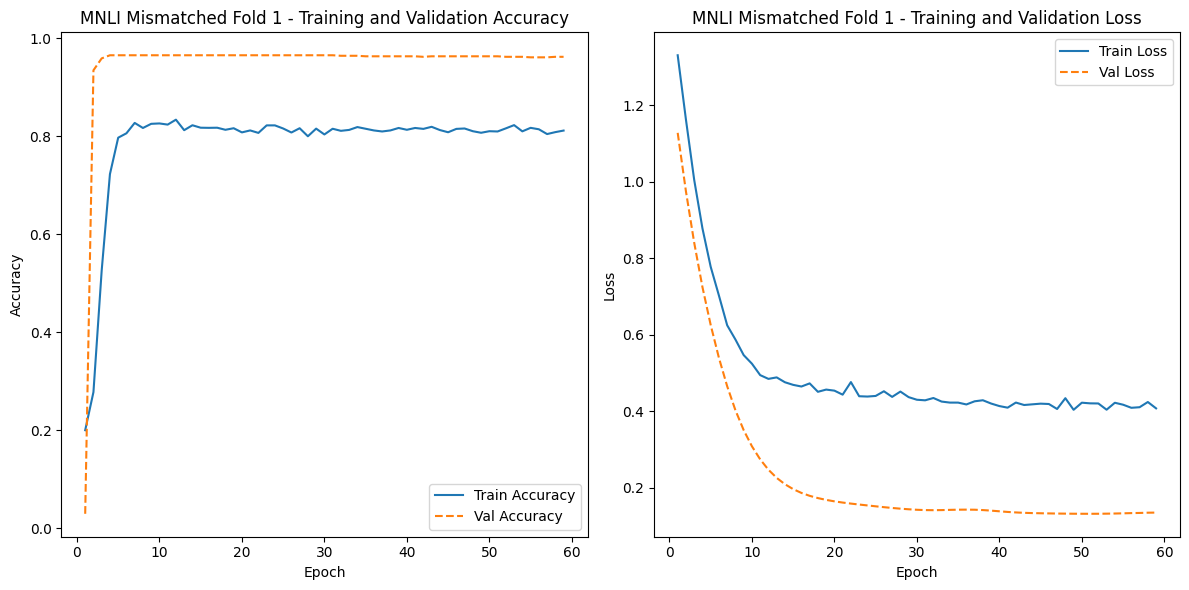

Epoch 1/100, Train Loss: 1.1018, Val Loss: 0.9165, Val Accuracy: 0.4820
Epoch 2/100, Train Loss: 0.9460, Val Loss: 0.7692, Val Accuracy: 0.9683
Epoch 3/100, Train Loss: 0.8105, Val Loss: 0.6455, Val Accuracy: 0.9662
Epoch 4/100, Train Loss: 0.7290, Val Loss: 0.5447, Val Accuracy: 0.9662
Epoch 5/100, Train Loss: 0.6537, Val Loss: 0.4609, Val Accuracy: 0.9672
Epoch 6/100, Train Loss: 0.6017, Val Loss: 0.3923, Val Accuracy: 0.9672
Epoch 7/100, Train Loss: 0.5778, Val Loss: 0.3375, Val Accuracy: 0.9672
Epoch 8/100, Train Loss: 0.5458, Val Loss: 0.2938, Val Accuracy: 0.9672
Epoch 9/100, Train Loss: 0.5173, Val Loss: 0.2595, Val Accuracy: 0.9672
Epoch 10/100, Train Loss: 0.5000, Val Loss: 0.2325, Val Accuracy: 0.9672
Epoch 11/100, Train Loss: 0.5029, Val Loss: 0.2114, Val Accuracy: 0.9672
Epoch 12/100, Train Loss: 0.4957, Val Loss: 0.1951, Val Accuracy: 0.9672
Epoch 13/100, Train Loss: 0.4743, Val Loss: 0.1824, Val Accuracy: 0.9683
Epoch 14/100, Train Loss: 0.4755, Val Loss: 0.1723, Val Accu

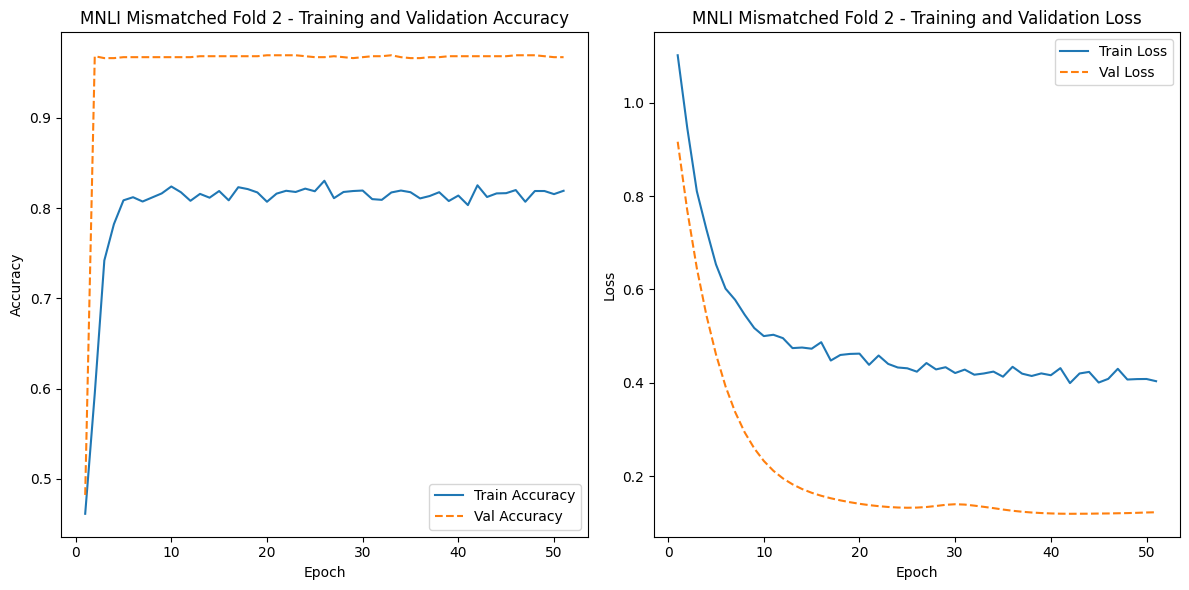

Epoch 1/100, Train Loss: 0.9241, Val Loss: 0.7365, Val Accuracy: 0.9619
Epoch 2/100, Train Loss: 0.7902, Val Loss: 0.6093, Val Accuracy: 0.9609
Epoch 3/100, Train Loss: 0.6896, Val Loss: 0.5052, Val Accuracy: 0.9609
Epoch 4/100, Train Loss: 0.6082, Val Loss: 0.4208, Val Accuracy: 0.9619
Epoch 5/100, Train Loss: 0.5667, Val Loss: 0.3545, Val Accuracy: 0.9619
Epoch 6/100, Train Loss: 0.5274, Val Loss: 0.3034, Val Accuracy: 0.9619
Epoch 7/100, Train Loss: 0.4947, Val Loss: 0.2643, Val Accuracy: 0.9619
Epoch 8/100, Train Loss: 0.5059, Val Loss: 0.2351, Val Accuracy: 0.9619
Epoch 9/100, Train Loss: 0.4625, Val Loss: 0.2136, Val Accuracy: 0.9619
Epoch 10/100, Train Loss: 0.4670, Val Loss: 0.1977, Val Accuracy: 0.9619
Epoch 11/100, Train Loss: 0.4521, Val Loss: 0.1860, Val Accuracy: 0.9619
Epoch 12/100, Train Loss: 0.4689, Val Loss: 0.1773, Val Accuracy: 0.9619
Epoch 13/100, Train Loss: 0.4572, Val Loss: 0.1706, Val Accuracy: 0.9619
Epoch 14/100, Train Loss: 0.4559, Val Loss: 0.1654, Val Accu

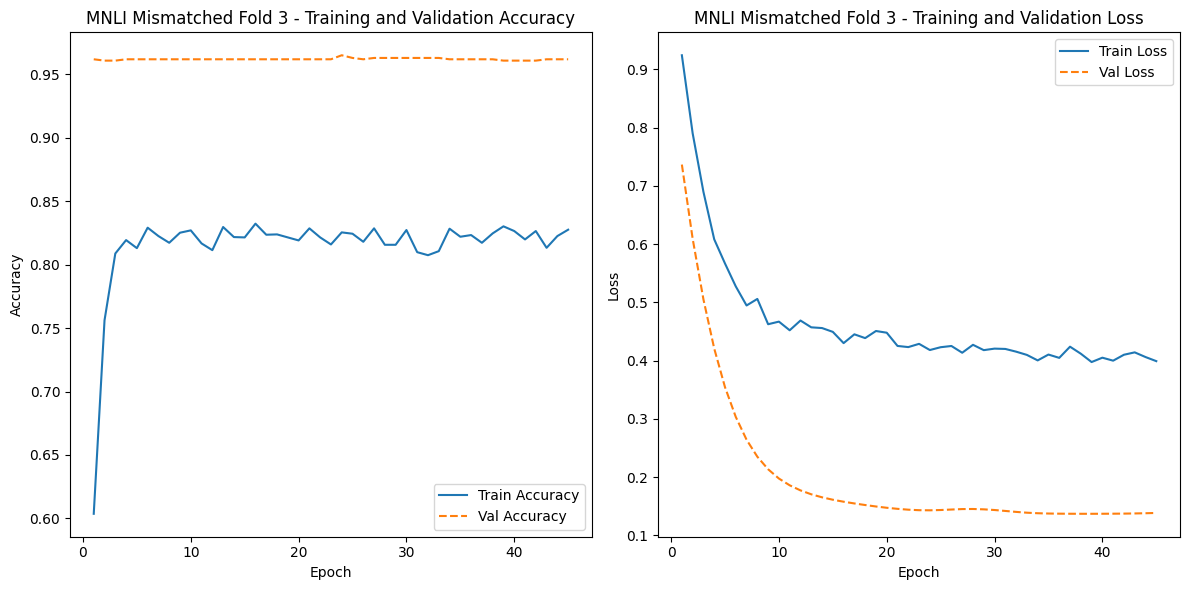

Epoch 1/100, Train Loss: 1.3038, Val Loss: 1.0918, Val Accuracy: 0.0381
Epoch 2/100, Train Loss: 1.1213, Val Loss: 0.9376, Val Accuracy: 0.9651
Epoch 3/100, Train Loss: 0.9666, Val Loss: 0.8008, Val Accuracy: 0.9672
Epoch 4/100, Train Loss: 0.8375, Val Loss: 0.6812, Val Accuracy: 0.9672
Epoch 5/100, Train Loss: 0.7372, Val Loss: 0.5792, Val Accuracy: 0.9672
Epoch 6/100, Train Loss: 0.6685, Val Loss: 0.4930, Val Accuracy: 0.9672
Epoch 7/100, Train Loss: 0.6037, Val Loss: 0.4211, Val Accuracy: 0.9672
Epoch 8/100, Train Loss: 0.5611, Val Loss: 0.3618, Val Accuracy: 0.9672
Epoch 9/100, Train Loss: 0.5304, Val Loss: 0.3138, Val Accuracy: 0.9672
Epoch 10/100, Train Loss: 0.5088, Val Loss: 0.2752, Val Accuracy: 0.9672
Epoch 11/100, Train Loss: 0.4986, Val Loss: 0.2449, Val Accuracy: 0.9672
Epoch 12/100, Train Loss: 0.4949, Val Loss: 0.2214, Val Accuracy: 0.9672
Epoch 13/100, Train Loss: 0.4646, Val Loss: 0.2035, Val Accuracy: 0.9672
Epoch 14/100, Train Loss: 0.4796, Val Loss: 0.1898, Val Accu

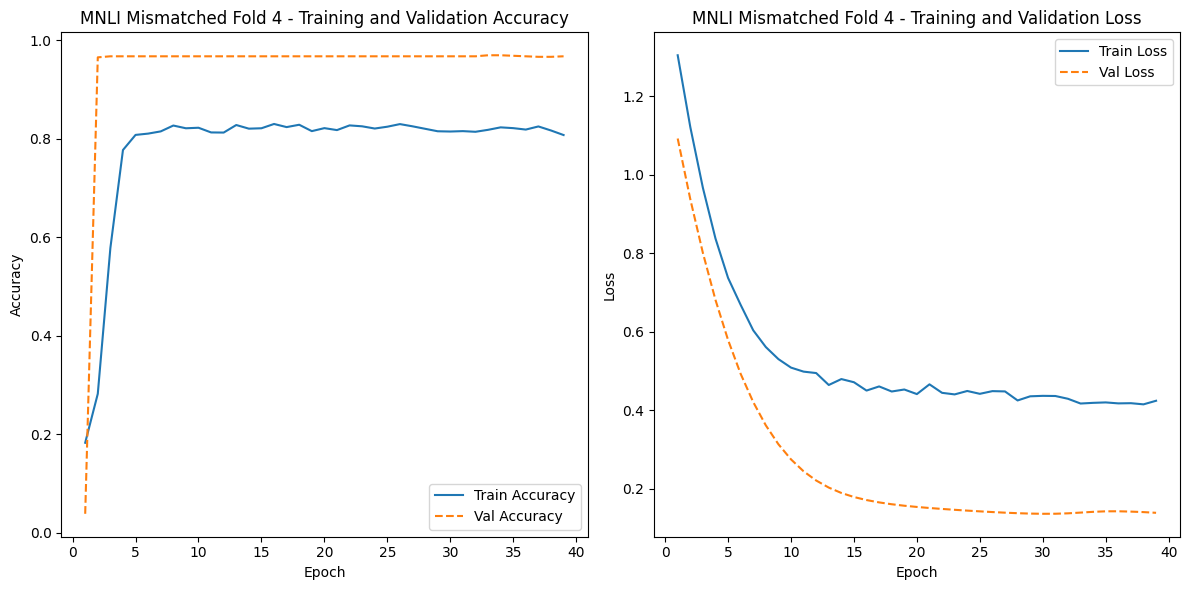

Epoch 1/100, Train Loss: 1.0551, Val Loss: 0.8501, Val Accuracy: 0.9619
Epoch 2/100, Train Loss: 0.8853, Val Loss: 0.7066, Val Accuracy: 0.9661
Epoch 3/100, Train Loss: 0.7662, Val Loss: 0.5911, Val Accuracy: 0.9683
Epoch 4/100, Train Loss: 0.6816, Val Loss: 0.4956, Val Accuracy: 0.9704
Epoch 5/100, Train Loss: 0.6187, Val Loss: 0.4178, Val Accuracy: 0.9704
Epoch 6/100, Train Loss: 0.5733, Val Loss: 0.3548, Val Accuracy: 0.9704
Epoch 7/100, Train Loss: 0.5334, Val Loss: 0.3046, Val Accuracy: 0.9704
Epoch 8/100, Train Loss: 0.5223, Val Loss: 0.2650, Val Accuracy: 0.9704
Epoch 9/100, Train Loss: 0.4990, Val Loss: 0.2338, Val Accuracy: 0.9704
Epoch 10/100, Train Loss: 0.4896, Val Loss: 0.2096, Val Accuracy: 0.9704
Epoch 11/100, Train Loss: 0.5047, Val Loss: 0.1911, Val Accuracy: 0.9704
Epoch 12/100, Train Loss: 0.4749, Val Loss: 0.1768, Val Accuracy: 0.9704
Epoch 13/100, Train Loss: 0.4812, Val Loss: 0.1659, Val Accuracy: 0.9704
Epoch 14/100, Train Loss: 0.4713, Val Loss: 0.1573, Val Accu

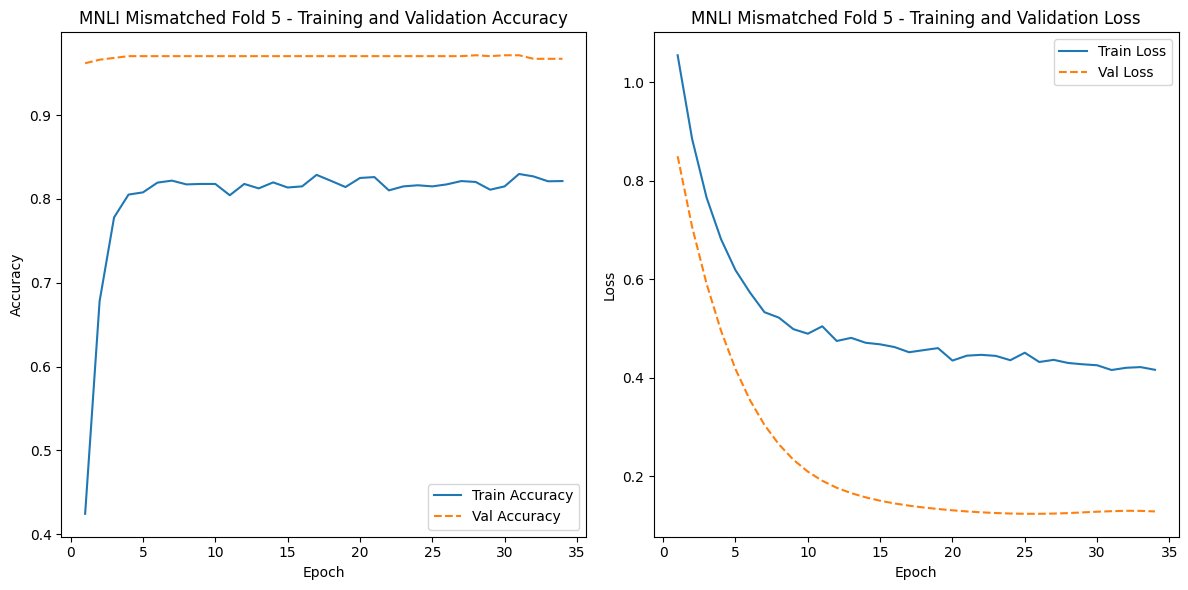

Average Validation Loss for MNLI Mismatched across 5 folds: 0.1328
Average Validation Accuracy for MNLI Mismatched across 5 folds: 0.9651


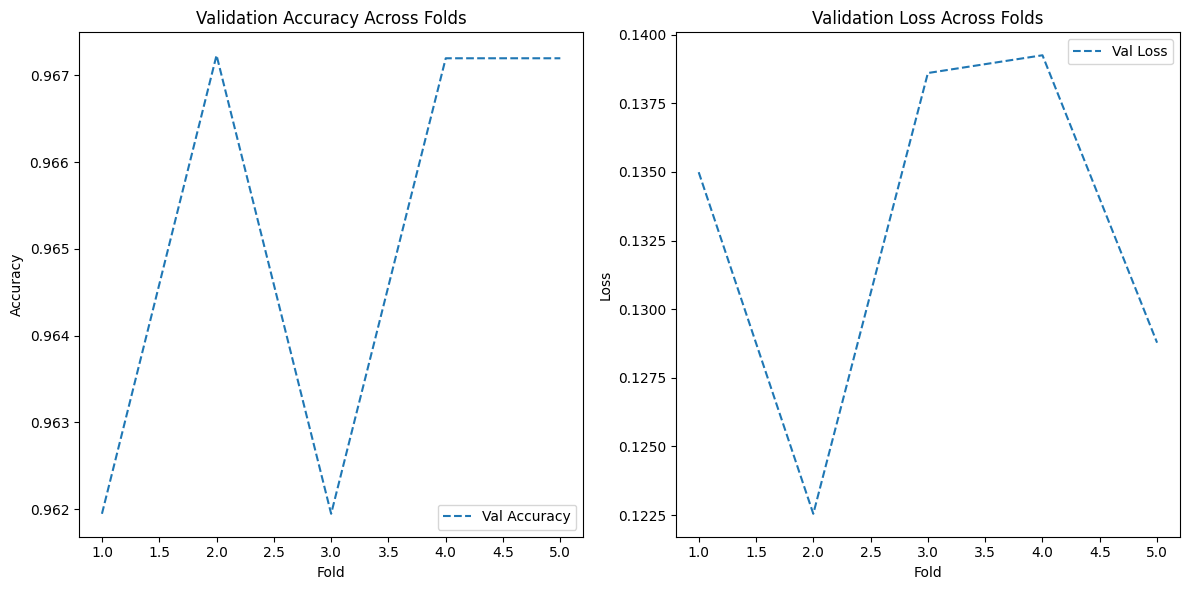

In [50]:
# Task: MNLI Mismatched
task_name = 'MNLI Mismatched'
X_train = X_train_mnli_mismatched
y_train = y_train_mnli_mismatched
avg_val_loss_mnli_mismatched, avg_val_accuracy_mnli_mismatched = cross_validate_egat(task_name, X_train, y_train)



Epoch 1/100, Train Loss: 1.0923, Val Loss: 0.9638, Val Accuracy: 0.6471
Epoch 2/100, Train Loss: 1.0148, Val Loss: 0.8868, Val Accuracy: 0.6912
Epoch 3/100, Train Loss: 0.9526, Val Loss: 0.8219, Val Accuracy: 0.7794
Epoch 4/100, Train Loss: 0.9072, Val Loss: 0.7661, Val Accuracy: 0.8235
Epoch 5/100, Train Loss: 0.8990, Val Loss: 0.7179, Val Accuracy: 0.8088
Epoch 6/100, Train Loss: 0.8545, Val Loss: 0.6774, Val Accuracy: 0.7794
Epoch 7/100, Train Loss: 0.8175, Val Loss: 0.6424, Val Accuracy: 0.7794
Epoch 8/100, Train Loss: 0.8370, Val Loss: 0.6120, Val Accuracy: 0.7647
Epoch 9/100, Train Loss: 0.8021, Val Loss: 0.5865, Val Accuracy: 0.7794
Epoch 10/100, Train Loss: 0.7707, Val Loss: 0.5650, Val Accuracy: 0.7941
Epoch 11/100, Train Loss: 0.7999, Val Loss: 0.5472, Val Accuracy: 0.7941
Epoch 12/100, Train Loss: 0.7584, Val Loss: 0.5319, Val Accuracy: 0.7941
Epoch 13/100, Train Loss: 0.7628, Val Loss: 0.5189, Val Accuracy: 0.7941
Epoch 14/100, Train Loss: 0.7419, Val Loss: 0.5078, Val Accu

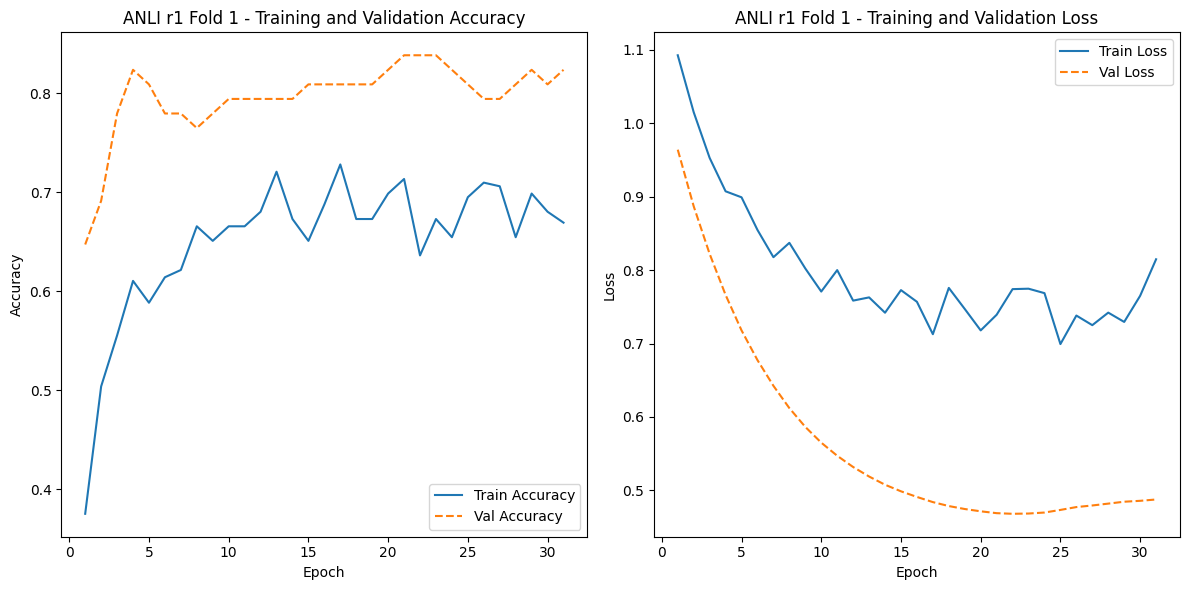

Epoch 1/100, Train Loss: 1.0930, Val Loss: 0.9495, Val Accuracy: 0.8529
Epoch 2/100, Train Loss: 0.9914, Val Loss: 0.8734, Val Accuracy: 0.8824
Epoch 3/100, Train Loss: 0.9508, Val Loss: 0.8080, Val Accuracy: 0.8235
Epoch 4/100, Train Loss: 0.9189, Val Loss: 0.7516, Val Accuracy: 0.8382
Epoch 5/100, Train Loss: 0.8587, Val Loss: 0.7035, Val Accuracy: 0.8235
Epoch 6/100, Train Loss: 0.8427, Val Loss: 0.6624, Val Accuracy: 0.8382
Epoch 7/100, Train Loss: 0.8667, Val Loss: 0.6280, Val Accuracy: 0.8235
Epoch 8/100, Train Loss: 0.8103, Val Loss: 0.5972, Val Accuracy: 0.8235
Epoch 9/100, Train Loss: 0.8139, Val Loss: 0.5714, Val Accuracy: 0.8235
Epoch 10/100, Train Loss: 0.8264, Val Loss: 0.5504, Val Accuracy: 0.8235
Epoch 11/100, Train Loss: 0.7364, Val Loss: 0.5322, Val Accuracy: 0.8676
Epoch 12/100, Train Loss: 0.7278, Val Loss: 0.5159, Val Accuracy: 0.8676
Epoch 13/100, Train Loss: 0.7466, Val Loss: 0.5020, Val Accuracy: 0.8971
Epoch 14/100, Train Loss: 0.7732, Val Loss: 0.4904, Val Accu

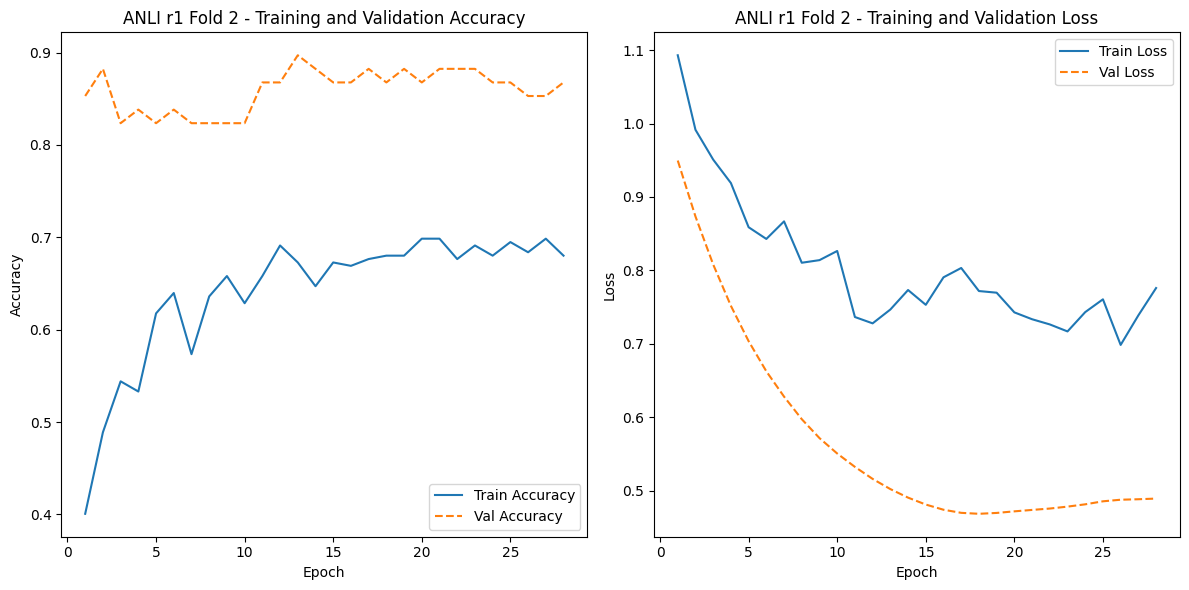

Epoch 1/100, Train Loss: 1.1170, Val Loss: 1.0285, Val Accuracy: 0.6324
Epoch 2/100, Train Loss: 1.0157, Val Loss: 0.9608, Val Accuracy: 0.6324
Epoch 3/100, Train Loss: 0.9643, Val Loss: 0.9022, Val Accuracy: 0.6324
Epoch 4/100, Train Loss: 0.9365, Val Loss: 0.8515, Val Accuracy: 0.6324
Epoch 5/100, Train Loss: 0.8668, Val Loss: 0.8078, Val Accuracy: 0.6912
Epoch 6/100, Train Loss: 0.8673, Val Loss: 0.7702, Val Accuracy: 0.7059
Epoch 7/100, Train Loss: 0.8002, Val Loss: 0.7380, Val Accuracy: 0.7206
Epoch 8/100, Train Loss: 0.8031, Val Loss: 0.7114, Val Accuracy: 0.7206
Epoch 9/100, Train Loss: 0.7890, Val Loss: 0.6894, Val Accuracy: 0.7206
Epoch 10/100, Train Loss: 0.7781, Val Loss: 0.6712, Val Accuracy: 0.7206
Epoch 11/100, Train Loss: 0.7171, Val Loss: 0.6560, Val Accuracy: 0.7206
Epoch 12/100, Train Loss: 0.7173, Val Loss: 0.6436, Val Accuracy: 0.7353
Epoch 13/100, Train Loss: 0.7539, Val Loss: 0.6337, Val Accuracy: 0.7647
Epoch 14/100, Train Loss: 0.7203, Val Loss: 0.6253, Val Accu

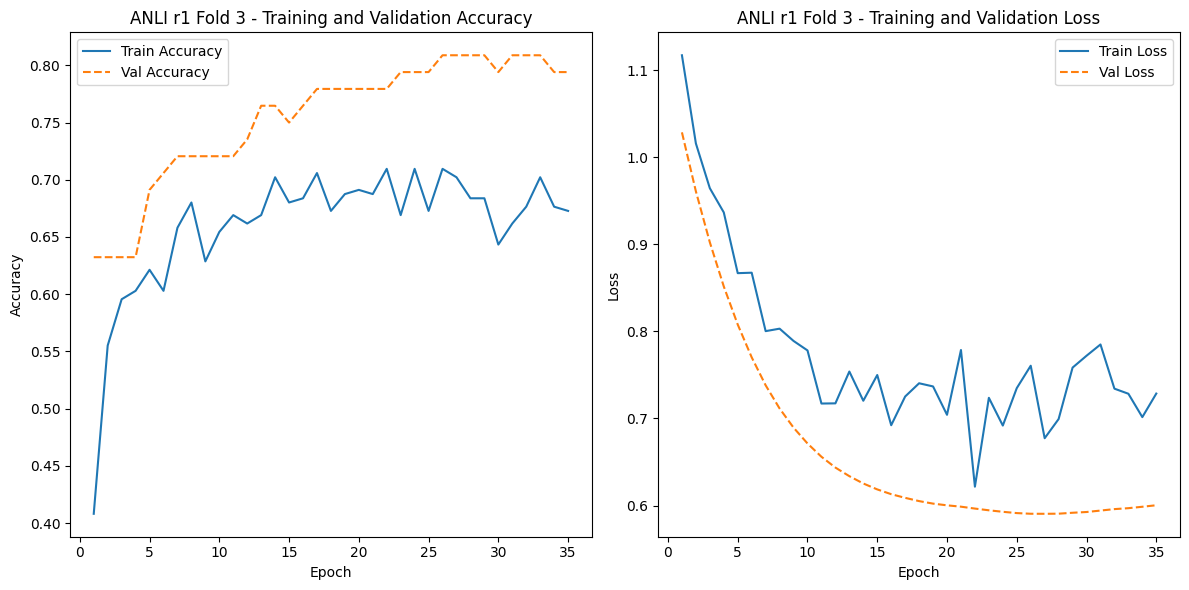

Epoch 1/100, Train Loss: 1.1341, Val Loss: 1.0151, Val Accuracy: 0.5735
Epoch 2/100, Train Loss: 1.0360, Val Loss: 0.9288, Val Accuracy: 0.7794
Epoch 3/100, Train Loss: 0.9596, Val Loss: 0.8599, Val Accuracy: 0.7794
Epoch 4/100, Train Loss: 0.8948, Val Loss: 0.8018, Val Accuracy: 0.7794
Epoch 5/100, Train Loss: 0.8627, Val Loss: 0.7552, Val Accuracy: 0.7794
Epoch 6/100, Train Loss: 0.8432, Val Loss: 0.7190, Val Accuracy: 0.7794
Epoch 7/100, Train Loss: 0.8282, Val Loss: 0.6904, Val Accuracy: 0.7794
Epoch 8/100, Train Loss: 0.7965, Val Loss: 0.6685, Val Accuracy: 0.7794
Epoch 9/100, Train Loss: 0.7752, Val Loss: 0.6528, Val Accuracy: 0.7794
Epoch 10/100, Train Loss: 0.7235, Val Loss: 0.6417, Val Accuracy: 0.7941
Epoch 11/100, Train Loss: 0.7263, Val Loss: 0.6359, Val Accuracy: 0.7941
Epoch 12/100, Train Loss: 0.7808, Val Loss: 0.6335, Val Accuracy: 0.7794
Epoch 13/100, Train Loss: 0.7408, Val Loss: 0.6327, Val Accuracy: 0.7941
Epoch 14/100, Train Loss: 0.7284, Val Loss: 0.6324, Val Accu

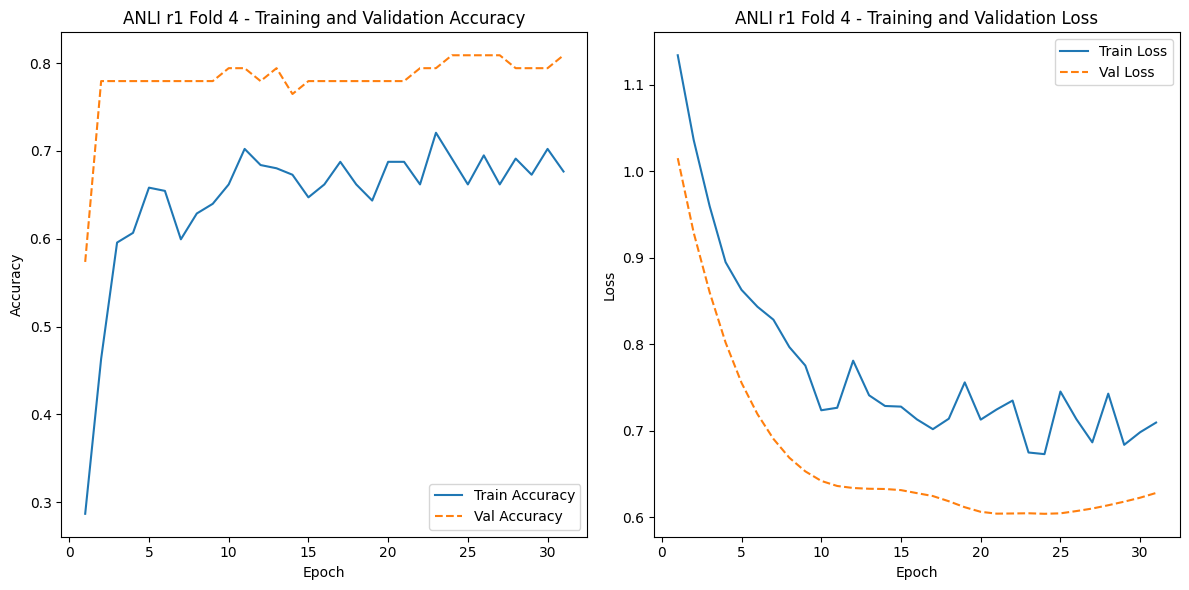

Epoch 1/100, Train Loss: 1.2361, Val Loss: 1.1065, Val Accuracy: 0.4412
Epoch 2/100, Train Loss: 1.1541, Val Loss: 1.0470, Val Accuracy: 0.4265
Epoch 3/100, Train Loss: 1.0678, Val Loss: 0.9966, Val Accuracy: 0.6618
Epoch 4/100, Train Loss: 0.9773, Val Loss: 0.9539, Val Accuracy: 0.6618
Epoch 5/100, Train Loss: 0.9465, Val Loss: 0.9168, Val Accuracy: 0.6618
Epoch 6/100, Train Loss: 0.8976, Val Loss: 0.8837, Val Accuracy: 0.6618
Epoch 7/100, Train Loss: 0.8637, Val Loss: 0.8541, Val Accuracy: 0.6765
Epoch 8/100, Train Loss: 0.8081, Val Loss: 0.8280, Val Accuracy: 0.6765
Epoch 9/100, Train Loss: 0.7913, Val Loss: 0.8051, Val Accuracy: 0.6765
Epoch 10/100, Train Loss: 0.7570, Val Loss: 0.7849, Val Accuracy: 0.6618
Epoch 11/100, Train Loss: 0.7381, Val Loss: 0.7670, Val Accuracy: 0.6618
Epoch 12/100, Train Loss: 0.7140, Val Loss: 0.7519, Val Accuracy: 0.6912
Epoch 13/100, Train Loss: 0.7785, Val Loss: 0.7391, Val Accuracy: 0.7059
Epoch 14/100, Train Loss: 0.7413, Val Loss: 0.7289, Val Accu

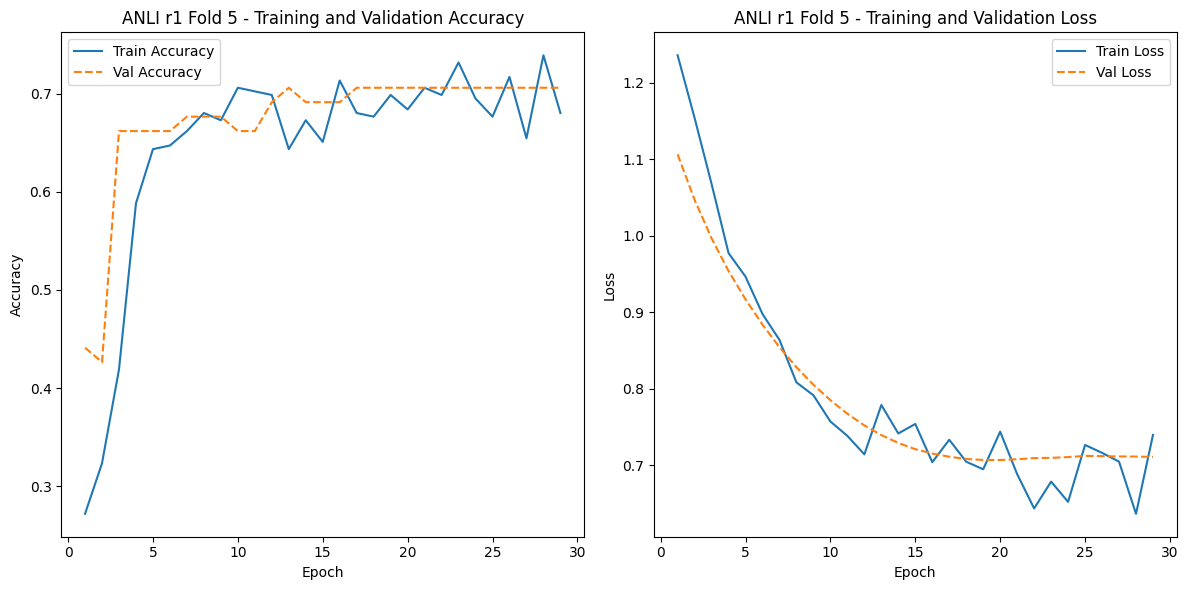

Average Validation Loss for ANLI r1 across 5 folds: 0.5831
Average Validation Accuracy for ANLI r1 across 5 folds: 0.8000


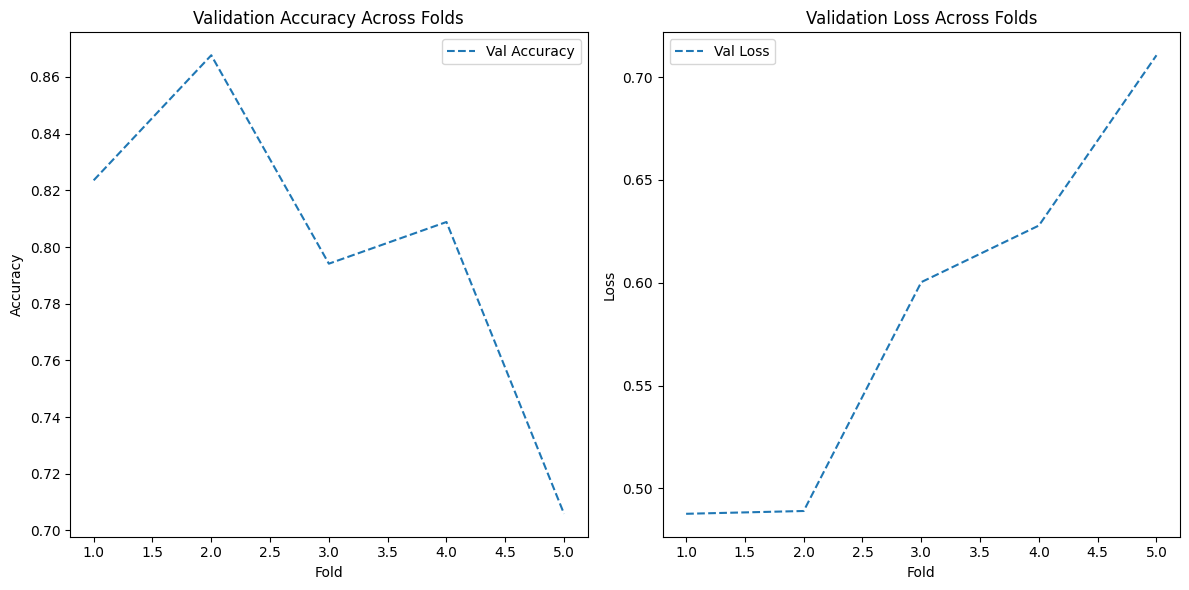

In [51]:
# Task: ANLI r1
task_name = 'ANLI r1'
X_train = X_train_anli_r1
y_train = y_train_anli_r1
avg_val_loss_anli_r1, avg_val_accuracy_anli_r1 = cross_validate_egat(task_name, X_train, y_train)



Epoch 1/100, Train Loss: 1.2233, Val Loss: 1.1010, Val Accuracy: 0.2778
Epoch 2/100, Train Loss: 1.0920, Val Loss: 1.0295, Val Accuracy: 0.5833
Epoch 3/100, Train Loss: 1.0586, Val Loss: 0.9717, Val Accuracy: 0.6806
Epoch 4/100, Train Loss: 1.0023, Val Loss: 0.9242, Val Accuracy: 0.6806
Epoch 5/100, Train Loss: 0.9558, Val Loss: 0.8851, Val Accuracy: 0.6806
Epoch 6/100, Train Loss: 0.9571, Val Loss: 0.8516, Val Accuracy: 0.6806
Epoch 7/100, Train Loss: 0.8935, Val Loss: 0.8221, Val Accuracy: 0.6806
Epoch 8/100, Train Loss: 0.9289, Val Loss: 0.7959, Val Accuracy: 0.6944
Epoch 9/100, Train Loss: 0.8804, Val Loss: 0.7728, Val Accuracy: 0.6944
Epoch 10/100, Train Loss: 0.8626, Val Loss: 0.7529, Val Accuracy: 0.7083
Epoch 11/100, Train Loss: 0.8252, Val Loss: 0.7368, Val Accuracy: 0.7222
Epoch 12/100, Train Loss: 0.8581, Val Loss: 0.7239, Val Accuracy: 0.7222
Epoch 13/100, Train Loss: 0.8482, Val Loss: 0.7133, Val Accuracy: 0.7361
Epoch 14/100, Train Loss: 0.8375, Val Loss: 0.7048, Val Accu

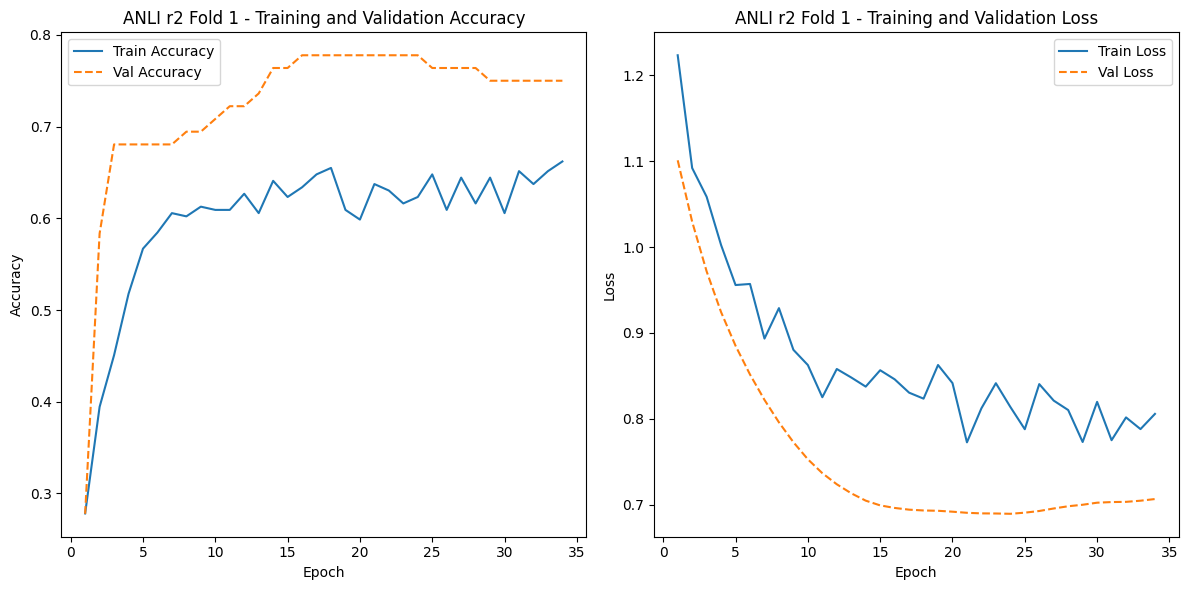

Epoch 1/100, Train Loss: 1.0987, Val Loss: 1.0428, Val Accuracy: 0.5211
Epoch 2/100, Train Loss: 1.0494, Val Loss: 0.9860, Val Accuracy: 0.5915
Epoch 3/100, Train Loss: 0.9846, Val Loss: 0.9419, Val Accuracy: 0.6479
Epoch 4/100, Train Loss: 0.9640, Val Loss: 0.9081, Val Accuracy: 0.6479
Epoch 5/100, Train Loss: 0.9366, Val Loss: 0.8827, Val Accuracy: 0.6761
Epoch 6/100, Train Loss: 0.9160, Val Loss: 0.8632, Val Accuracy: 0.6620
Epoch 7/100, Train Loss: 0.8802, Val Loss: 0.8476, Val Accuracy: 0.6620
Epoch 8/100, Train Loss: 0.8896, Val Loss: 0.8362, Val Accuracy: 0.6761
Epoch 9/100, Train Loss: 0.8335, Val Loss: 0.8273, Val Accuracy: 0.7042
Epoch 10/100, Train Loss: 0.8002, Val Loss: 0.8196, Val Accuracy: 0.7324
Epoch 11/100, Train Loss: 0.8722, Val Loss: 0.8131, Val Accuracy: 0.7324
Epoch 12/100, Train Loss: 0.8387, Val Loss: 0.8075, Val Accuracy: 0.7042
Epoch 13/100, Train Loss: 0.8690, Val Loss: 0.8033, Val Accuracy: 0.7042
Epoch 14/100, Train Loss: 0.8102, Val Loss: 0.8009, Val Accu

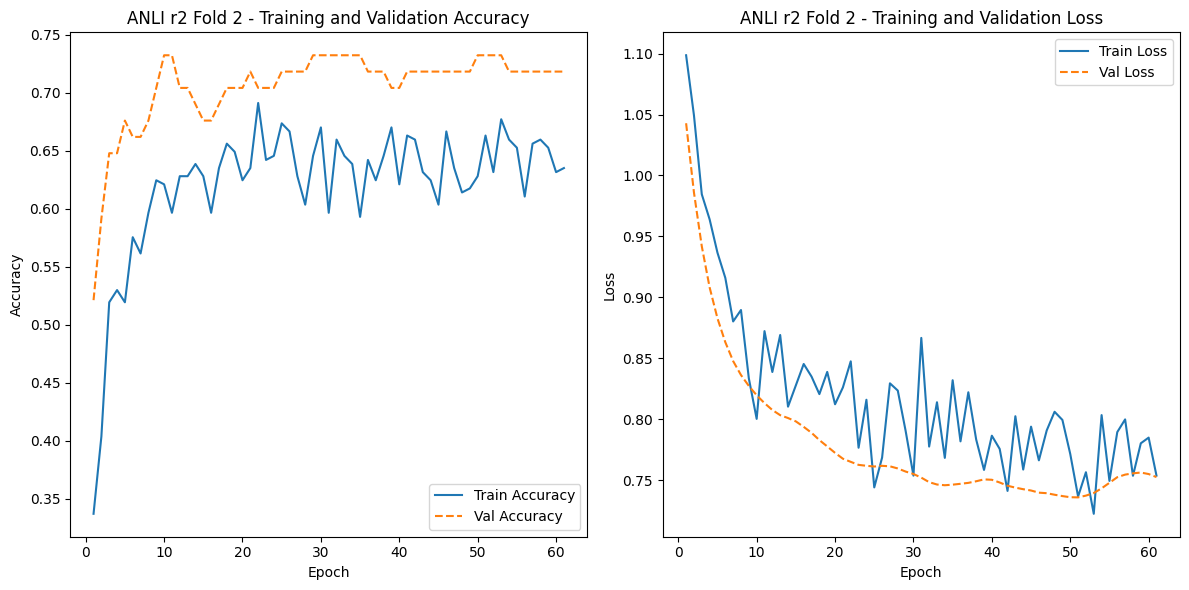

Epoch 1/100, Train Loss: 1.1420, Val Loss: 1.0515, Val Accuracy: 0.4648
Epoch 2/100, Train Loss: 1.0623, Val Loss: 0.9975, Val Accuracy: 0.6338
Epoch 3/100, Train Loss: 1.0112, Val Loss: 0.9556, Val Accuracy: 0.6338
Epoch 4/100, Train Loss: 0.9640, Val Loss: 0.9193, Val Accuracy: 0.6056
Epoch 5/100, Train Loss: 0.9300, Val Loss: 0.8856, Val Accuracy: 0.6056
Epoch 6/100, Train Loss: 0.8791, Val Loss: 0.8571, Val Accuracy: 0.6197
Epoch 7/100, Train Loss: 0.8782, Val Loss: 0.8330, Val Accuracy: 0.6479
Epoch 8/100, Train Loss: 0.8562, Val Loss: 0.8153, Val Accuracy: 0.6479
Epoch 9/100, Train Loss: 0.8474, Val Loss: 0.7997, Val Accuracy: 0.6620
Epoch 10/100, Train Loss: 0.8524, Val Loss: 0.7891, Val Accuracy: 0.6620
Epoch 11/100, Train Loss: 0.8305, Val Loss: 0.7807, Val Accuracy: 0.6620
Epoch 12/100, Train Loss: 0.8195, Val Loss: 0.7734, Val Accuracy: 0.6479
Epoch 13/100, Train Loss: 0.7897, Val Loss: 0.7693, Val Accuracy: 0.6620
Epoch 14/100, Train Loss: 0.7999, Val Loss: 0.7655, Val Accu

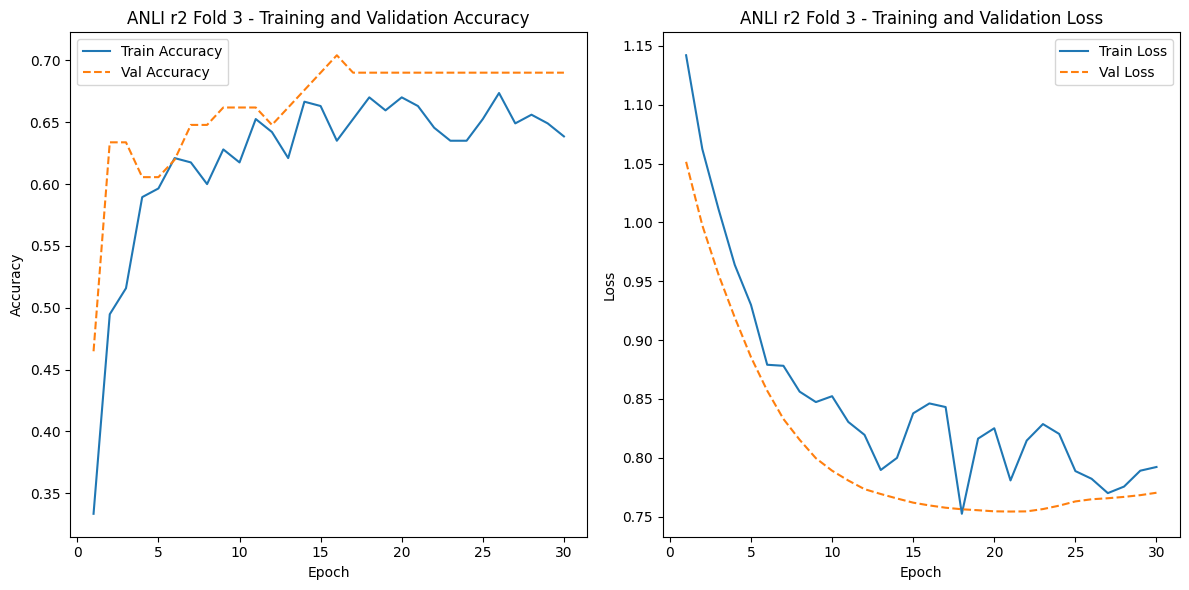

Epoch 1/100, Train Loss: 1.1689, Val Loss: 1.0319, Val Accuracy: 0.5634
Epoch 2/100, Train Loss: 1.0966, Val Loss: 0.9576, Val Accuracy: 0.5915
Epoch 3/100, Train Loss: 1.0368, Val Loss: 0.9002, Val Accuracy: 0.6901
Epoch 4/100, Train Loss: 1.0023, Val Loss: 0.8578, Val Accuracy: 0.7746
Epoch 5/100, Train Loss: 0.9525, Val Loss: 0.8242, Val Accuracy: 0.7746
Epoch 6/100, Train Loss: 0.9237, Val Loss: 0.7950, Val Accuracy: 0.7606
Epoch 7/100, Train Loss: 0.9106, Val Loss: 0.7713, Val Accuracy: 0.7746
Epoch 8/100, Train Loss: 0.9063, Val Loss: 0.7535, Val Accuracy: 0.7465
Epoch 9/100, Train Loss: 0.8860, Val Loss: 0.7409, Val Accuracy: 0.7324
Epoch 10/100, Train Loss: 0.9037, Val Loss: 0.7330, Val Accuracy: 0.7324
Epoch 11/100, Train Loss: 0.8423, Val Loss: 0.7260, Val Accuracy: 0.7324
Epoch 12/100, Train Loss: 0.8308, Val Loss: 0.7158, Val Accuracy: 0.7465
Epoch 13/100, Train Loss: 0.8483, Val Loss: 0.7045, Val Accuracy: 0.7465
Epoch 14/100, Train Loss: 0.8655, Val Loss: 0.6939, Val Accu

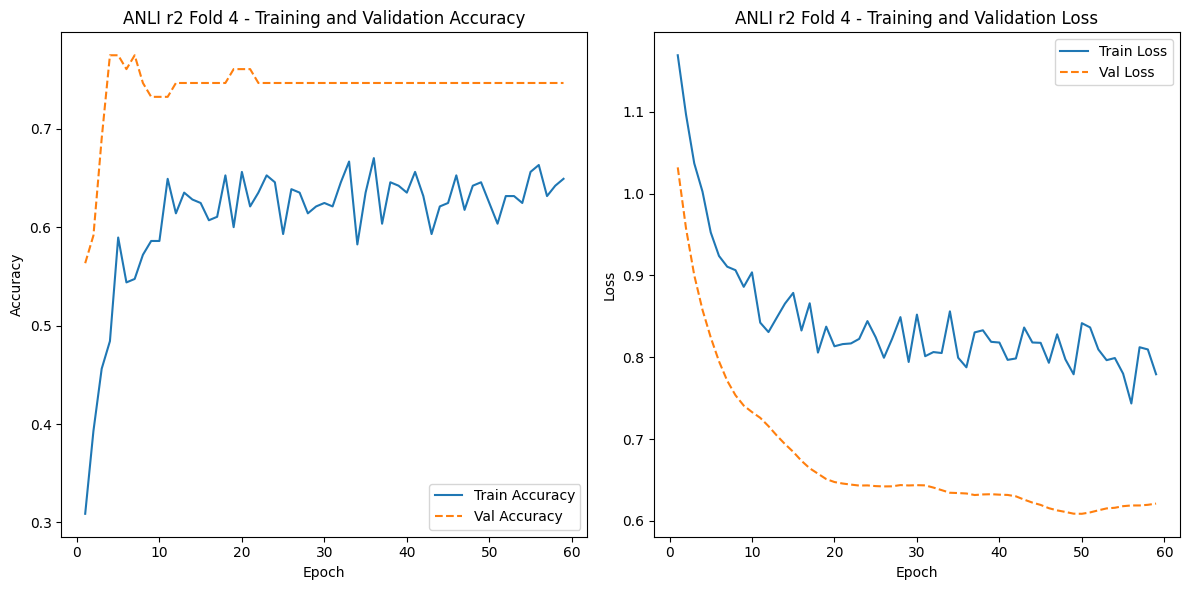

Epoch 1/100, Train Loss: 1.1176, Val Loss: 1.0024, Val Accuracy: 0.6056
Epoch 2/100, Train Loss: 1.0363, Val Loss: 0.9495, Val Accuracy: 0.6761
Epoch 3/100, Train Loss: 0.9896, Val Loss: 0.9060, Val Accuracy: 0.6901
Epoch 4/100, Train Loss: 0.9458, Val Loss: 0.8693, Val Accuracy: 0.6761
Epoch 5/100, Train Loss: 0.9489, Val Loss: 0.8402, Val Accuracy: 0.6901
Epoch 6/100, Train Loss: 0.9093, Val Loss: 0.8168, Val Accuracy: 0.7042
Epoch 7/100, Train Loss: 0.8990, Val Loss: 0.7971, Val Accuracy: 0.7183
Epoch 8/100, Train Loss: 0.8818, Val Loss: 0.7819, Val Accuracy: 0.7042
Epoch 9/100, Train Loss: 0.9474, Val Loss: 0.7713, Val Accuracy: 0.7042
Epoch 10/100, Train Loss: 0.8653, Val Loss: 0.7636, Val Accuracy: 0.7183
Epoch 11/100, Train Loss: 0.8303, Val Loss: 0.7588, Val Accuracy: 0.7183
Epoch 12/100, Train Loss: 0.8638, Val Loss: 0.7560, Val Accuracy: 0.7183
Epoch 13/100, Train Loss: 0.8414, Val Loss: 0.7498, Val Accuracy: 0.7183
Epoch 14/100, Train Loss: 0.8475, Val Loss: 0.7424, Val Accu

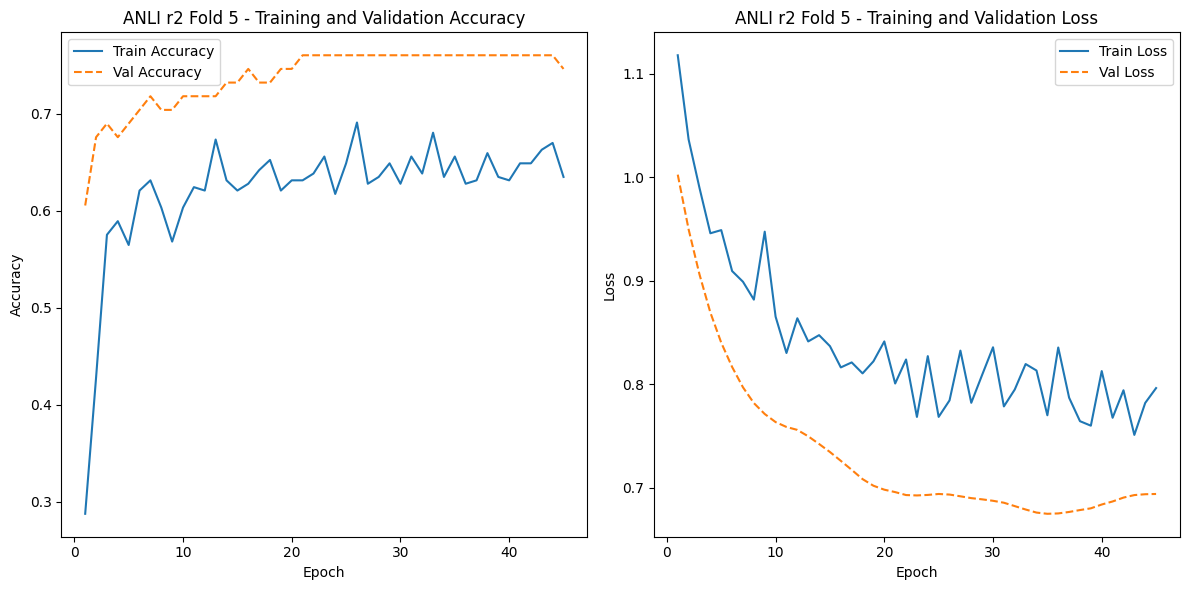

Average Validation Loss for ANLI r2 across 5 folds: 0.7090
Average Validation Accuracy for ANLI r2 across 5 folds: 0.7303


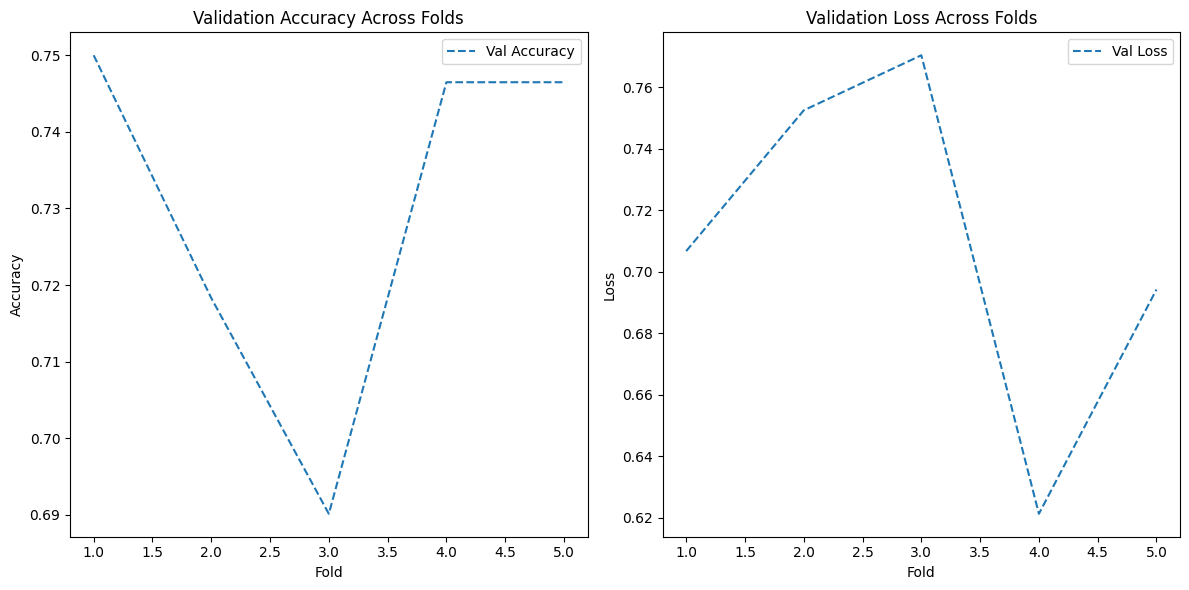

In [52]:
# Task: ANLI r2
task_name = 'ANLI r2'
X_train = X_train_anli_r2
y_train = y_train_anli_r2
avg_val_loss_anli_r2, avg_val_accuracy_anli_r2 = cross_validate_egat(task_name, X_train, y_train)


Epoch 1/100, Train Loss: 1.0604, Val Loss: 0.9899, Val Accuracy: 0.6000
Epoch 2/100, Train Loss: 0.9943, Val Loss: 0.9372, Val Accuracy: 0.6353
Epoch 3/100, Train Loss: 0.9681, Val Loss: 0.8925, Val Accuracy: 0.6353
Epoch 4/100, Train Loss: 0.9395, Val Loss: 0.8559, Val Accuracy: 0.6353
Epoch 5/100, Train Loss: 0.9049, Val Loss: 0.8251, Val Accuracy: 0.6471
Epoch 6/100, Train Loss: 0.8669, Val Loss: 0.7971, Val Accuracy: 0.6471
Epoch 7/100, Train Loss: 0.8541, Val Loss: 0.7720, Val Accuracy: 0.6588
Epoch 8/100, Train Loss: 0.8733, Val Loss: 0.7500, Val Accuracy: 0.6588
Epoch 9/100, Train Loss: 0.8435, Val Loss: 0.7314, Val Accuracy: 0.6941
Epoch 10/100, Train Loss: 0.8013, Val Loss: 0.7145, Val Accuracy: 0.7647
Epoch 11/100, Train Loss: 0.8702, Val Loss: 0.7025, Val Accuracy: 0.7882
Epoch 12/100, Train Loss: 0.8407, Val Loss: 0.6954, Val Accuracy: 0.7882
Epoch 13/100, Train Loss: 0.8336, Val Loss: 0.6904, Val Accuracy: 0.7647
Epoch 14/100, Train Loss: 0.8158, Val Loss: 0.6872, Val Accu

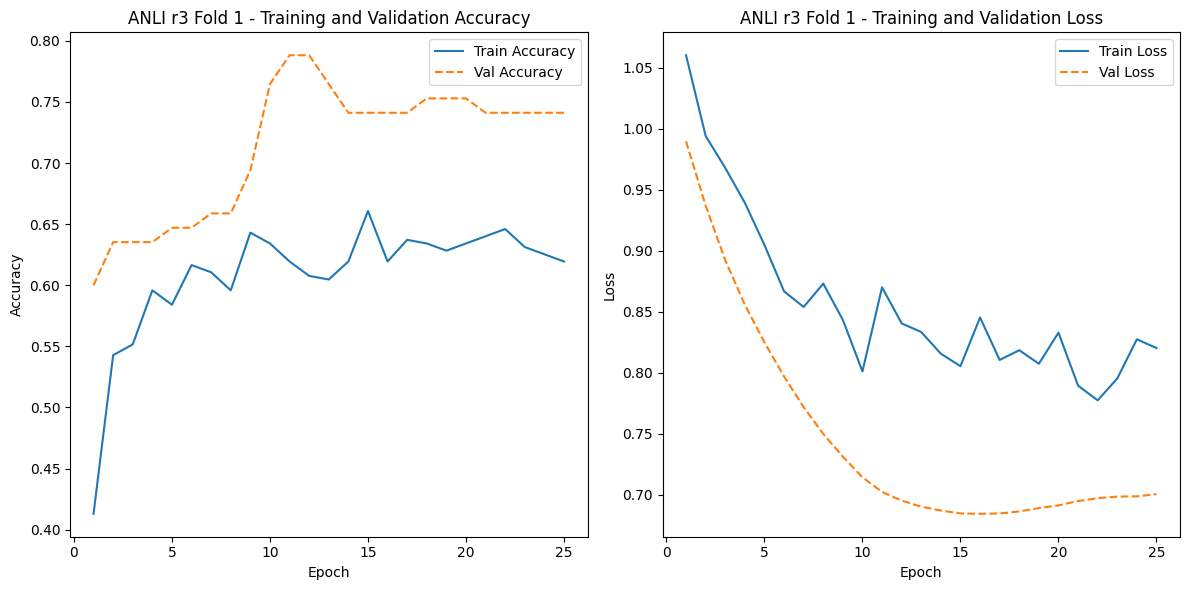

Epoch 1/100, Train Loss: 1.0915, Val Loss: 0.9767, Val Accuracy: 0.6471
Epoch 2/100, Train Loss: 1.0236, Val Loss: 0.9307, Val Accuracy: 0.6706
Epoch 3/100, Train Loss: 0.9905, Val Loss: 0.8935, Val Accuracy: 0.6706
Epoch 4/100, Train Loss: 0.9532, Val Loss: 0.8665, Val Accuracy: 0.6471
Epoch 5/100, Train Loss: 0.9116, Val Loss: 0.8456, Val Accuracy: 0.6235
Epoch 6/100, Train Loss: 0.9042, Val Loss: 0.8312, Val Accuracy: 0.6353
Epoch 7/100, Train Loss: 0.8762, Val Loss: 0.8198, Val Accuracy: 0.6235
Epoch 8/100, Train Loss: 0.8476, Val Loss: 0.8097, Val Accuracy: 0.6118
Epoch 9/100, Train Loss: 0.8495, Val Loss: 0.8017, Val Accuracy: 0.6118
Epoch 10/100, Train Loss: 0.8157, Val Loss: 0.7975, Val Accuracy: 0.6118
Epoch 11/100, Train Loss: 0.8371, Val Loss: 0.7955, Val Accuracy: 0.6118
Epoch 12/100, Train Loss: 0.8144, Val Loss: 0.7956, Val Accuracy: 0.6118
Epoch 13/100, Train Loss: 0.8008, Val Loss: 0.7956, Val Accuracy: 0.6118
Epoch 14/100, Train Loss: 0.7848, Val Loss: 0.7965, Val Accu

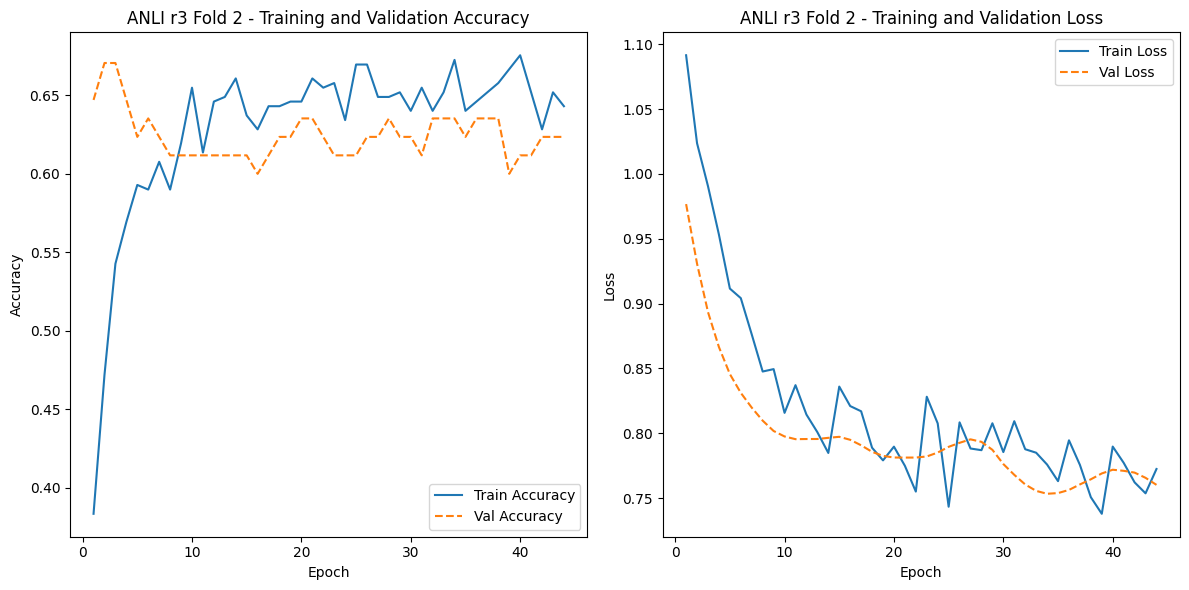

Epoch 1/100, Train Loss: 1.0620, Val Loss: 0.9764, Val Accuracy: 0.5765
Epoch 2/100, Train Loss: 1.0173, Val Loss: 0.9256, Val Accuracy: 0.6118
Epoch 3/100, Train Loss: 0.9879, Val Loss: 0.8832, Val Accuracy: 0.6471
Epoch 4/100, Train Loss: 0.9422, Val Loss: 0.8449, Val Accuracy: 0.6706
Epoch 5/100, Train Loss: 0.8977, Val Loss: 0.8099, Val Accuracy: 0.7176
Epoch 6/100, Train Loss: 0.9100, Val Loss: 0.7796, Val Accuracy: 0.7176
Epoch 7/100, Train Loss: 0.8572, Val Loss: 0.7520, Val Accuracy: 0.7412
Epoch 8/100, Train Loss: 0.8855, Val Loss: 0.7281, Val Accuracy: 0.7412
Epoch 9/100, Train Loss: 0.8431, Val Loss: 0.7067, Val Accuracy: 0.7412
Epoch 10/100, Train Loss: 0.8510, Val Loss: 0.6887, Val Accuracy: 0.7412
Epoch 11/100, Train Loss: 0.8304, Val Loss: 0.6739, Val Accuracy: 0.7529
Epoch 12/100, Train Loss: 0.8250, Val Loss: 0.6621, Val Accuracy: 0.7647
Epoch 13/100, Train Loss: 0.8147, Val Loss: 0.6503, Val Accuracy: 0.7765
Epoch 14/100, Train Loss: 0.8589, Val Loss: 0.6406, Val Accu

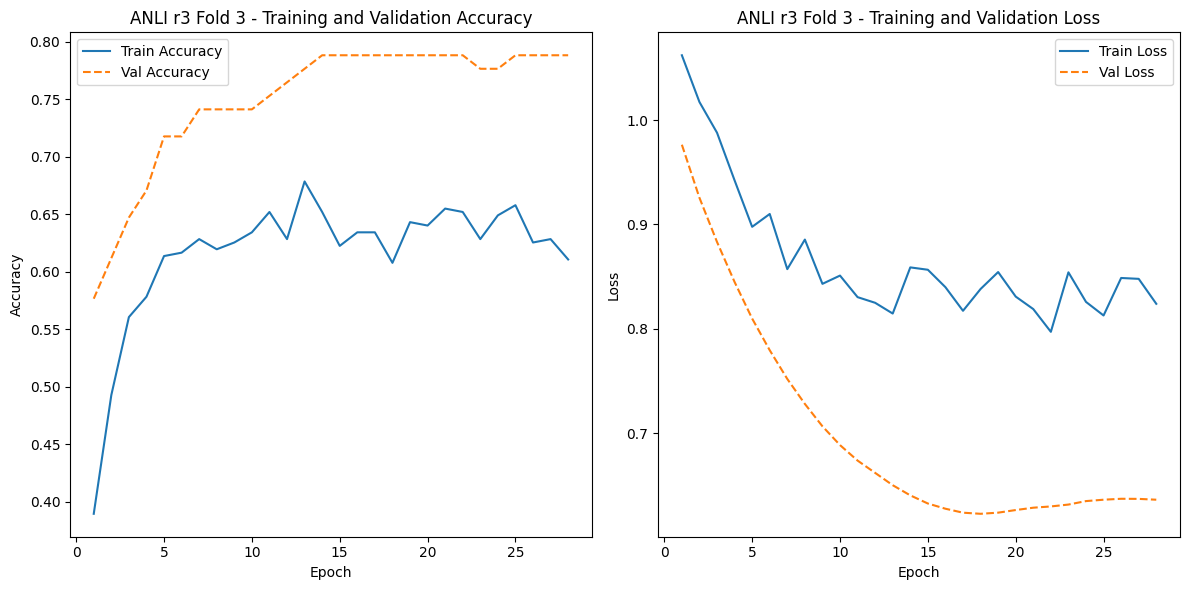

Epoch 1/100, Train Loss: 1.2740, Val Loss: 1.0896, Val Accuracy: 0.4235
Epoch 2/100, Train Loss: 1.1483, Val Loss: 1.0244, Val Accuracy: 0.3647
Epoch 3/100, Train Loss: 1.0286, Val Loss: 0.9747, Val Accuracy: 0.6588
Epoch 4/100, Train Loss: 0.9817, Val Loss: 0.9359, Val Accuracy: 0.6235
Epoch 5/100, Train Loss: 0.9381, Val Loss: 0.9050, Val Accuracy: 0.6000
Epoch 6/100, Train Loss: 0.9267, Val Loss: 0.8811, Val Accuracy: 0.6000
Epoch 7/100, Train Loss: 0.8919, Val Loss: 0.8620, Val Accuracy: 0.6000
Epoch 8/100, Train Loss: 0.9342, Val Loss: 0.8459, Val Accuracy: 0.6000
Epoch 9/100, Train Loss: 0.8591, Val Loss: 0.8309, Val Accuracy: 0.6118
Epoch 10/100, Train Loss: 0.8964, Val Loss: 0.8161, Val Accuracy: 0.6118
Epoch 11/100, Train Loss: 0.8164, Val Loss: 0.8021, Val Accuracy: 0.6118
Epoch 12/100, Train Loss: 0.8111, Val Loss: 0.7904, Val Accuracy: 0.6118
Epoch 13/100, Train Loss: 0.7983, Val Loss: 0.7794, Val Accuracy: 0.6118
Epoch 14/100, Train Loss: 0.8167, Val Loss: 0.7700, Val Accu

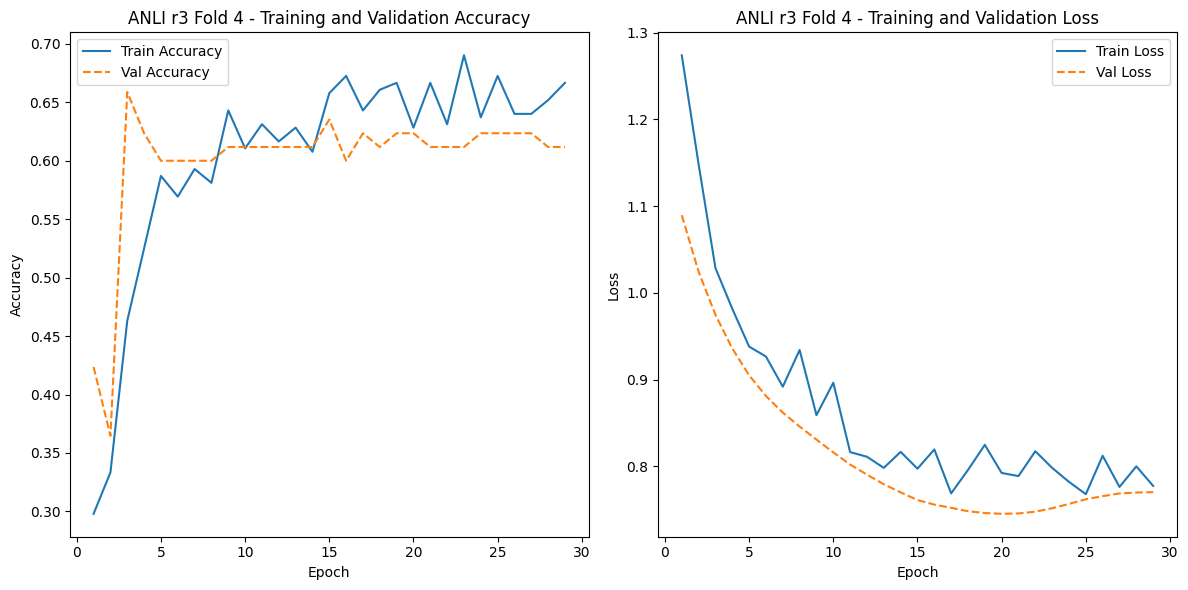

Epoch 1/100, Train Loss: 1.0994, Val Loss: 1.0199, Val Accuracy: 0.5833
Epoch 2/100, Train Loss: 1.0286, Val Loss: 0.9484, Val Accuracy: 0.6905
Epoch 3/100, Train Loss: 0.9662, Val Loss: 0.8919, Val Accuracy: 0.6905
Epoch 4/100, Train Loss: 0.9575, Val Loss: 0.8468, Val Accuracy: 0.6786
Epoch 5/100, Train Loss: 0.9122, Val Loss: 0.8111, Val Accuracy: 0.6905
Epoch 6/100, Train Loss: 0.9143, Val Loss: 0.7838, Val Accuracy: 0.6905
Epoch 7/100, Train Loss: 0.9052, Val Loss: 0.7633, Val Accuracy: 0.7024
Epoch 8/100, Train Loss: 0.8626, Val Loss: 0.7469, Val Accuracy: 0.7262
Epoch 9/100, Train Loss: 0.8608, Val Loss: 0.7351, Val Accuracy: 0.7262
Epoch 10/100, Train Loss: 0.8267, Val Loss: 0.7254, Val Accuracy: 0.7262
Epoch 11/100, Train Loss: 0.8156, Val Loss: 0.7180, Val Accuracy: 0.7262
Epoch 12/100, Train Loss: 0.8205, Val Loss: 0.7100, Val Accuracy: 0.7262
Epoch 13/100, Train Loss: 0.8417, Val Loss: 0.7022, Val Accuracy: 0.7262
Epoch 14/100, Train Loss: 0.8153, Val Loss: 0.6955, Val Accu

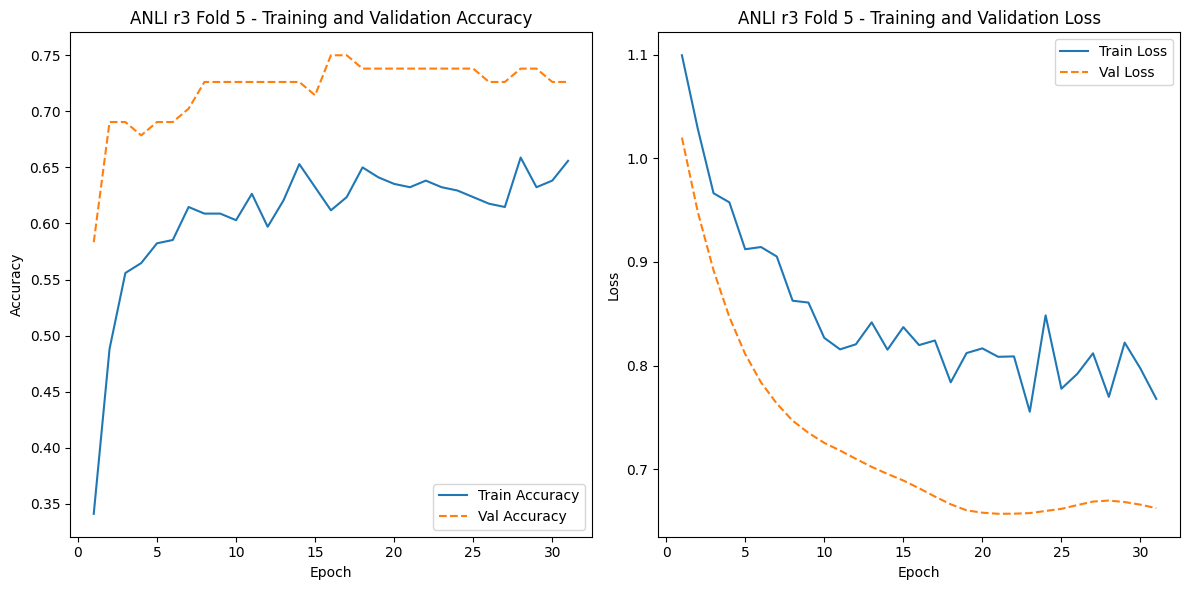

Average Validation Loss for ANLI r3 across 5 folds: 0.7060
Average Validation Accuracy for ANLI r3 across 5 folds: 0.6982


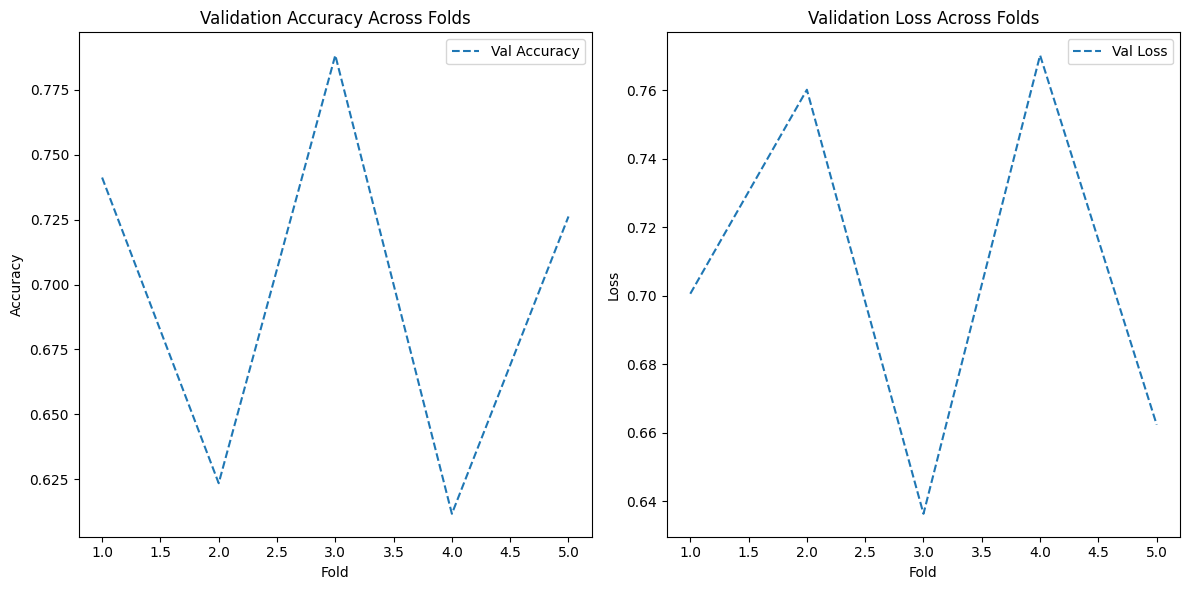

In [53]:
# Task: ANLI r3
task_name = 'ANLI r3'
X_train = X_train_anli_r3
y_train = y_train_anli_r3
avg_val_loss_anli_r3, avg_val_accuracy_anli_r3 = cross_validate_egat(task_name, X_train, y_train)

/tmp/ipykernel_34/1454212303.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  graph_data = Data(x=torch.tensor(data, dtype=torch.float), edge_index=edge_index, y=torch.tensor(labels, dtype=torch.long))


Epoch 1/100, Train Loss: 1.1463, Val Loss: 0.9705, Val Accuracy: 0.5322
Epoch 2/100, Train Loss: 1.0050, Val Loss: 0.8418, Val Accuracy: 0.9349
Epoch 3/100, Train Loss: 0.8858, Val Loss: 0.7303, Val Accuracy: 0.9398
Epoch 4/100, Train Loss: 0.7917, Val Loss: 0.6323, Val Accuracy: 0.9411
Epoch 5/100, Train Loss: 0.7177, Val Loss: 0.5477, Val Accuracy: 0.9411
Epoch 6/100, Train Loss: 0.6577, Val Loss: 0.4765, Val Accuracy: 0.9408
Epoch 7/100, Train Loss: 0.6168, Val Loss: 0.4185, Val Accuracy: 0.9404
Epoch 8/100, Train Loss: 0.5890, Val Loss: 0.3714, Val Accuracy: 0.9408
Epoch 9/100, Train Loss: 0.5623, Val Loss: 0.3331, Val Accuracy: 0.9408
Epoch 10/100, Train Loss: 0.5335, Val Loss: 0.3023, Val Accuracy: 0.9408
Epoch 11/100, Train Loss: 0.5225, Val Loss: 0.2779, Val Accuracy: 0.9408
Epoch 12/100, Train Loss: 0.5159, Val Loss: 0.2587, Val Accuracy: 0.9408
Epoch 13/100, Train Loss: 0.5142, Val Loss: 0.2438, Val Accuracy: 0.9404
Epoch 14/100, Train Loss: 0.5053, Val Loss: 0.2320, Val Accu

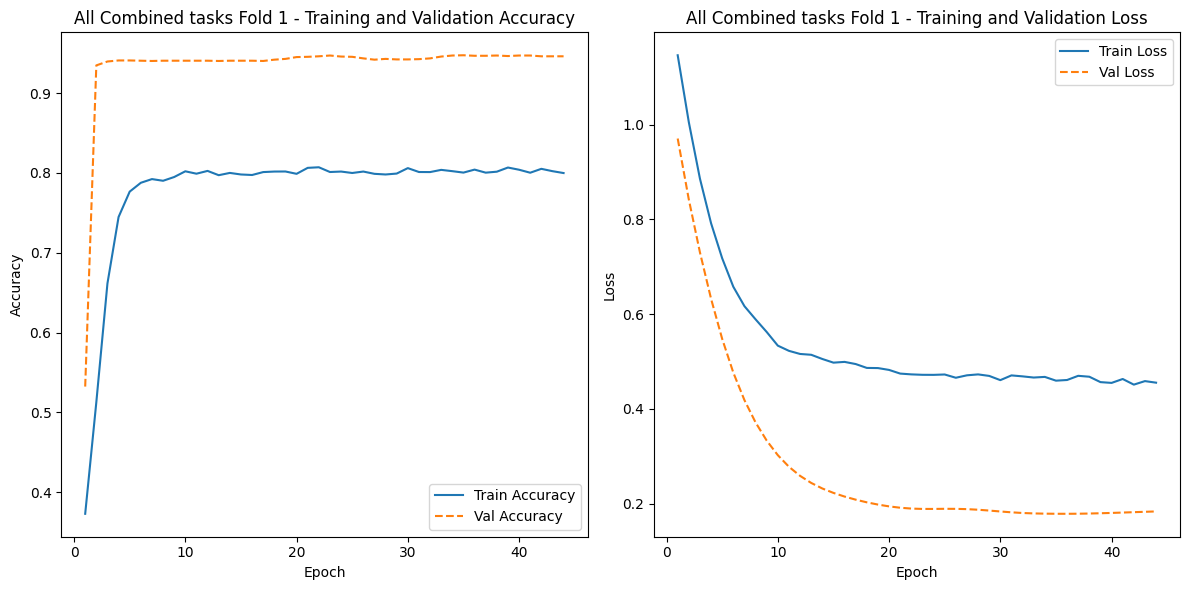

Epoch 1/100, Train Loss: 1.0467, Val Loss: 0.8661, Val Accuracy: 0.9359
Epoch 2/100, Train Loss: 0.8998, Val Loss: 0.7321, Val Accuracy: 0.9368
Epoch 3/100, Train Loss: 0.7818, Val Loss: 0.6199, Val Accuracy: 0.9404
Epoch 4/100, Train Loss: 0.7053, Val Loss: 0.5275, Val Accuracy: 0.9408
Epoch 5/100, Train Loss: 0.6375, Val Loss: 0.4530, Val Accuracy: 0.9411
Epoch 6/100, Train Loss: 0.5968, Val Loss: 0.3934, Val Accuracy: 0.9421
Epoch 7/100, Train Loss: 0.5571, Val Loss: 0.3465, Val Accuracy: 0.9421
Epoch 8/100, Train Loss: 0.5476, Val Loss: 0.3103, Val Accuracy: 0.9421
Epoch 9/100, Train Loss: 0.5358, Val Loss: 0.2822, Val Accuracy: 0.9430
Epoch 10/100, Train Loss: 0.5194, Val Loss: 0.2607, Val Accuracy: 0.9427
Epoch 11/100, Train Loss: 0.5116, Val Loss: 0.2443, Val Accuracy: 0.9427
Epoch 12/100, Train Loss: 0.5096, Val Loss: 0.2318, Val Accuracy: 0.9427
Epoch 13/100, Train Loss: 0.5097, Val Loss: 0.2221, Val Accuracy: 0.9424
Epoch 14/100, Train Loss: 0.5030, Val Loss: 0.2146, Val Accu

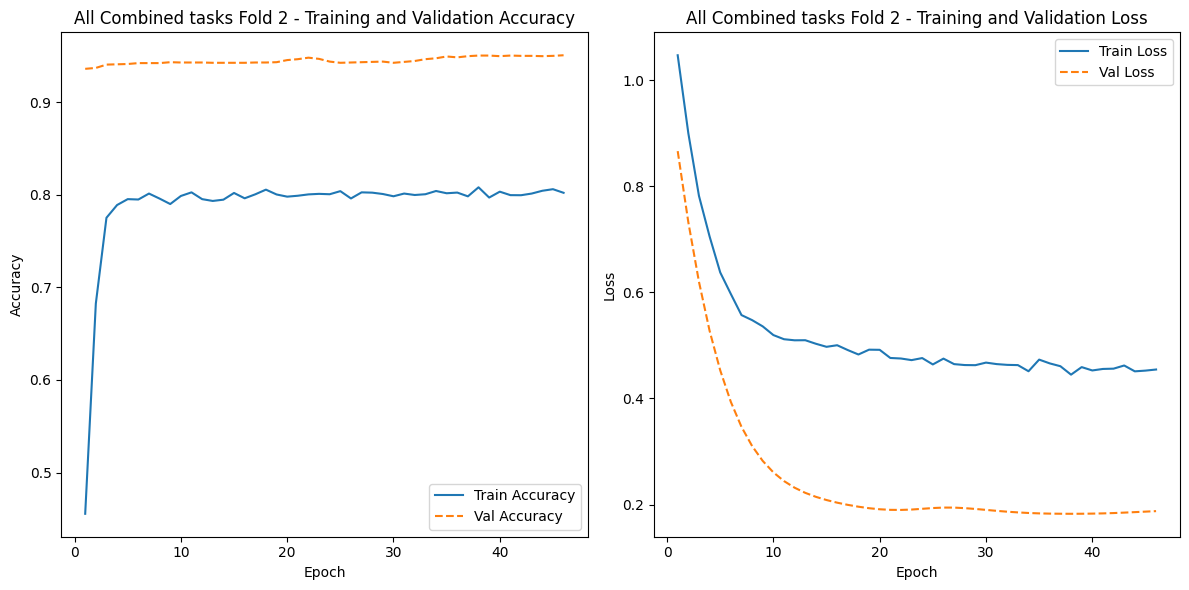

Epoch 1/100, Train Loss: 1.2024, Val Loss: 1.0400, Val Accuracy: 0.4738
Epoch 2/100, Train Loss: 1.0544, Val Loss: 0.9059, Val Accuracy: 0.9427
Epoch 3/100, Train Loss: 0.9300, Val Loss: 0.7877, Val Accuracy: 0.9437
Epoch 4/100, Train Loss: 0.8309, Val Loss: 0.6851, Val Accuracy: 0.9456
Epoch 5/100, Train Loss: 0.7533, Val Loss: 0.5933, Val Accuracy: 0.9466
Epoch 6/100, Train Loss: 0.6863, Val Loss: 0.5148, Val Accuracy: 0.9472
Epoch 7/100, Train Loss: 0.6382, Val Loss: 0.4481, Val Accuracy: 0.9479
Epoch 8/100, Train Loss: 0.6065, Val Loss: 0.3923, Val Accuracy: 0.9472
Epoch 9/100, Train Loss: 0.5792, Val Loss: 0.3465, Val Accuracy: 0.9476
Epoch 10/100, Train Loss: 0.5628, Val Loss: 0.3092, Val Accuracy: 0.9479
Epoch 11/100, Train Loss: 0.5372, Val Loss: 0.2799, Val Accuracy: 0.9479
Epoch 12/100, Train Loss: 0.5256, Val Loss: 0.2568, Val Accuracy: 0.9482
Epoch 13/100, Train Loss: 0.5215, Val Loss: 0.2386, Val Accuracy: 0.9482
Epoch 14/100, Train Loss: 0.5082, Val Loss: 0.2242, Val Accu

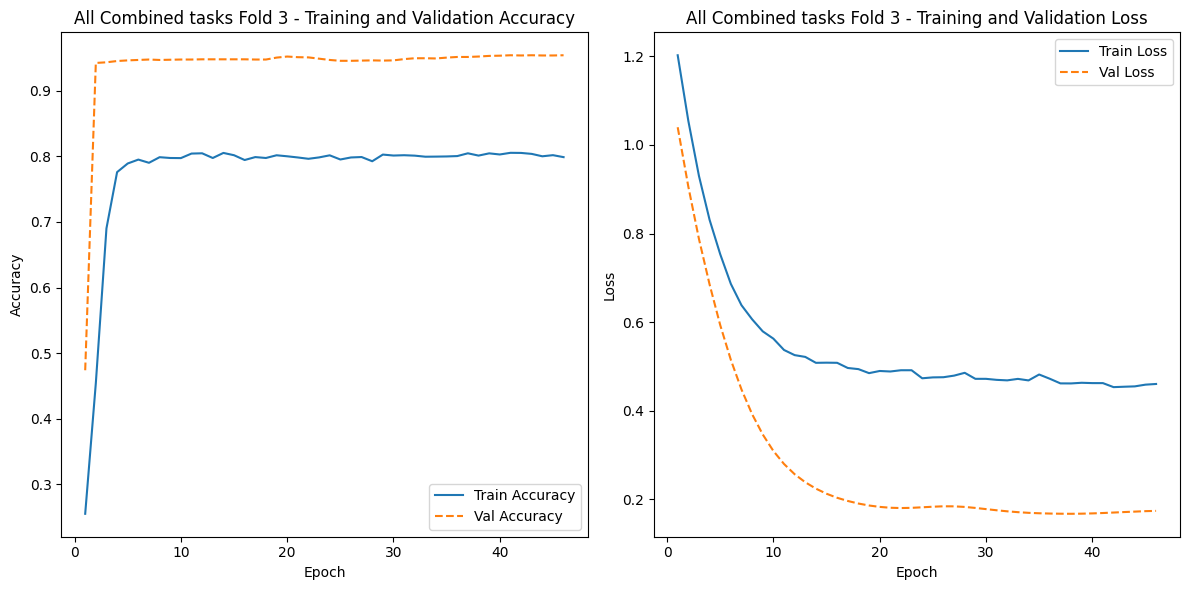

Epoch 1/100, Train Loss: 1.2189, Val Loss: 1.0105, Val Accuracy: 0.4871
Epoch 2/100, Train Loss: 1.0440, Val Loss: 0.8584, Val Accuracy: 0.9349
Epoch 3/100, Train Loss: 0.9004, Val Loss: 0.7258, Val Accuracy: 0.9375
Epoch 4/100, Train Loss: 0.7917, Val Loss: 0.6148, Val Accuracy: 0.9388
Epoch 5/100, Train Loss: 0.7035, Val Loss: 0.5228, Val Accuracy: 0.9391
Epoch 6/100, Train Loss: 0.6474, Val Loss: 0.4492, Val Accuracy: 0.9391
Epoch 7/100, Train Loss: 0.6041, Val Loss: 0.3915, Val Accuracy: 0.9391
Epoch 8/100, Train Loss: 0.5671, Val Loss: 0.3467, Val Accuracy: 0.9391
Epoch 9/100, Train Loss: 0.5525, Val Loss: 0.3129, Val Accuracy: 0.9391
Epoch 10/100, Train Loss: 0.5331, Val Loss: 0.2878, Val Accuracy: 0.9391
Epoch 11/100, Train Loss: 0.5317, Val Loss: 0.2689, Val Accuracy: 0.9391
Epoch 12/100, Train Loss: 0.5254, Val Loss: 0.2547, Val Accuracy: 0.9391
Epoch 13/100, Train Loss: 0.5202, Val Loss: 0.2437, Val Accuracy: 0.9391
Epoch 14/100, Train Loss: 0.5127, Val Loss: 0.2351, Val Accu

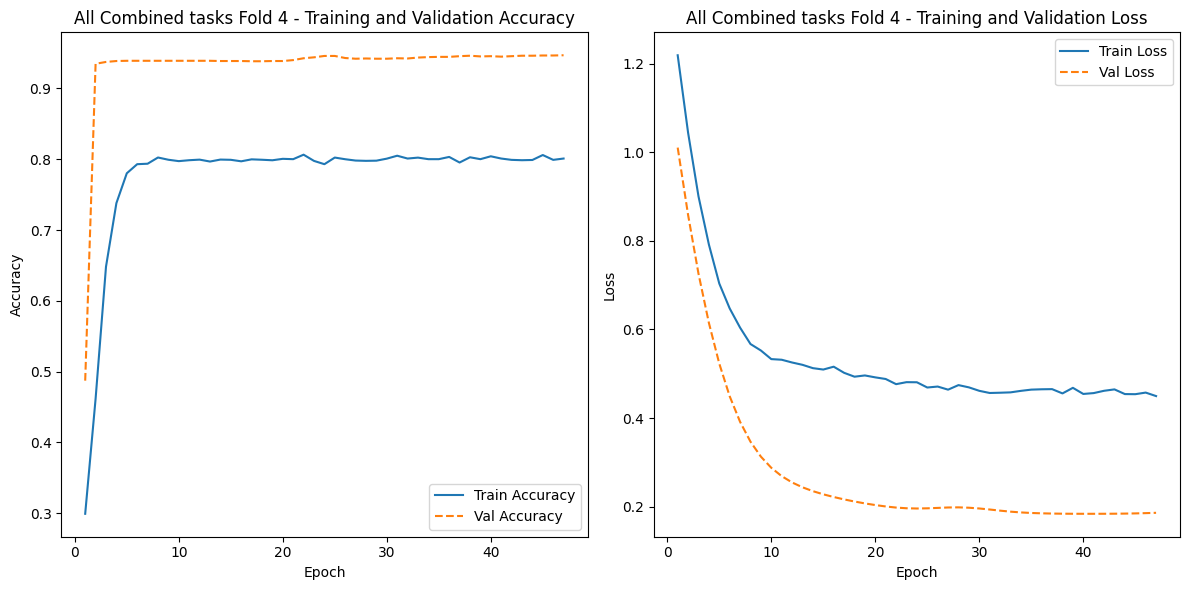

Epoch 1/100, Train Loss: 1.2705, Val Loss: 1.0745, Val Accuracy: 0.4764
Epoch 2/100, Train Loss: 1.0984, Val Loss: 0.9239, Val Accuracy: 0.9411
Epoch 3/100, Train Loss: 0.9496, Val Loss: 0.7925, Val Accuracy: 0.9372
Epoch 4/100, Train Loss: 0.8345, Val Loss: 0.6814, Val Accuracy: 0.9401
Epoch 5/100, Train Loss: 0.7367, Val Loss: 0.5881, Val Accuracy: 0.9407
Epoch 6/100, Train Loss: 0.6715, Val Loss: 0.5096, Val Accuracy: 0.9407
Epoch 7/100, Train Loss: 0.6210, Val Loss: 0.4447, Val Accuracy: 0.9407
Epoch 8/100, Train Loss: 0.5829, Val Loss: 0.3916, Val Accuracy: 0.9407
Epoch 9/100, Train Loss: 0.5547, Val Loss: 0.3489, Val Accuracy: 0.9407
Epoch 10/100, Train Loss: 0.5312, Val Loss: 0.3152, Val Accuracy: 0.9407
Epoch 11/100, Train Loss: 0.5216, Val Loss: 0.2888, Val Accuracy: 0.9407
Epoch 12/100, Train Loss: 0.5187, Val Loss: 0.2681, Val Accuracy: 0.9404
Epoch 13/100, Train Loss: 0.5169, Val Loss: 0.2521, Val Accuracy: 0.9404
Epoch 14/100, Train Loss: 0.5065, Val Loss: 0.2393, Val Accu

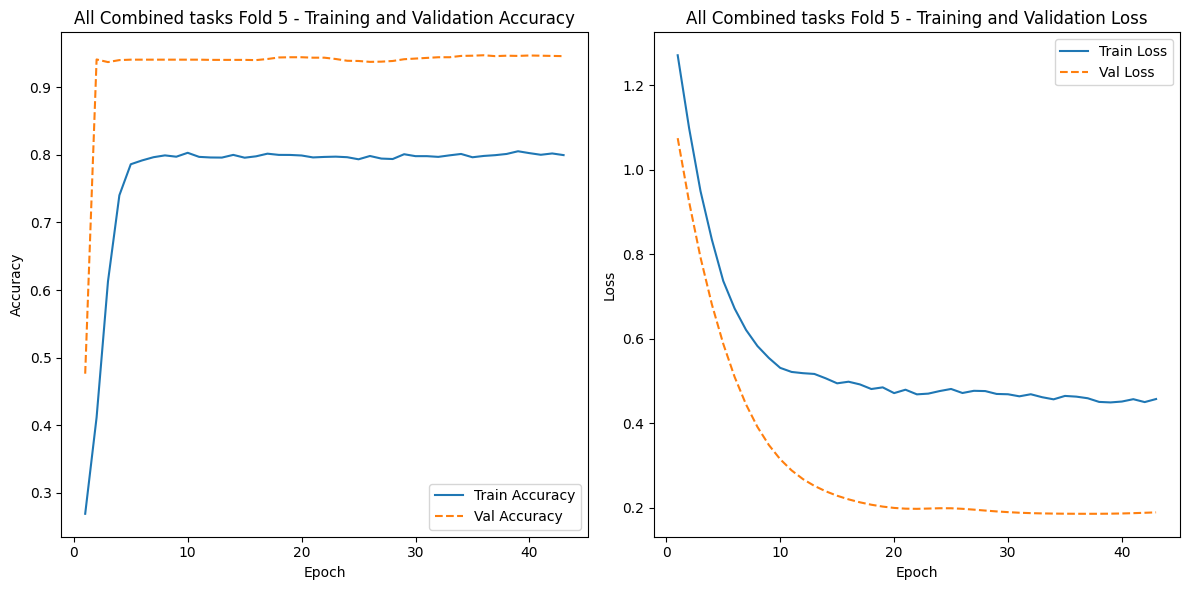

Average Validation Loss for All Combined tasks across 5 folds: 0.1842
Average Validation Accuracy for All Combined tasks across 5 folds: 0.9488


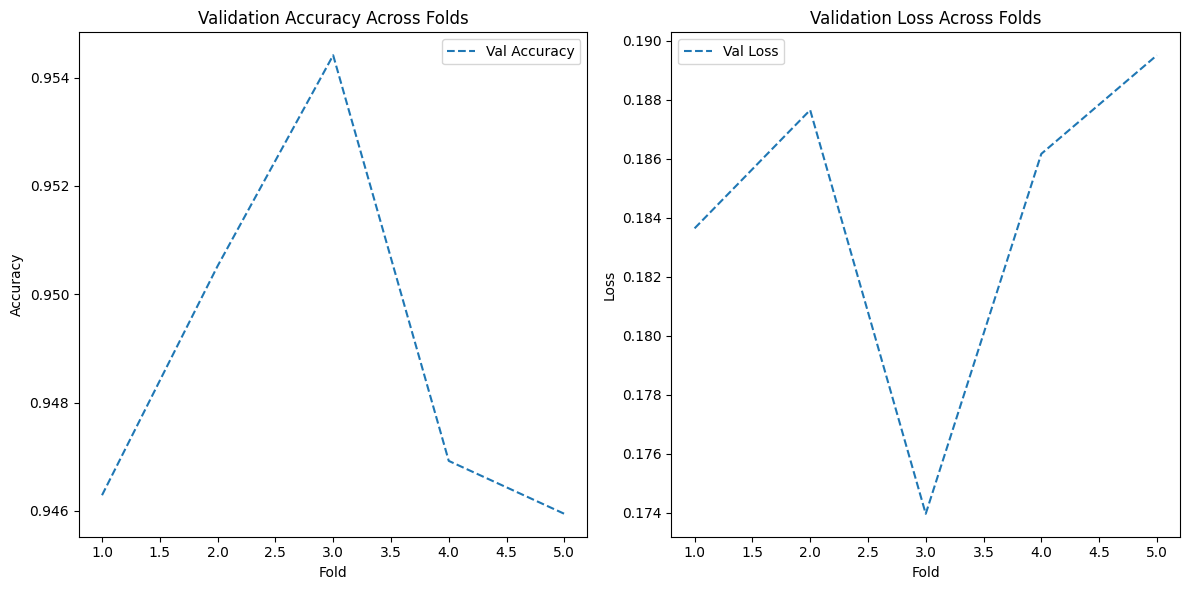

In [54]:
# Task all
task_name = 'All Combined tasks'
X_train = X_train_all
y_train = y_train_all
avg_val_loss_all, avg_val_accuracy_all = cross_validate_egat(task_name, X_train, y_train)


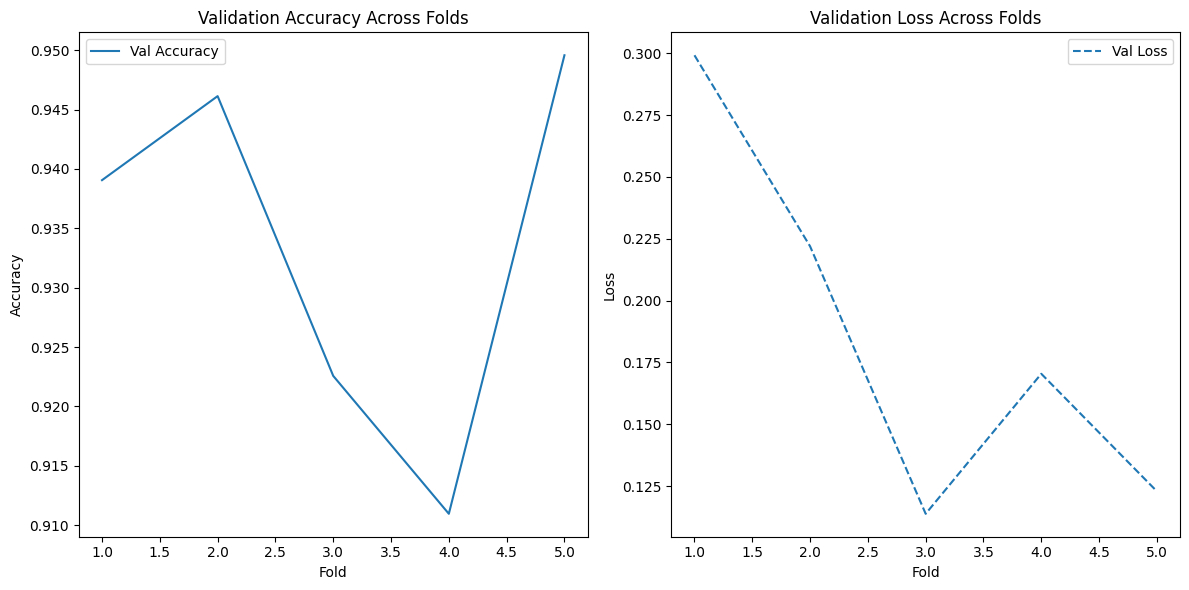

In [55]:
import matplotlib.pyplot as plt

# Define arrays to store the average accuracies and losses
val_accuracies = []
val_losses = []

# Sample cross-validation results (replace with your data)
k = 5
for fold_idx in range(k):
    # Suppose you have val_losses and val_accuracies recorded for each fold
    val_losses.append(np.random.uniform(0.1, 0.3))  # Random sample values
    val_accuracies.append(np.random.uniform(0.9, 0.97))

# Plotting the average validation accuracy and loss
plt.figure(figsize=(12, 6))

# Validation accuracy plot
plt.subplot(1, 2, 1)
plt.plot(range(1, k + 1), val_accuracies, label='Val Accuracy')
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.title("Validation Accuracy Across Folds")
plt.legend()

# Validation loss plot
plt.subplot(1, 2, 2)
plt.plot(range(1, k + 1), val_losses, label='Val Loss', linestyle='--')
plt.xlabel("Fold")
plt.ylabel("Loss")
plt.title("Validation Loss Across Folds")
plt.legend()

plt.tight_layout()
plt.show()
